# Group Members:  
# Tian Wang  U37376130
# Suiyang Ru  U29832637
# Qiyue Sun  U59404684
#  Xinyu Deng  U22367334

# **Part I**

# **SARIMA Model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/sqycanmakeit/Desktop/yield_curve_daily_20010731_20231229.csv')

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data.set_index('Date', inplace=True)
data = data.dropna()
data = data.sort_index(ascending=True)

In [3]:
data

1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99   5.19   5.70   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2023-12-22  5.54  5.44  5.31  4.82  4.31  4.04  3.87  3.92   3.90   4.21   
2023-12-26  5.53  5.45  5.28  4.83  4.26  4.05  3.89  3.91   3.89   4.20   
2023-12-27  5.55  5.44  5.26  4.79  4.20  3.97  3.78  3.81   3.79   4.10   
2023-12-28  5.57  5.45  5.28  4.82  4.26  4.02  3.83  3.84   3.84   4.14   
2023-12-29  5.60  5.40  5.26  4.79  4.23  4.01  3.84  3.88   3.88   4.20   

            30 Yr  
Date               
2001-07-31   5.51  
2001-08-01   5.53  
2001-08-02   5.57  
2001-08-03   5.59  
2001-08-06   5.59  
...           ...  
2023-12-22   4.05  
2023-12-26   4.04  
2023-12-27   3.95  
2023-12-28   3.98  
2023-12-29   4.03  

[5604 rows x 11 columns]

## Data Visualization

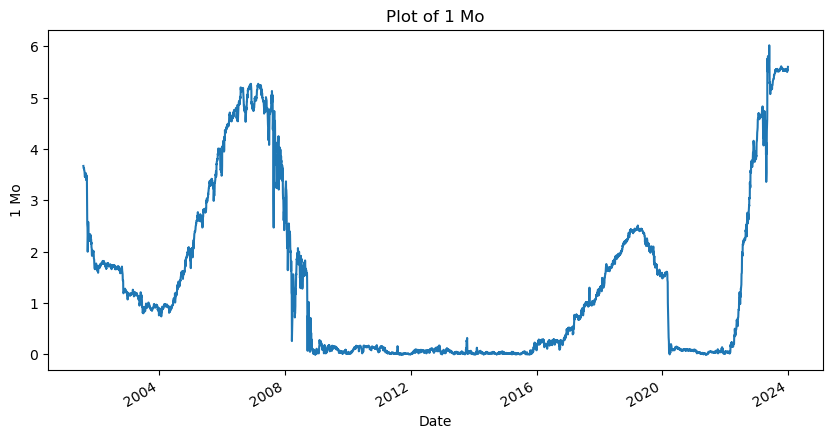

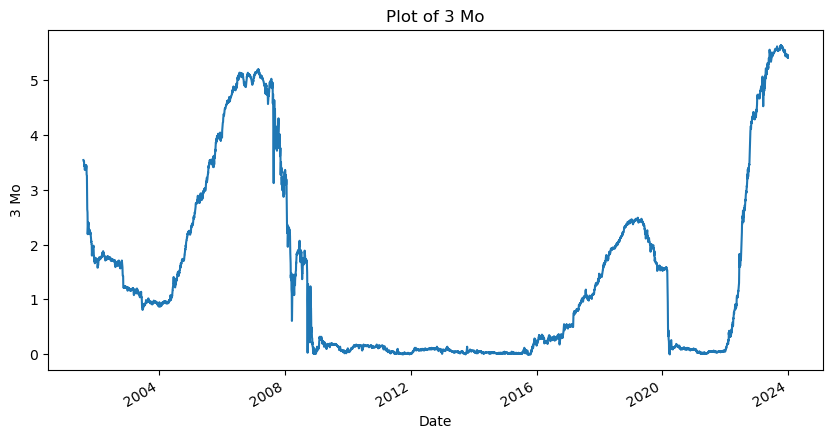

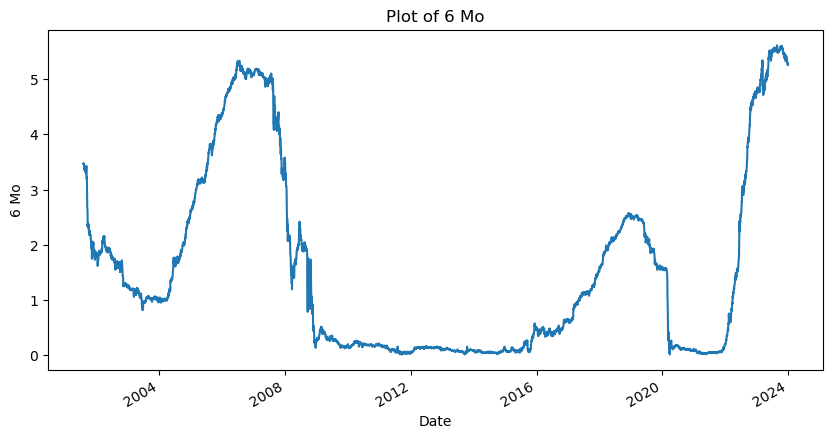

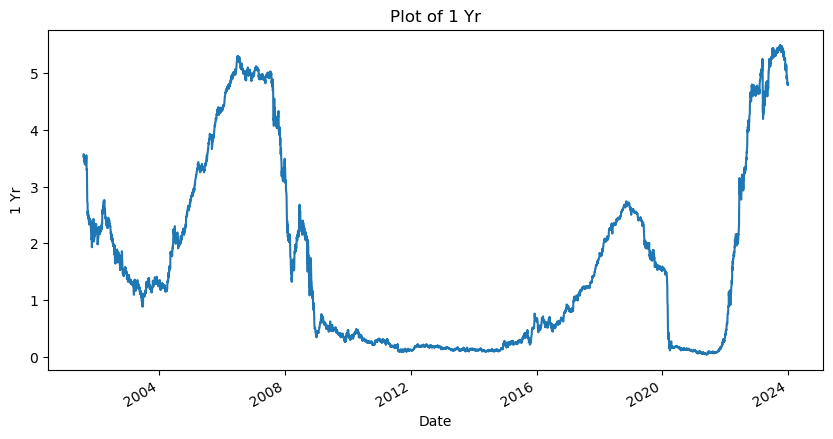

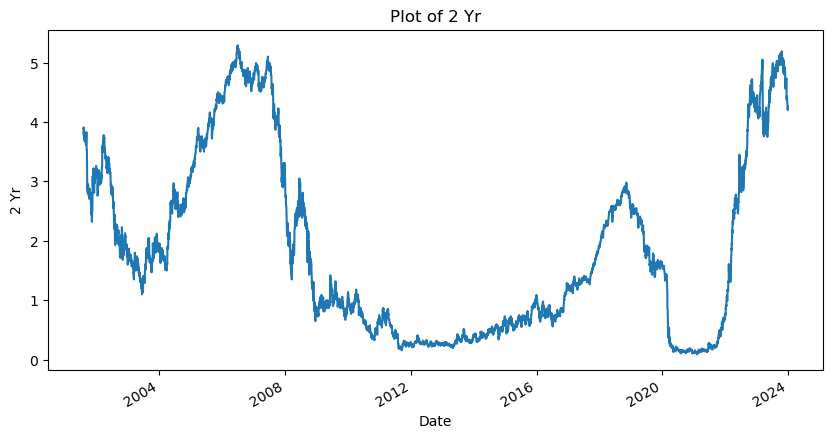

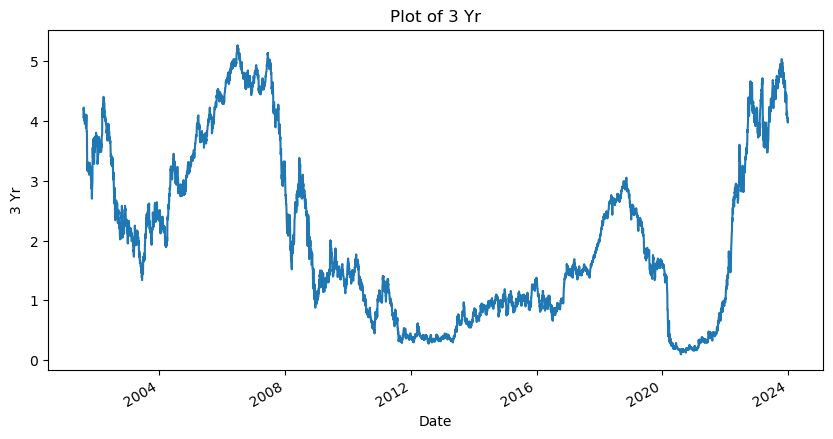

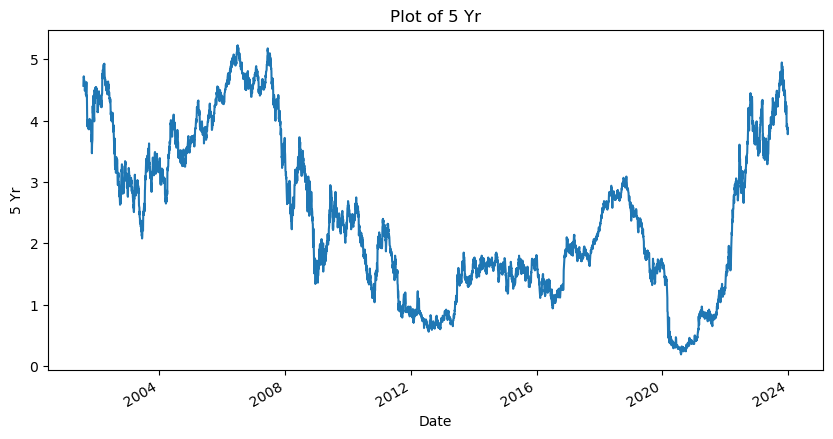

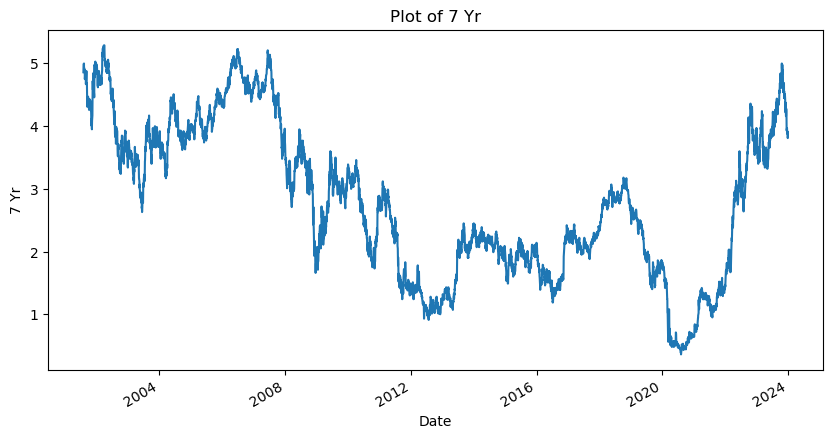

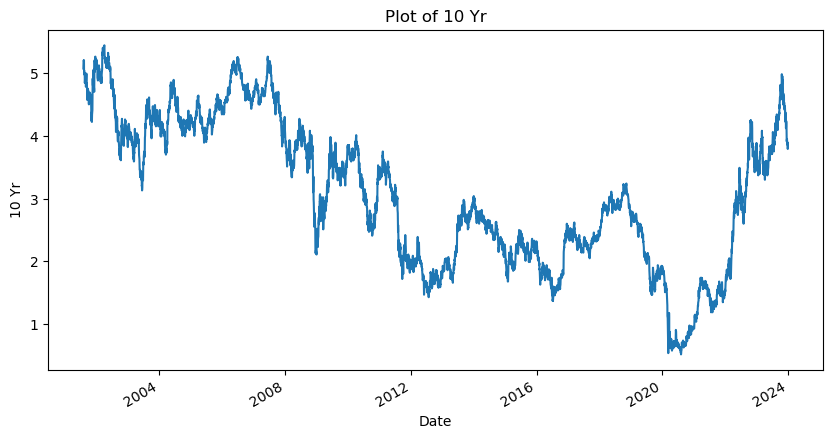

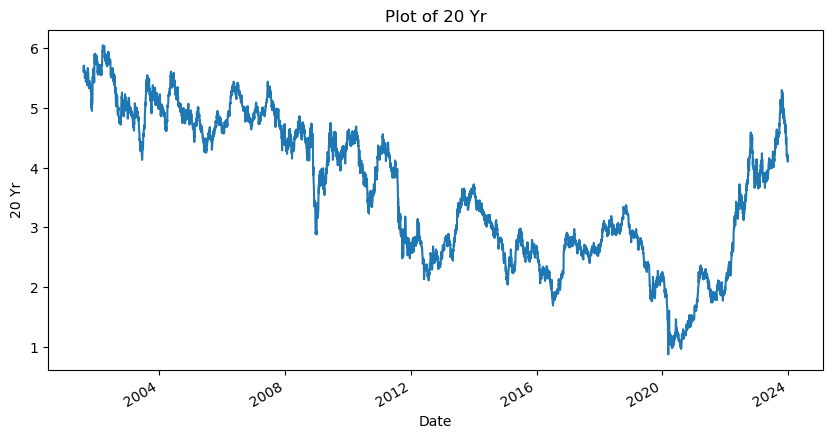

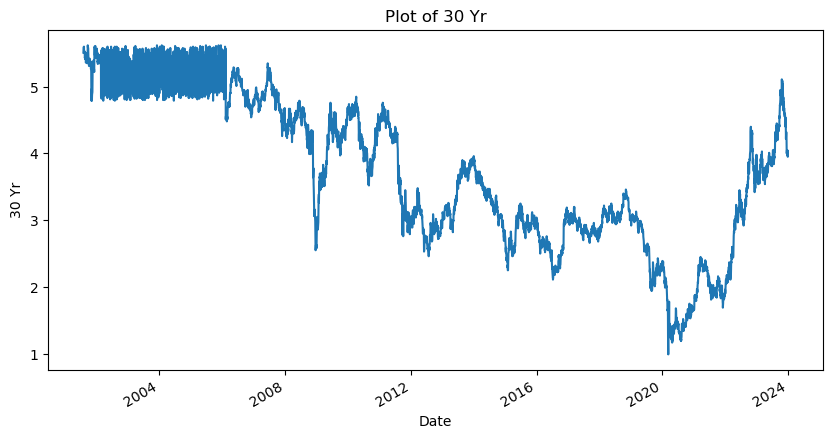

In [4]:
for column in data.columns:
    plt.figure(figsize=(10, 5))  
    data[column].plot(title=f'Plot of {column}')
    plt.xlabel('Date')  
    plt.ylabel(column)  
    plt.show()  

## Check for stationarity

**We utilize the adfuller method from the statsmodels package to perform the Augmented Dickey-Fuller (ADF) test on a given time series. This statistical test is crucial for determining the stationarity of the series.**

In [5]:
from statsmodels.tsa.stattools import adfuller

def ad_test(series):
    dftest = adfuller(series, autolag='AIC')  
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations Used for ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [6]:
for column in data.columns:
    print(f"ADF Test for {column}")
    ad_test(data[column])
    print("\n")

ADF Test for 1 Mo
1. ADF :  -0.20227819004020234
2. P-Value :  0.9382495178757151
3. Num of Lags :  33
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  5570
5. Critical Values : 
	 1% :  -3.43152456305293
	 5% :  -2.8620590415501264
	 10% :  -2.5670462844360498


ADF Test for 3 Mo
1. ADF :  -0.4737067188891577
2. P-Value :  0.8970461313733356
3. Num of Lags :  33
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  5570
5. Critical Values : 
	 1% :  -3.43152456305293
	 5% :  -2.8620590415501264
	 10% :  -2.5670462844360498


ADF Test for 6 Mo
1. ADF :  -0.6430577697578083
2. P-Value :  0.8609529663978555
3. Num of Lags :  29
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  5574
5. Critical Values : 
	 1% :  -3.43152371977727
	 5% :  -2.8620586689786256
	 10% :  -2.567046086104574


ADF Test for 1 Yr
1. ADF :  -0.9726959186366724
2. P-Value :  0.7630921385620455
3. Num of Lags :  31
4. Num of 

**As we can see, all the series fail to reject the null hypothesis of the presence of a unit root, indicating that the time series is not stationary at conventional significance levels.**

## Split data into training and testing

**Given the challenges and limited practicality in accurately forecasting long-term interest rates, we will focus our predictions on the final two months, which encompass a total of 43 days. This shorter timeframe provides a more manageable scope for analysis and potentially more reliable outcomes.**

In [7]:
print(data.shape)
train_data = data[:'2023-10-29']
validation_data = data['2023-10-29':] 
print(train_data.shape,validation_data.shape)

(5604, 11)
(5561, 11) (43, 11)


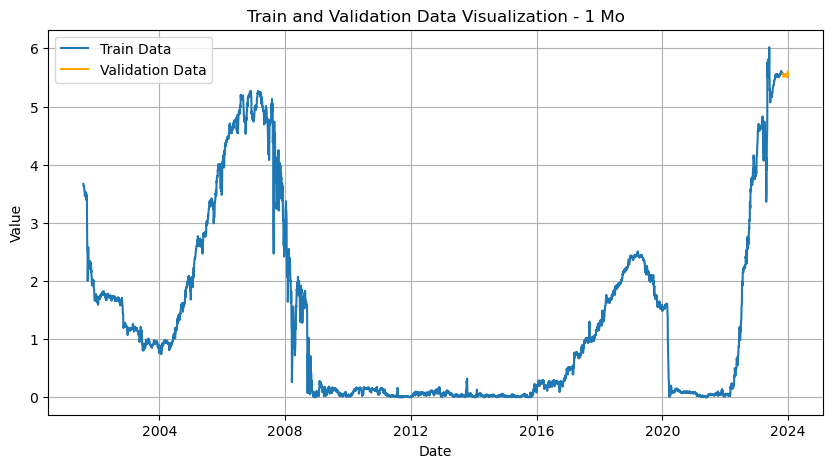

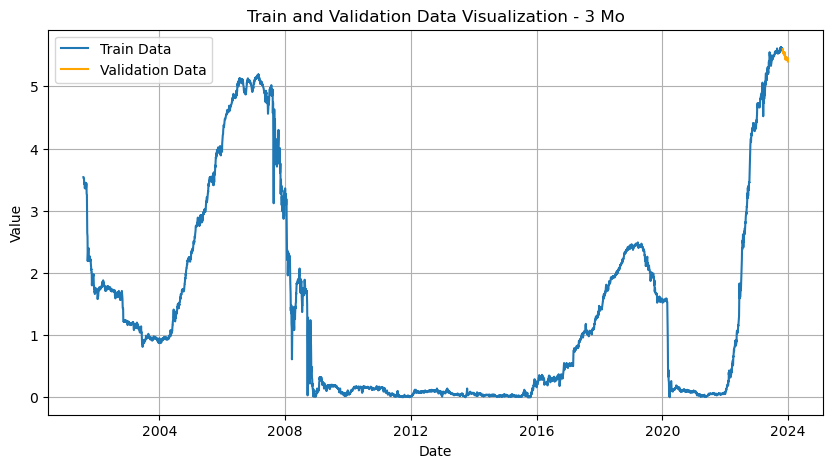

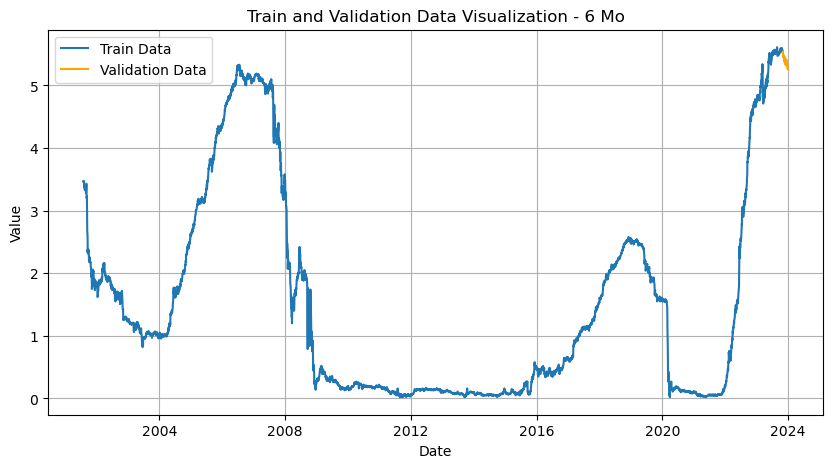

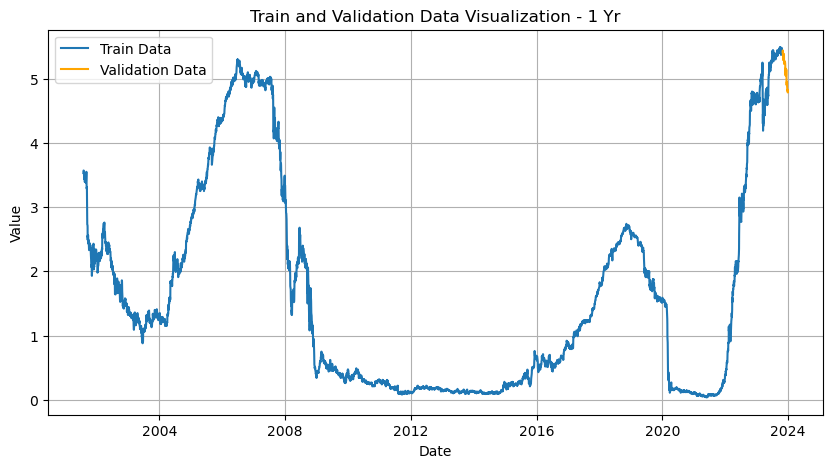

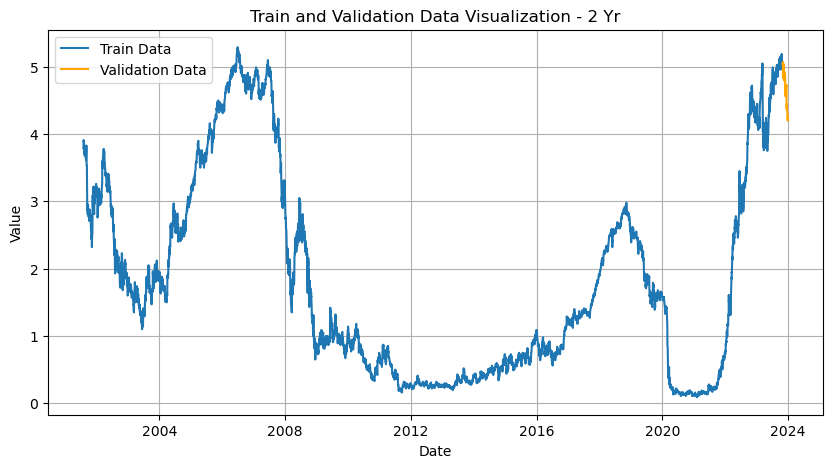

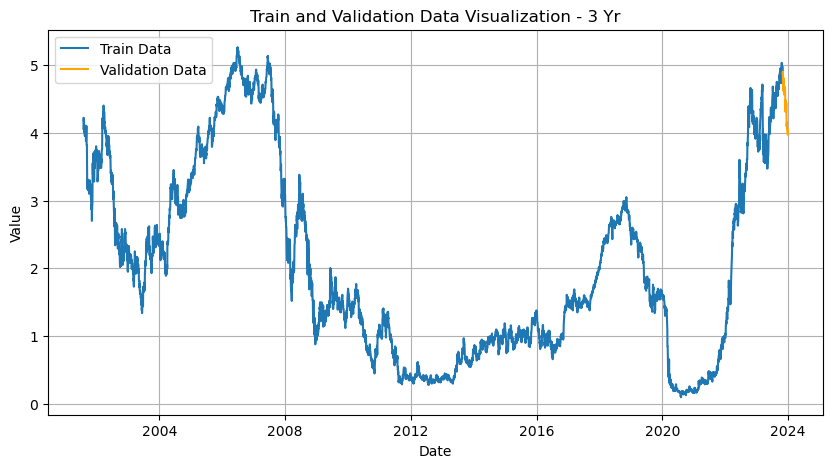

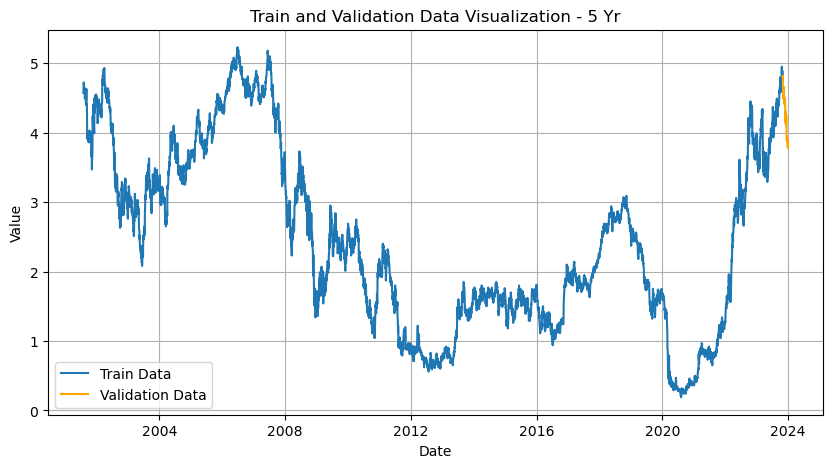

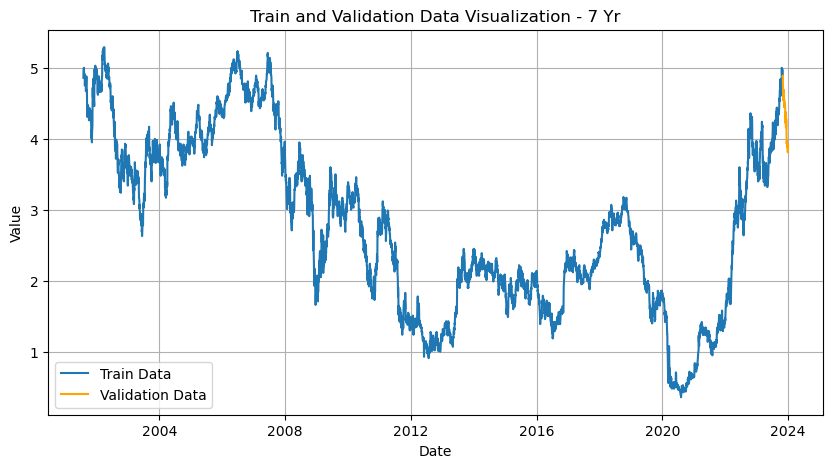

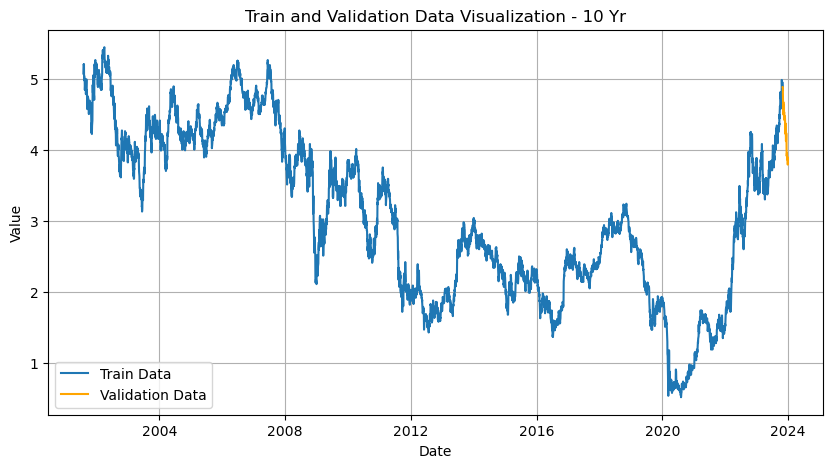

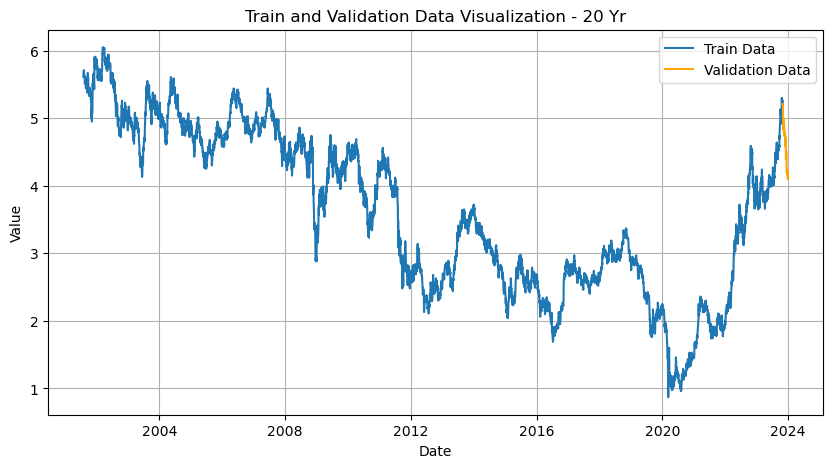

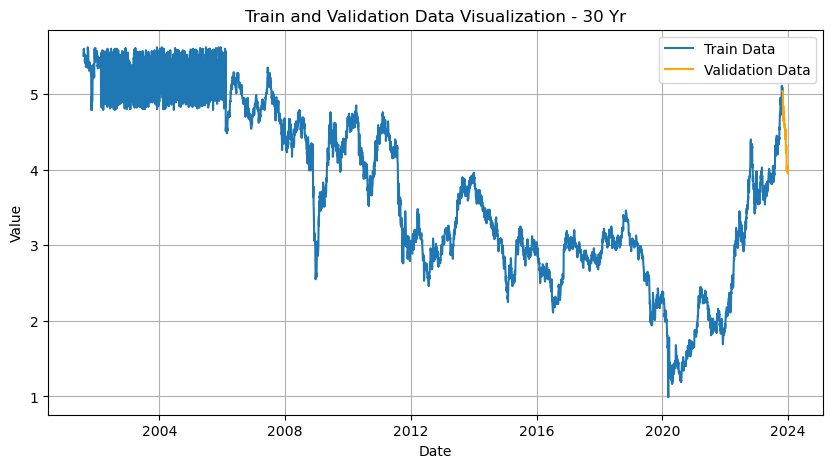

In [8]:
for column in data.columns:
    plt.figure(figsize=(10, 5))  
    plt.plot(train_data[column], label='Train Data') 
    plt.plot(validation_data[column], label='Validation Data', color='orange')  
    plt.title(f'Train and Validation Data Visualization - {column}')  
    plt.xlabel('Date')  
    plt.ylabel('Value') 
    plt.legend()  
    plt.grid(True)  
    plt.show()

In [9]:
train_data

1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99   5.19   5.70   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2023-10-23  5.57  5.58  5.56  5.42  5.05  4.89  4.81  4.87   4.86   5.19   
2023-10-24  5.57  5.58  5.57  5.41  5.02  4.91  4.82  4.86   4.83   5.15   
2023-10-25  5.56  5.59  5.57  5.43  5.08  4.98  4.89  4.98   4.95   5.27   
2023-10-26  5.57  5.59  5.55  5.39  5.02  4.89  4.79  4.86   4.86   5.19   
2023-10-27  5.57  5.59  5.55  5.39  4.99  4.84  4.76  4.83   4.84   5.19   

            30 Yr  
Date               
2001-07-31   5.51  
2001-08-01   5.53  
2001-08-02   5.57  
2001-08-03   5.59  
2001-08-06   5.59  
...           ...  
2023-10-23   5.01  
2023-10-24   4.96  
2023-10-25   5.09  
2023-10-26   5.01  
2023-10-27   5.03  

[5561 rows x 11 columns]

In [10]:
validation_data

1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2023-10-30  5.56  5.60  5.53  5.41  5.03  4.87  4.80  4.88   4.88   5.21   
2023-10-31  5.56  5.59  5.54  5.44  5.07  4.90  4.82  4.89   4.88   5.21   
2023-11-01  5.56  5.57  5.51  5.37  4.95  4.76  4.67  4.75   4.77   5.13   
2023-11-02  5.52  5.54  5.50  5.38  4.98  4.78  4.65  4.68   4.67   4.99   
2023-11-03  5.53  5.53  5.45  5.29  4.83  4.62  4.49  4.55   4.57   4.93   
2023-11-06  5.53  5.56  5.47  5.33  4.93  4.72  4.60  4.66   4.67   5.00   
2023-11-07  5.53  5.55  5.47  5.33  4.91  4.64  4.53  4.58   4.58   4.91   
2023-11-08  5.52  5.54  5.46  5.34  4.93  4.65  4.51  4.54   4.49   4.82   
2023-11-09  5.53  5.54  5.46  5.39  5.03  4.77  4.65  4.68   4.62   4.97   
2023-11-10  5.53  5.53  5.46  5.38  5.04  4.80  4.65  4.68   4.61   4.93   
2023-11-13  5.53  5.55  5.48  5.37  5.02  4.80  4.66  4.69   4.63   4.95   
2023-11-14  5.52  5.52  5.41  5.24  4.80  4.56  4.42  4.45   4.44   4.80   
2023-11-15  5.52  5.53  5.41  5.27  4.90  4.68  4.52  4.56   4.53   4.87   
2023-11-16  5.53  5.51  5.38  5.23  4.83  4.59  4.43  4.47   4.45   4.82   
2023-11-17  5.52  5.50  5.39  5.24  4.88  4.64  4.45  4.47   4.44   4.80   
2023-11-20  5.53  5.54  5.43  5.25  4.89  4.62  4.44  4.46   4.42   4.74   
2023-11-21  5.52  5.53  5.42  5.24  4.86  4.60  4.41  4.44   4.41   4.75   
2023-11-22  5.54  5.54  5.42  5.26  4.89  4.62  4.44  4.46   4.42   4.73   
2023-11-24  5.55  5.54  5.45  5.27  4.92  4.67  4.49  4.51   4.47   4.79   
2023-11-27  5.54  5.49  5.45  5.24  4.84  4.60  4.38  4.43   4.39   4.72   
2023-11-28  5.53  5.47  5.42  5.21  4.73  4.49  4.29  4.36   4.34   4.70   
2023-11-29  5.53  5.45  5.38  5.12  4.64  4.40  4.22  4.28   4.27   4.62   
2023-11-30  5.56  5.45  5.38  5.16  4.73  4.48  4.31  4.38   4.37   4.72   
2023-12-01  5.55  5.43  5.33  5.05  4.56  4.31  4.14  4.22   4.22   4.58   
2023-12-04  5.55  5.46  5.41  5.10  4.64  4.40  4.23  4.30   4.28   4.61   
2023-12-05  5.54  5.45  5.37  5.06  4.57  4.33  4.14  4.20   4.18   4.48   
2023-12-06  5.54  5.45  5.38  5.07  4.60  4.33  4.12  4.16   4.12   4.40   
2023-12-07  5.53  5.44  5.36  5.05  4.58  4.31  4.11  4.16   4.14   4.42   
2023-12-08  5.54  5.44  5.39  5.13  4.71  4.45  4.24  4.28   4.23   4.49   
2023-12-11  5.55  5.47  5.40  5.14  4.71  4.42  4.25  4.27   4.23   4.51   
2023-12-12  5.53  5.46  5.41  5.14  4.73  4.42  4.23  4.24   4.20   4.48   
2023-12-13  5.52  5.44  5.33  4.94  4.46  4.18  4.00  4.04   4.04   4.36   
2023-12-14  5.54  5.43  5.31  4.90  4.37  4.09  3.90  3.93   3.92   4.21   
2023-12-15  5.54  5.44  5.33  4.95  4.44  4.13  3.91  3.94   3.91   4.19   
2023-12-18  5.52  5.46  5.36  4.95  4.43  4.15  3.94  3.97   3.95   4.23   
2023-12-19  5.51  5.43  5.35  4.93  4.41  4.15  3.94  3.96   3.93   4.23   
2023-12-20  5.50  5.44  5.33  4.88  4.34  4.06  3.86  3.88   3.86   4.17   
2023-12-21  5.54  5.42  5.31  4.84  4.33  4.06  3.87  3.91   3.89   4.19   
2023-12-22  5.54  5.44  5.31  4.82  4.31  4.04  3.87  3.92   3.90   4.21   
2023-12-26  5.53  5.45  5.28  4.83  4.26  4.05  3.89  3.91   3.89   4.20   
2023-12-27  5.55  5.44  5.26  4.79  4.20  3.97  3.78  3.81   3.79   4.10   
2023-12-28  5.57  5.45  5.28  4.82  4.26  4.02  3.83  3.84   3.84   4.14   
2023-12-29  5.60  5.40  5.26  4.79  4.23  4.01  3.84  3.88   3.88   4.20   

            30 Yr  
Date               
2023-10-30   5.04  
2023-10-31   5.04  
2023-11-01   4.96  
2023-11-02   4.82  
2023-11-03   4.77  
2023-11-06   4.84  
2023-11-07   4.75  
2023-11-08   4.64  
2023-11-09   4.77  
2023-11-10   4.73  
2023-11-13   4.75  
2023-11-14   4.61  
2023-11-15   4.68  
2023-11-16   4.63  
2023-11-17   4.59  
2023-11-20   4.57  
2023-11-21   4.57  
2023-11-22   4.55  
2023-11-24   4.60  
2023-11-27   4.53  
2023-11-28   4.52  
2023-11-29   4.44  
2023-11-30   4.54  
2023-12-01   4.40  
2023-12-04   4.43  
2023-12-05   4.30  
2023-12-06   4.22  
2023-12-07 

**Compute mean_5yr and mean_30yr in preparation for calculating the sharpe ratio**

In [11]:
mean_30yr = validation_data['30 Yr'].mean()
mean_30yr

4.437906976744186

In [12]:
mean_5yr = validation_data['5 Yr'].mean()
mean_5yr

4.277209302325582

## Figure out order for ARIMA model

**We utilize the auto_arima function to determine the optimal non-seasonal and seasonal order parameters, aiming to select an SARIMA model that appropriately accounts for any non-stationarity in the time series.**

In [13]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [14]:
for column in data.columns:
    model_autoARIMA = auto_arima(train_data[column], 
                                 trace=True,  
                                 suppress_warnings=True, 
                                 error_action='ignore', 
                                 seasonal=True,  
                                 m=5,           
                                 stepwise=True) 
    
    print(f"Best ARIMA model for column {column}: order={model_autoARIMA.order} seasonal_order={model_autoARIMA.seasonal_order}")
    print("Model summary:")
    print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[5]             : AIC=inf, Time=2.81 sec
 ARIMA(0,2,0)(0,0,0)[5]             : AIC=-11559.913, Time=0.11 sec
 ARIMA(1,2,0)(1,0,0)[5]             : AIC=-12530.539, Time=0.43 sec
 ARIMA(0,2,1)(0,0,1)[5]             : AIC=inf, Time=1.29 sec
 ARIMA(1,2,0)(0,0,0)[5]             : AIC=-12403.188, Time=0.12 sec
 ARIMA(1,2,0)(2,0,0)[5]             : AIC=-12536.737, Time=0.89 sec
 ARIMA(1,2,0)(2,0,1)[5]             : AIC=-12548.175, Time=2.54 sec
 ARIMA(1,2,0)(1,0,1)[5]             : AIC=-12549.131, Time=1.21 sec
 ARIMA(1,2,0)(0,0,1)[5]             : AIC=-12520.666, Time=0.63 sec
 ARIMA(1,2,0)(1,0,2)[5]             : AIC=-12548.475, Time=2.08 sec
 ARIMA(1,2,0)(0,0,2)[5]             : AIC=-12528.255, Time=1.34 sec
 ARIMA(1,2,0)(2,0,2)[5]             : AIC=-12548.984, Time=2.49 sec
 ARIMA(0,2,0)(1,0,1)[5]             : AIC=-11644.300, Time=0.88 sec
 ARIMA(2,2,0)(1,0,1)[5]             : AIC=-12896.168, Time=1.69 sec
 ARIMA(2,2,0)(0,0,1

## Train the model and make predictions

**We dynamically update the historical data. After each single-step forecast, the actual observation is added to the historical data, which is then used for the next prediction. The comparison between predicted values and actual values is presented below.**

**However, for a few series (3 Mo, 1 Yr, 2 Yr, 3 Yr), due to the significant lag difference between AR and MA components, the model was unable to converge. Consequently, we manually adjusted the parameters for these series, appropriately and slightly reducing the AR lag order, which helped to enhance the model's performance.**

Processing column: 1 Mo
MSE for 1 Mo: 0.0002
[5.573873206519476, 5.5560036237164825, 5.58003533056898, 5.5598851475304105, 5.518858263708141, 5.530729373761584, 5.526800745771014, 5.546362012437555, 5.515815830279529, 5.529803863529866, 5.532476220854638, 5.526241743354612, 5.534525851095957, 5.521908515335219, 5.529071177535879, 5.520652039587835, 5.526065849147092, 5.534711194712325, 5.539739306977686, 5.549437967394936, 5.540674883211693, 5.527729603983575, 5.545749244850993, 5.560503236275877, 5.548224462862287, 5.548535292250497, 5.540503178881645, 5.554230893053336, 5.5282763877023, 5.539169353483039, 5.549549564349175, 5.52876102149397, 5.530047118104832, 5.542151328176229, 5.538374603082192, 5.517157246006955, 5.509477473316152, 5.512645542828624, 5.540008078044366, 5.53497812593446, 5.527601827372837, 5.553000341010297, 5.582725568754648]


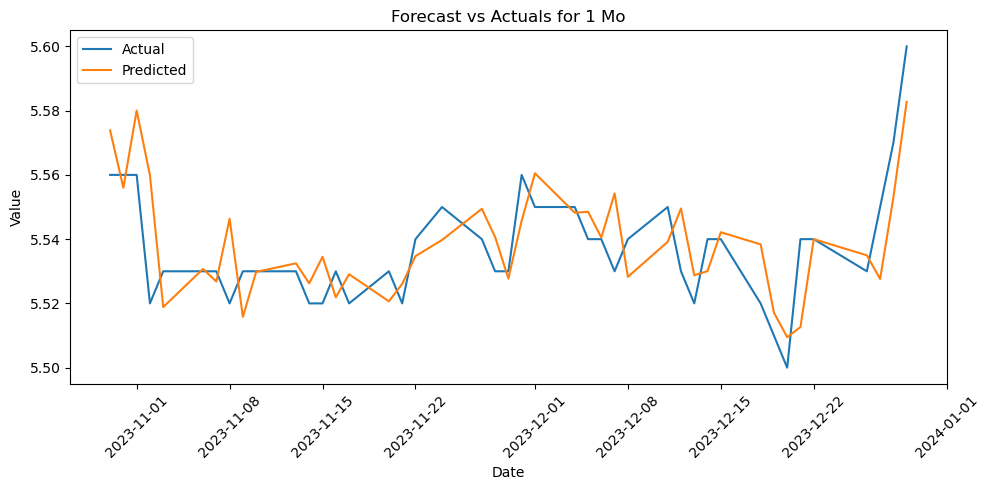

Processing column: 3 Mo
MSE for 3 Mo: 0.0005
[5.5959231779942815, 5.607194952277852, 5.594592093457633, 5.573175809199311, 5.541709288770427, 5.534109876511878, 5.5692630686336315, 5.554162660180582, 5.544058174988505, 5.545274065516085, 5.533930632768213, 5.557771890030127, 5.521292513445672, 5.5363202338232025, 5.512418569317359, 5.503567398892291, 5.550029268092484, 5.533682005404248, 5.546205973459266, 5.544923683342805, 5.488338945001684, 5.471922549454225, 5.4517708561989595, 5.454240656109895, 5.43157912371108, 5.4679942796861045, 5.452900867964395, 5.454120977628608, 5.442778022735988, 5.444007352192998, 5.477907234180836, 5.462821712522293, 5.44141931971686, 5.432568861261094, 5.445106314016543, 5.4664538589979585, 5.429997211486341, 5.445023245829543, 5.421124087363853, 5.446224749807411, 5.455005737013496, 5.4424184221496965, 5.454953716107377]


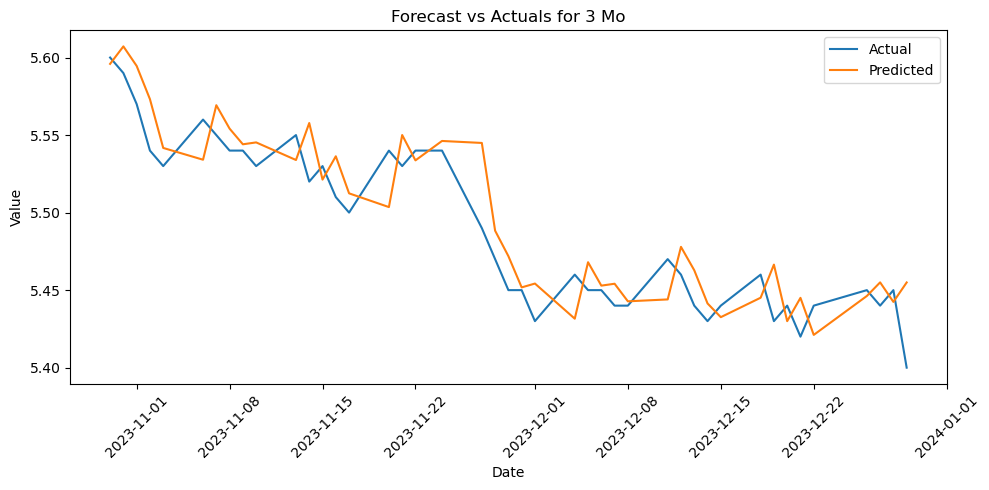

Processing column: 6 Mo
MSE for 6 Mo: 0.0009
[5.557379805309999, 5.535567982391444, 5.54199091425891, 5.512047821777481, 5.50072797180135, 5.454394820364975, 5.475999566304372, 5.472883288111397, 5.455286117032333, 5.461879660567196, 5.464627623176879, 5.479123335423342, 5.407998111971152, 5.413525663459903, 5.385497927272488, 5.389618838350783, 5.430703358915361, 5.41622387765147, 5.415332674026441, 5.459521988181216, 5.45164551362376, 5.412385827885484, 5.386914485472872, 5.385381141672257, 5.330286391021589, 5.415108333187363, 5.366246333584132, 5.370683214995065, 5.369236925811498, 5.393650599127194, 5.396636877295651, 5.40956637528222, 5.325988445233268, 5.314443348401256, 5.344417790520382, 5.353884884793698, 5.341441246404925, 5.329170370290398, 5.313696681886732, 5.3152756886964925, 5.279805994260638, 5.254579224787299, 5.283034799705793]


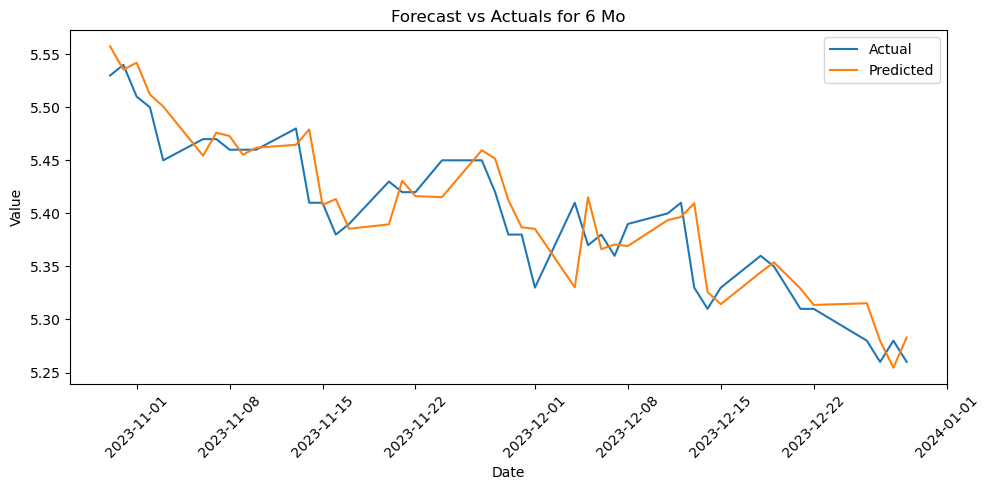

Processing column: 1 Yr
MSE for 1 Yr: 0.0030
[5.394268205114763, 5.4145240594315505, 5.44481584169799, 5.373591285151703, 5.384056471265437, 5.29265639683806, 5.333643403467734, 5.333423531806422, 5.343534249664083, 5.394169109631515, 5.383755828861026, 5.373625110600732, 5.241770106655753, 5.27277646643279, 5.232055418255584, 5.242342206909148, 5.252417714198197, 5.242209835167283, 5.2625110944861735, 5.272542131809027, 5.242060155815341, 5.21173835236675, 5.120533292088443, 5.16148357234526, 5.049792015559656, 5.100822081323809, 5.060151626101388, 5.070373906877715, 5.050083390122729, 5.131184678936643, 5.141103465161756, 5.141068280894567, 4.938505640075954, 4.898400836014052, 4.949238992034383, 4.949108711734866, 4.92883415171202, 4.878204585278247, 4.837804132604933, 4.817656674836188, 4.827880240141078, 4.787294461474462, 4.8178771916465015]


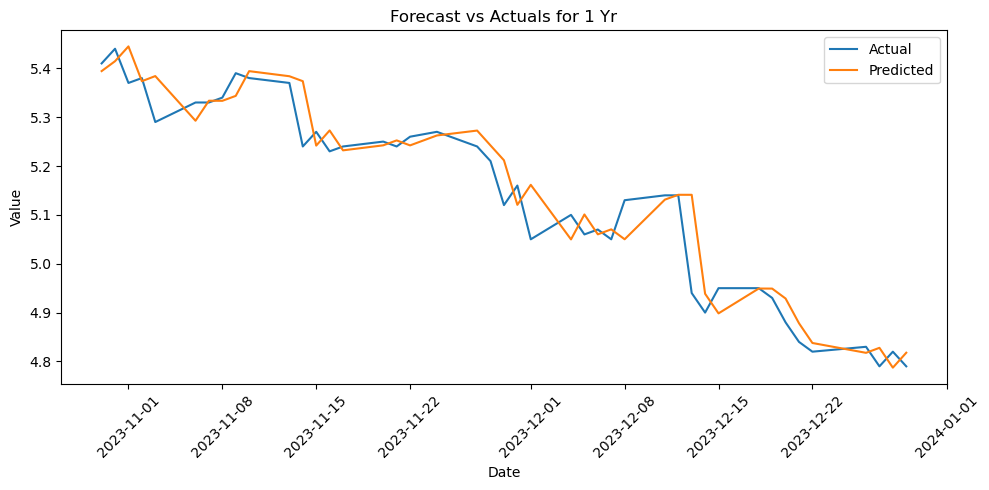

Processing column: 2 Yr
MSE for 2 Yr: 0.0077
[4.996699226696123, 5.034770422265584, 5.074611797229771, 4.959341358880269, 4.984802316870885, 4.8390625183580855, 4.931938776473659, 4.9161930234638005, 4.934580239747476, 5.032978241820335, 5.045063743616106, 5.02628837773376, 4.811356238751666, 4.901348237708168, 4.8368630959256125, 4.883209062479633, 4.8953372146957825, 4.865372624201554, 4.893980164581379, 4.923765416246544, 4.847141059498629, 4.737649806234097, 4.646231107058296, 4.730832495555015, 4.568980834626867, 4.64105651113781, 4.57573438773699, 4.601725139835251, 4.584318496575179, 4.708664618633544, 4.7140093162707775, 4.7328731467917144, 4.47203236464318, 4.374031635096545, 4.439690424727735, 4.4322936635488785, 4.41403898943447, 4.34428006682111, 4.331527317251286, 4.312011164549234, 4.262772339625053, 4.202912693324098, 4.25896599427616]


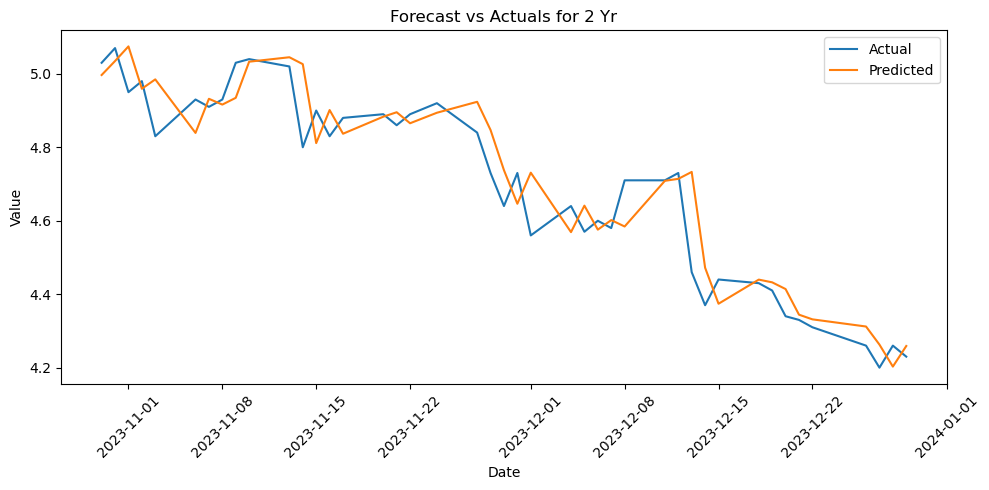

Processing column: 3 Yr
MSE for 3 Yr: 0.0081
[4.8457629884542746, 4.875448706638185, 4.904864029043916, 4.765951026340799, 4.784591867763246, 4.625807017153053, 4.723238098318507, 4.645362805369659, 4.653431495229265, 4.7725078633688165, 4.8045564305890895, 4.804565103464594, 4.567153124965196, 4.682882291500102, 4.594621633507124, 4.643722786071062, 4.623411246480587, 4.604652386626632, 4.623405241292919, 4.673616301366804, 4.604966314523768, 4.495239641796273, 4.405327497807954, 4.481799967770531, 4.315172088985044, 4.401185254830004, 4.333279281678853, 4.333100257476139, 4.312568822328937, 4.450551919726051, 4.422695886783457, 4.422455712260333, 4.18659767895727, 4.091781706023505, 4.131914058952816, 4.150864264660341, 4.151097378782411, 4.062348103293118, 4.063163008652192, 4.041675354084617, 4.051430383229354, 3.9699680132571715, 4.019919490163364]


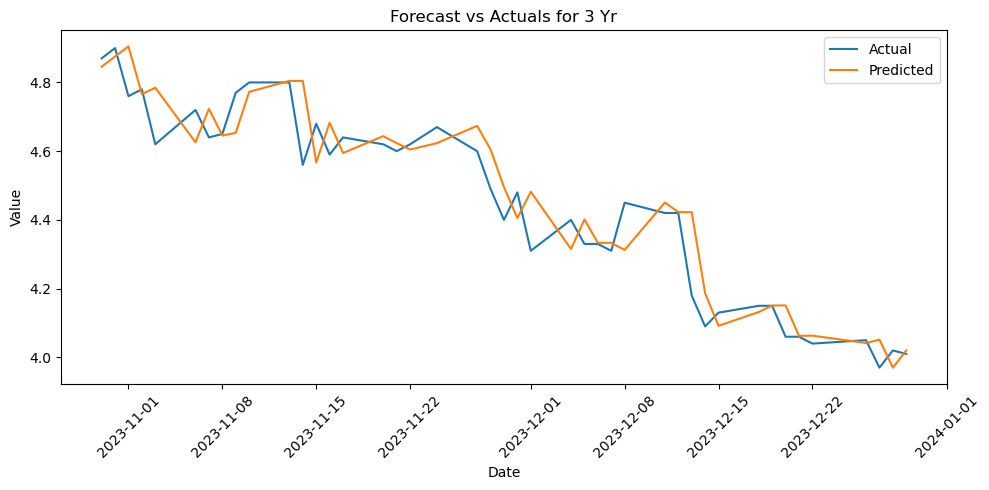

Processing column: 5 Yr
MSE for 5 Yr: 0.0083
[4.766258807858338, 4.801446621270596, 4.817817945411822, 4.66966686336636, 4.659267545494608, 4.492078617326024, 4.609638549130979, 4.524033542805934, 4.514883903036622, 4.6499630950626605, 4.641785442484695, 4.6598782169746435, 4.420519952739719, 4.533739923810625, 4.424991477527482, 4.455910057785162, 4.438658840832586, 4.4111866501368295, 4.4414496743270515, 4.487878025913358, 4.378060621313387, 4.297166260524607, 4.2258297727841665, 4.313900922988601, 4.136610234046833, 4.239257047690151, 4.135641620055681, 4.1258856379308915, 4.111063529734553, 4.239598215932594, 4.242440252341101, 4.2295249531722545, 4.003022521219354, 3.914221768239896, 3.9159905307204186, 3.9400328804502434, 3.9386072035131834, 3.8607005961683414, 3.874487090196545, 3.86949969568353, 3.8900776087991242, 3.779804257333696, 3.8359204878943105]


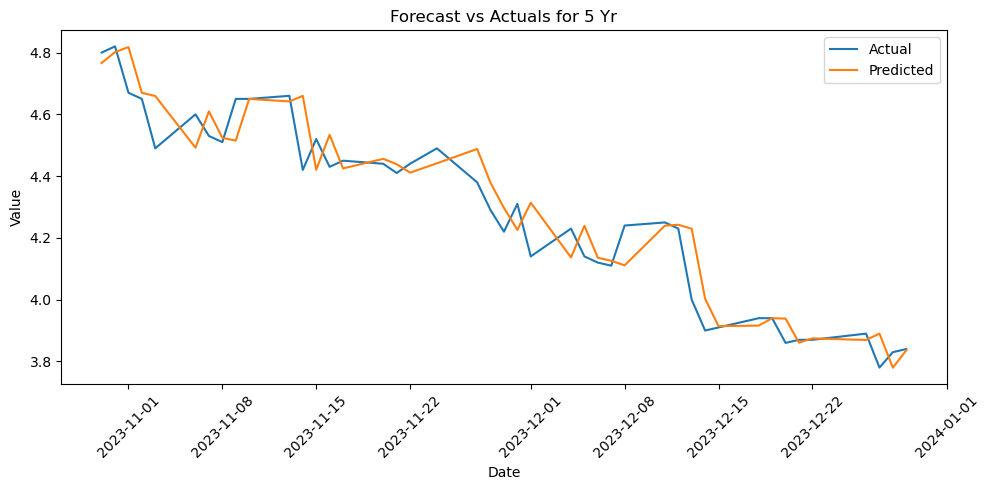

Processing column: 7 Yr
MSE for 7 Yr: 0.0076
[4.836941062858195, 4.880957788007362, 4.887490791314261, 4.750858894703529, 4.68844577832322, 4.555185534412652, 4.666731072862913, 4.575080036844132, 4.545167117001612, 4.680585863855728, 4.672439908470088, 4.689852879674216, 4.45152169815153, 4.572140259888159, 4.465330407594399, 4.475511534906554, 4.459935209636168, 4.441090474403835, 4.460858062343739, 4.5083669608954295, 4.4282781342107755, 4.3651310563076535, 4.2847344847593005, 4.383511404003737, 4.216955240874293, 4.307667049192395, 4.197119286507157, 4.16623118895951, 4.162056986709561, 4.278699884633247, 4.263829744951588, 4.240795872627121, 4.04401471229802, 3.942131938330068, 3.9460892259625284, 3.9698146132914482, 3.958847354227189, 3.8815144306499487, 3.913857818320901, 3.9183982003674185, 3.9097775617181045, 3.8117076774482332, 3.844984450576273]


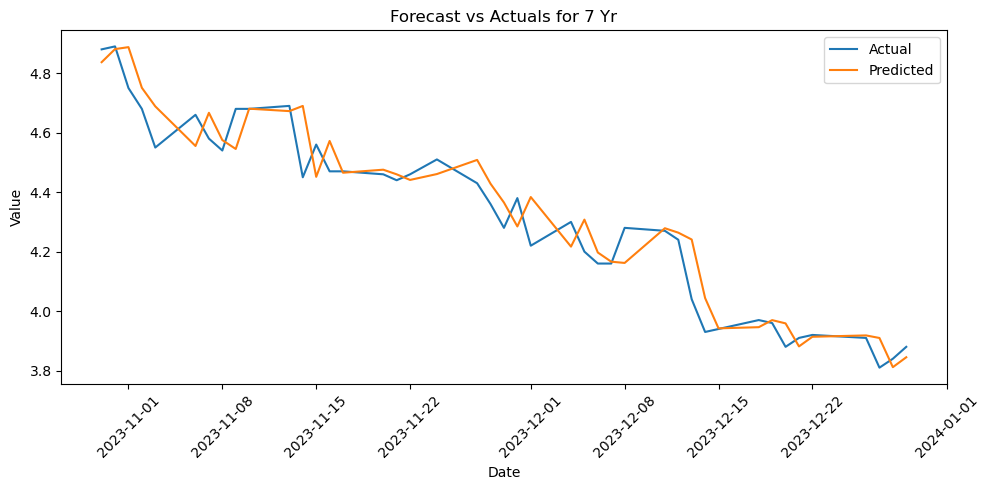

Processing column: 10 Yr
MSE for 10 Yr: 0.0062
[4.84, 4.88, 4.88, 4.77, 4.67, 4.57, 4.67, 4.58, 4.49, 4.62, 4.61, 4.63, 4.44, 4.53, 4.45, 4.44, 4.42, 4.41, 4.42, 4.47, 4.39, 4.34, 4.27, 4.37, 4.22, 4.28, 4.18, 4.12, 4.14, 4.23, 4.23, 4.2, 4.04, 3.92, 3.91, 3.95, 3.93, 3.86, 3.89, 3.9, 3.89, 3.79, 3.84]


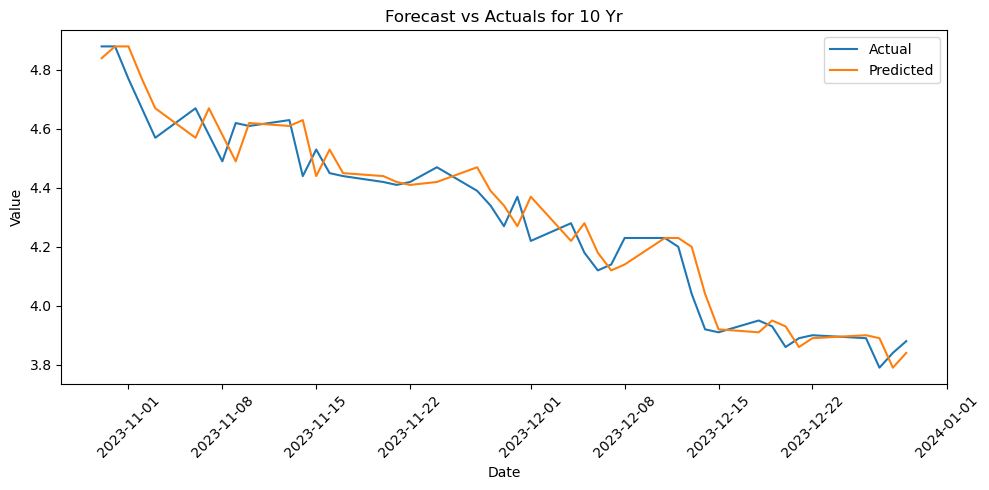

Processing column: 20 Yr
MSE for 20 Yr: 0.0057
[5.193025684108545, 5.20960655315411, 5.209242001812929, 5.131573889972941, 4.995700613787383, 4.936381681227093, 5.0009815714729395, 4.909065128916617, 4.825115718150123, 4.970602450891468, 4.924970421475795, 4.951147356783303, 4.8022282139883306, 4.874286733302047, 4.818398630949212, 4.802302412622615, 4.741989007331208, 4.7520494157803945, 4.730037972271284, 4.789506084579696, 4.719222895674165, 4.703041320511824, 4.6224059055994395, 4.720856940726878, 4.5794225438220435, 4.614435763285308, 4.481862426488343, 4.406366657693805, 4.422409992211605, 4.487750278328449, 4.507051749846218, 4.4799345167889575, 4.363677920353947, 4.217384563029303, 4.195754643934215, 4.229904760284644, 4.228561940746877, 4.171221545780889, 4.191756749113333, 4.208868932464018, 4.199480948798179, 4.102398685268898, 4.14280682710148]


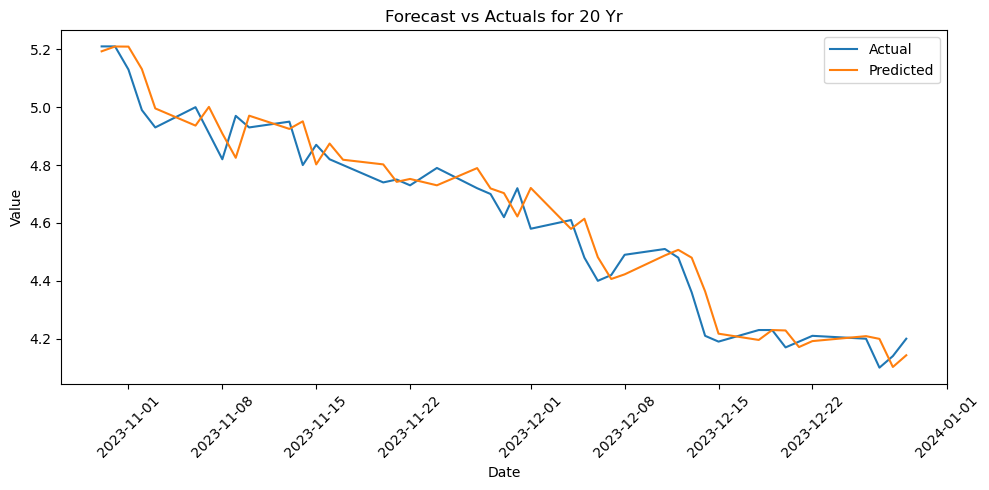

Processing column: 30 Yr
MSE for 30 Yr: 0.0089
[5.0172143529494715, 5.034049686016223, 5.0162634153882655, 4.99539538518428, 4.9268360463734515, 4.88445205800556, 4.875947348878726, 4.8255361815115245, 4.754703014728511, 4.778511335338713, 4.746011711975049, 4.734262584040518, 4.684266371357499, 4.703380383609611, 4.675407828528016, 4.632943955894241, 4.624634198101004, 4.62178487268536, 4.5808507603764355, 4.581811130438088, 4.5558667541118325, 4.549019883972898, 4.497881081376238, 4.522554065253605, 4.473124946025832, 4.468298473793861, 4.411142270672816, 4.341835687402209, 4.297693322145072, 4.301546393675335, 4.307850093744, 4.3074550322191785, 4.249284113075372, 4.182607498048058, 4.113228747713203, 4.095473751626231, 4.069070789747919, 4.052228868469406, 4.034882240919878, 4.03796705735247, 4.024845647588514, 4.00037892886383, 3.9964040710495046]


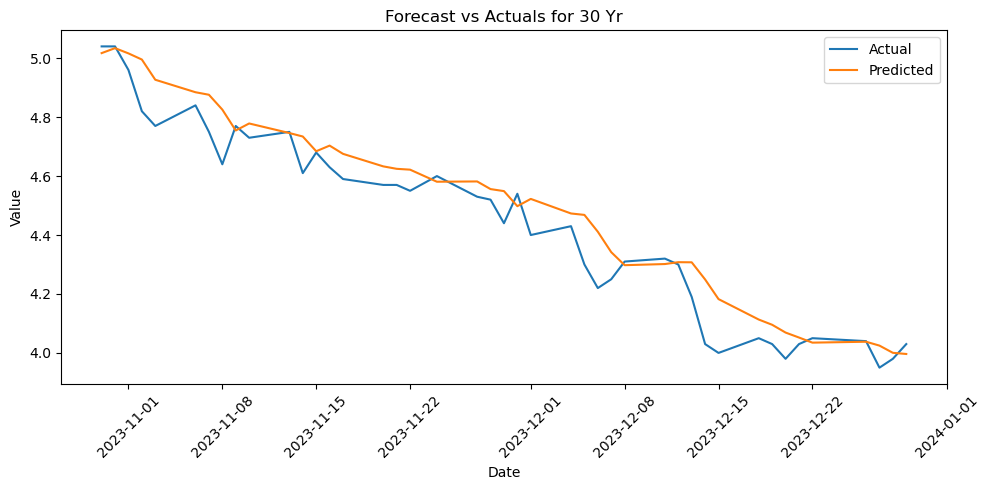

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error 

order_params = {
    '1 Mo': (4, 2, 0),
    '3 Mo': (1, 2, 1),
    '6 Mo': (2, 2, 4),
    '1 Yr': (1, 2, 1),
    '2 Yr': (1, 2, 1),
    '3 Yr': (1, 2, 1),
    '5 Yr': (0, 1, 2),
    '7 Yr': (0, 1, 2),
    '10 Yr': (0, 1, 0),
    '20 Yr': (2, 1, 0),
    '30 Yr': (2, 1, 3)
}

seasonal_order_params = {
    '1 Mo': (2, 0, 2, 5),
    '3 Mo': (0, 0, 0, 5),
    '6 Mo': (2, 0, 0, 5),
    '1 Yr': (0, 0, 0, 5),
    '2 Yr': (1, 0, 0, 5),
    '3 Yr': (2, 0, 0, 5),
    '5 Yr': (0, 0, 0, 5),
    '7 Yr': (0, 0, 0, 5),
    '10 Yr': (0, 0, 0, 5),
    '20 Yr': (0, 0, 0, 5),
    '30 Yr': (2, 0, 1, 5)
}


for column in train_data.columns:
    if column in order_params:
        print(f"Processing column: {column}")
        order = order_params[column]
        seasonal_order = seasonal_order_params[column]

        predictions = []

        history = train_data[column].iloc[:5561].tolist()

        for i in range(len(validation_data)):
            model = SARIMAX(history,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            model_fit = model.fit(disp=False)
    
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            history.append(validation_data[column].iloc[i])
        
        mse = mean_squared_error(validation_data[column].values, predictions)
        print(f"MSE for {column}: {mse:.4f}")
        
        print(predictions)
        plt.figure(figsize=(10, 5))
        plt.plot(validation_data.index, validation_data[column].values, label='Actual')
        plt.plot(validation_data.index, predictions, label='Predicted')
        plt.title(f'Forecast vs Actuals for {column}')
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.xticks(rotation=45)  
        plt.tight_layout()  
        plt.show()

**As we can see, the predicted values closely follow the actual values, indicating that the forecasting model is capturing the trend of the data reasonably well. To further assess the performance and accuracy of our predictive model, we calculated the Mean Squared Errors (MSE), which are all very low in our predictions. And lower values of MSE indicate a better fit of the model to the data, implying more accurate predictions.  
So the model is a good fit between the model predictions and the observed data.**

## Predictions-based trading strategy 

**Here we just take 5 Yr and 30 Yr as examples.**

**We randomly test a few simple strategies and decide to follow a momentum strategy on the 5 Yr T-Note futures and 30 Yr treasury bond futures.  
To be specific, our strategy starts with an initial capital of $100,000. It iterates over each date and corresponding predicted rate change. When a predicted rate change is less than -0.04 (which could be interpreted as a significant predicted drop in rates), and there is available capital, the strategy buys as many shares as possible without going into debt. Conversely, when the predicted rate change is greater than 0.01 (indicating a potential increase in rates), and there are shares owned, all shares are sold.**


In [16]:
file_path2 = '/Users/sqycanmakeit/Desktop/HistoricalData_1714422582854.csv'  
data3 = pd.read_csv(file_path2)

predicted_rates2 = np.array([4.766258807858338, 4.801446621270596, 4.817817945411822, 4.66966686336636, 4.659267545494608, 4.492078617326024, 4.609638549130979, 4.524033542805934, 4.514883903036622, 4.6499630950626605, 4.641785442484695, 4.6598782169746435, 4.420519952739719, 4.533739923810625, 4.424991477527482, 4.455910057785162, 4.438658840832586, 4.4111866501368295, 4.4414496743270515, 4.487878025913358, 4.378060621313387, 4.297166260524607, 4.2258297727841665, 4.313900922988601, 4.136610234046833, 4.239257047690151, 4.135641620055681, 4.1258856379308915, 4.111063529734553, 4.239598215932594, 4.242440252341101, 4.2295249531722545, 4.003022521219354, 3.914221768239896, 3.9159905307204186, 3.9400328804502434, 3.9386072035131834, 3.8607005961683414, 3.874487090196545, 3.86949969568353, 3.8900776087991242, 3.779804257333696, 3.8359204878943105])
dates = pd.date_range('2023-10-30', periods=43, freq='B')

In [17]:
futures_prices2 = data3['Close/Last'].values
futures_prices2 = futures_prices2[::-1]

In [18]:
if len(futures_prices2) > len(dates):
    futures_prices2 = futures_prices2[:len(dates)]  
else:
    futures_prices2 = np.pad(futures_prices2, (0, len(dates) - len(futures_prices2)), 'constant', constant_values=np.mean(futures_prices2))

futures_prices_series2 = pd.Series(futures_prices2, index=dates)

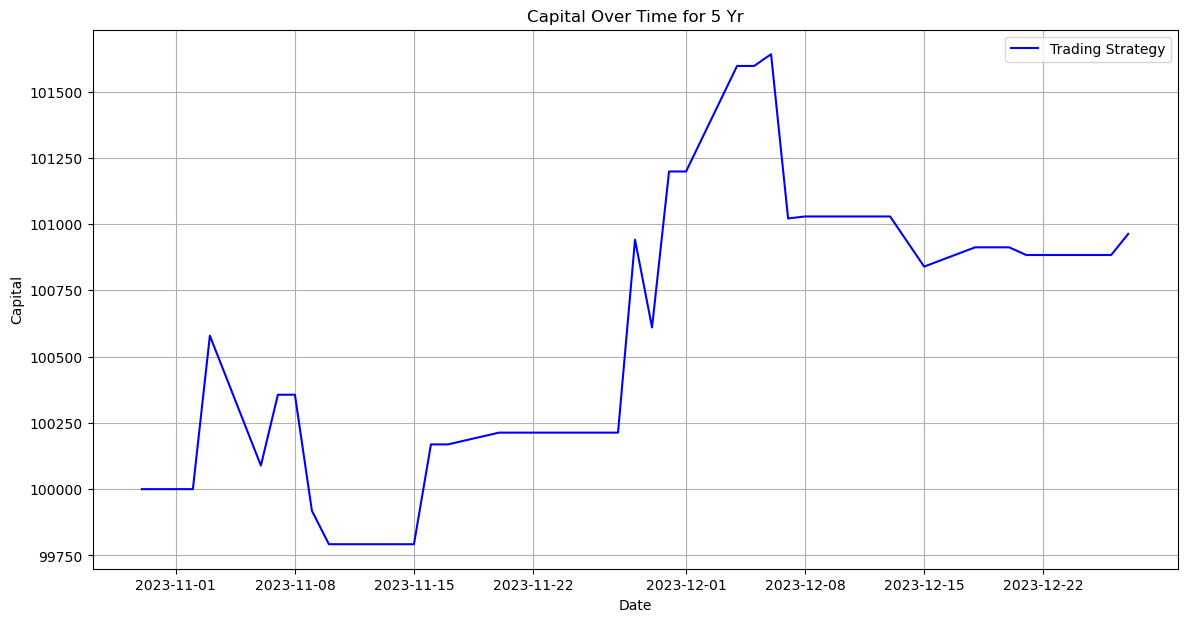

In [20]:
predicted_rates_series2 = pd.Series(predicted_rates2, index=dates)
futures_prices_series2 = pd.Series(futures_prices2, index=dates)

rate_changes2 = predicted_rates_series2.diff()

initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series = pd.Series(index=dates, dtype=float)

buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

for date, change in rate_changes2.items():
    price = futures_prices_series2.loc[date]
    capital_series.loc[date] = capital + shares_owned * price  

    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)
    
    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)

capital_series.iloc[-1] = capital + shares_owned * futures_prices_series2.iloc[-1]

initial_shares = initial_capital // futures_prices_series2[20]
bh_capital = futures_prices_series2 * initial_shares
bh_capital.iloc[0] = initial_capital  

plt.figure(figsize=(14, 7))
plt.plot(capital_series.index, capital_series, label='Trading Strategy', color='blue')
plt.title('Capital Over Time for 5 Yr')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
daily_returns2 = capital_series.pct_change().dropna()
mean_daily_returns2 = daily_returns2.mean()
std_daily_returns2 = daily_returns2.std()

annualized_return2 = mean_daily_returns2 * 252
annualized_std2 = std_daily_returns2 * np.sqrt(252)

risk_free_rate = mean_5yr/100
sharpe_ratio2 = (annualized_return2 - risk_free_rate) / annualized_std2

cumulative_returns = (1 + daily_returns2).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

print("Performance of 5 Yr's trading strategy:")
print(f"Mean Daily Return: {(mean_daily_returns2 * 100):.4f}%")
print(f"Annualized Return: {(annualized_return2 * 100):.4f}%")
print(f"Annualized Volatility: {(annualized_std2 * 100):.4f}%")
print(f"Sharpe Ratio: {sharpe_ratio2:.4f}")
print(f"Maximum Drawdown: {(max_drawdown * 100):.4f}%")

Performance of 5 Yr's trading strategy:
Mean Daily Return: 0.0231%
Annualized Return: 5.8264%
Annualized Volatility: 3.9250%
Sharpe Ratio: 0.3947
Maximum Drawdown: -0.7882%


In [22]:
file_path = '/Users/sqycanmakeit/Desktop/HistoricalData_1714420117007.csv'  
data2 = pd.read_csv(file_path)

predicted_rates = np.array([5.0172143529494715, 5.034049686016223, 5.0162634153882655, 4.99539538518428, 4.9268360463734515, 4.88445205800556, 4.875947348878726, 4.8255361815115245, 4.754703014728511, 4.778511335338713, 4.746011711975049, 4.734262584040518, 4.684266371357499, 4.703380383609611, 4.675407828528016, 4.632943955894241, 4.624634198101004, 4.62178487268536, 4.5808507603764355, 4.581811130438088, 4.5558667541118325, 4.549019883972898, 4.497881081376238, 4.522554065253605, 4.473124946025832, 4.468298473793861, 4.411142270672816, 4.341835687402209, 4.297693322145072, 4.301546393675335, 4.307850093744, 4.3074550322191785, 4.249284113075372, 4.182607498048058, 4.113228747713203, 4.095473751626231, 4.069070789747919, 4.052228868469406, 4.034882240919878, 4.03796705735247, 4.024845647588514, 4.00037892886383, 3.9964040710495046])

In [23]:
data2['Close/Last']

0      113.8438
1      113.3125
2      113.9062
3      114.7188
4      114.5312
         ...   
119    113.6562
120    112.5000
121    110.4375
122    109.4375
123    109.2812
Name: Close/Last, Length: 124, dtype: float64

In [24]:
futures_prices = data2['Close/Last'].values
futures_prices = futures_prices[::-1]

In [25]:
if len(futures_prices) > len(dates):
    futures_prices = futures_prices[:len(dates)]  
else:
    futures_prices = np.pad(futures_prices, (0, len(dates) - len(futures_prices)), 'constant', constant_values=np.mean(futures_prices))

futures_prices_series = pd.Series(futures_prices, index=dates)

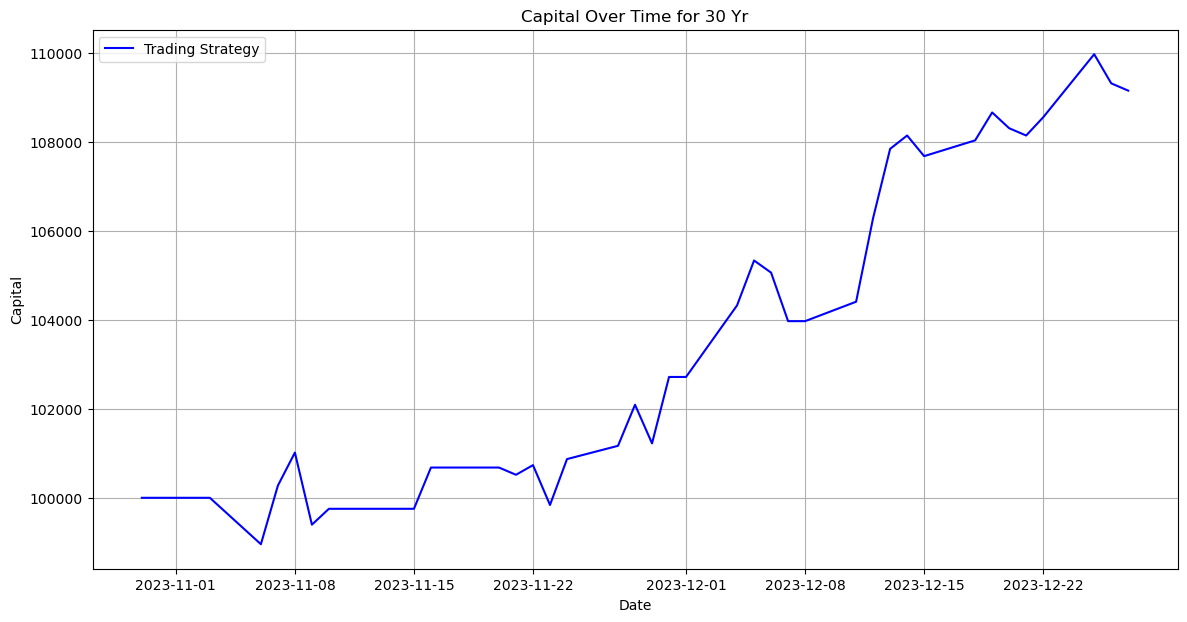

In [26]:
predicted_rates_series = pd.Series(predicted_rates, index=dates)
futures_prices_series = pd.Series(futures_prices, index=dates)

rate_changes = predicted_rates_series.diff()

initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series = pd.Series(index=dates, dtype=float)

buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

for date, change in rate_changes.items():
    price = futures_prices_series.loc[date]
    capital_series.loc[date] = capital + shares_owned * price  

    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)
    
    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)

capital_series.iloc[-1] = capital + shares_owned * futures_prices_series.iloc[-1]

initial_shares = initial_capital // futures_prices_series[0]
bh_capital = futures_prices_series * initial_shares
bh_capital.iloc[0] = initial_capital  

plt.figure(figsize=(14, 7))
plt.plot(capital_series.index, capital_series, label='Trading Strategy', color='blue')
#plt.plot(bh_capital.index, bh_capital, label='Buy and Hold Strategy', color='red')
plt.title('Capital Over Time for 30 Yr')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
daily_returns = capital_series.pct_change().dropna()

mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()

annualized_return = mean_daily_returns * 252
annualized_std = std_daily_returns * np.sqrt(252)

risk_free_rate = mean_30yr/100
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std

cumulative_returns = (1 + daily_returns).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()

print("Performance of 30 Yr's trading strategy:")
print(f"Mean Daily Return: {(mean_daily_returns * 100):.4f}%")
print(f"Annualized Return: {(annualized_return * 100):.4f}%")
print(f"Annualized Volatility: {(annualized_std * 100):.4f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {(max_drawdown * 100):.4f}%")

Performance of 30 Yr's trading strategy:
Mean Daily Return: 0.2116%
Annualized Return: 53.3354%
Annualized Volatility: 12.1509%
Sharpe Ratio: 4.0242
Maximum Drawdown: -1.6043%


**As we can see, the strategy works for both 5 Yr and 30 Yr, and they all yield positive returns over the observed period. Thus, our strategy is effective to a certain extent.**

# **Part II**

# **Random Forest and Support Vector Regression**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
file_path = './yield_curve_daily_20010731_20231229.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to check
print(data.head())

# Drop rows with missing values
data_cleaned = data.dropna().copy()

# Convert the 'Date' column to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

train_val_cutoff = pd.Timestamp('2023-10-30')  # Last day in train/val set
test_start_date = pd.Timestamp('2023-10-31')  # First day in test set

train_val_data = data_cleaned[data_cleaned['Date'] <= train_val_cutoff]
test_data = data_cleaned[data_cleaned['Date'] >= test_start_date]

train_end_index = int(len(train_val_data) * 0.8)  # 80% for training
train_data = train_val_data.iloc[:train_end_index]
val_data = train_val_data.iloc[train_end_index:]

for column in data_cleaned.columns.drop('Date'):
    print(f"Modeling for {column}")

    # Assuming all other columns are features except 'Date'
    X = data_cleaned.drop(columns=['Date', column])
    y = data_cleaned[column]

    X_train = train_data.drop(columns=['Date', column])
    y_train = train_data[column]
    X_val = val_data.drop(columns=['Date', column])
    y_val = val_data[column]
    X_test = test_data.drop(columns=['Date', column])
    y_test = test_data[column]
    
    # Standardization of features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Dimensionality reduction using PCA
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print('Training set shape:', X_train_pca.shape)
    print('Validation set shape:', X_val_pca.shape)
    print('Test set shape:', X_test_pca.shape)



        Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
0 2023-12-29  5.60  5.40  5.26  4.79  4.23  4.01  3.84  3.88   3.88   4.20   
1 2023-12-28  5.57  5.45  5.28  4.82  4.26  4.02  3.83  3.84   3.84   4.14   
2 2023-12-27  5.55  5.44  5.26  4.79  4.20  3.97  3.78  3.81   3.79   4.10   
3 2023-12-26  5.53  5.45  5.28  4.83  4.26  4.05  3.89  3.91   3.89   4.20   
4 2023-12-22  5.54  5.44  5.31  4.82  4.31  4.04  3.87  3.92   3.90   4.21   

   30 Yr  
0   4.03  
1   3.98  
2   3.95  
3   4.04  
4   4.05  
Modeling for 1 Mo
Training set shape: (4449, 2)
Validation set shape: (1113, 2)
Test set shape: (42, 2)
Modeling for 3 Mo
Training set shape: (4449, 2)
Validation set shape: (1113, 2)
Test set shape: (42, 2)
Modeling for 6 Mo
Training set shape: (4449, 2)
Validation set shape: (1113, 2)
Test set shape: (42, 2)
Modeling for 1 Yr
Training set shape: (4449, 2)
Validation set shape: (1113, 2)
Test set shape: (42, 2)
Modeling for 2 Yr
Training set shape: (4449, 2)
V

In [3]:
# Missing Value

data_cleaned = data.dropna().copy()
print(data_cleaned.isnull().sum())

Date     0
1 Mo     0
3 Mo     0
6 Mo     0
1 Yr     0
2 Yr     0
3 Yr     0
5 Yr     0
7 Yr     0
10 Yr    0
20 Yr    0
30 Yr    0
dtype: int64


4. Machine Learning Models: Random Forest:
 Predictions are made by training multiple decision trees, each based on a random subset
 of the data and randomly selected features, and then aggregating the results of these
 trees to form a final prediction. SVR: It is a regression method based on support vector
 machines for predicting continuous values. The goal of SVR is to find a function that is
 as close as possible to the target value in the training set within a given error tolerance,
 while keeping the complexity of the model as low as possible to improve generalization.



### Random Forest

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


Modeling for 1 Mo
Random Forest MSE for 1 Mo: 0.5844756389308174, MAE: 0.6564354896675652, RMSE: 0.7645100646367041, R^2: 0.24598341008078262
SVR MSE for 1 Mo: 0.17440047722650445, MAE: 0.3511807776429267, RMSE: 0.4176128317311436, R^2: 0.7750105490124998


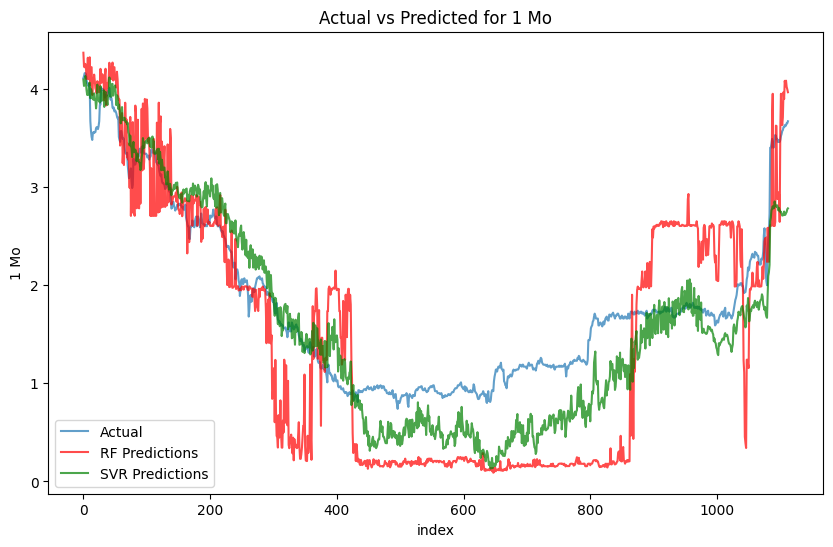

Modeling for 3 Mo
Random Forest MSE for 3 Mo: 0.7265058495867028, MAE: 0.7238414195867025, RMSE: 0.8523531249351426, R^2: 0.16040281851331661
SVR MSE for 3 Mo: 0.11788162000582826, MAE: 0.2834215676379899, RMSE: 0.34333892876548133, R^2: 0.8637683702584338


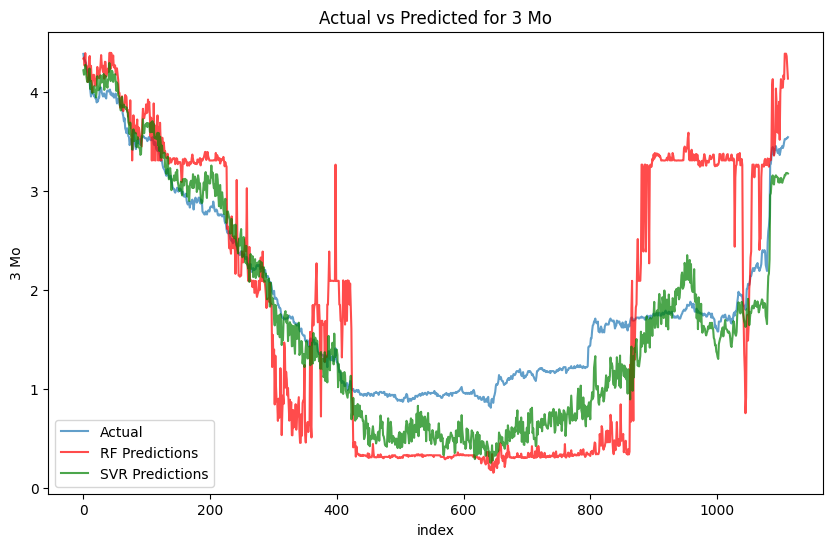

Modeling for 6 Mo
Random Forest MSE for 6 Mo: 0.877932769119495, MAE: 0.7376802336028744, RMSE: 0.9369806663530977, R^2: 0.11488104332330618
SVR MSE for 6 Mo: 0.0562237279761515, MAE: 0.19662079918152361, RMSE: 0.2371154317545602, R^2: 0.9433160610958445


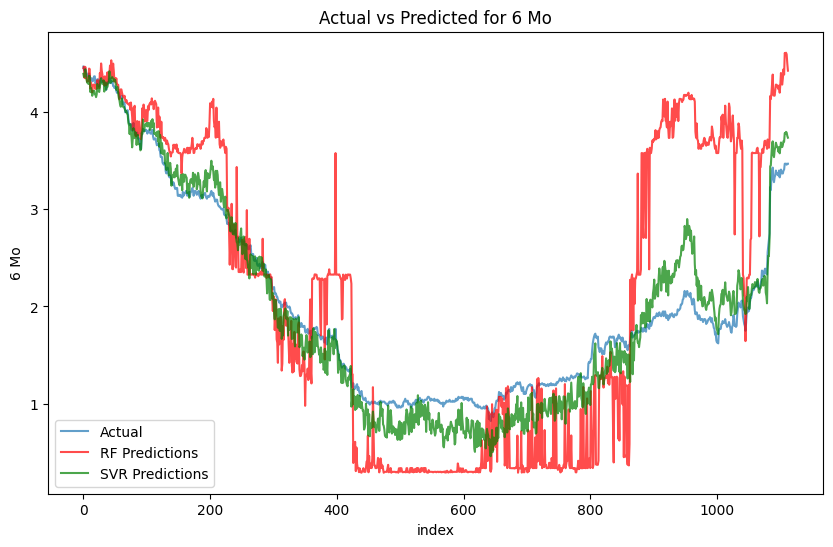

Modeling for 1 Yr
Random Forest MSE for 1 Yr: 0.5129457760107826, MAE: 0.5656805031446547, RMSE: 0.7162023289621324, R^2: 0.43973072034796123
SVR MSE for 1 Yr: 0.0643706306232395, MAE: 0.161194624374234, RMSE: 0.2537136784314939, R^2: 0.9296906446320522


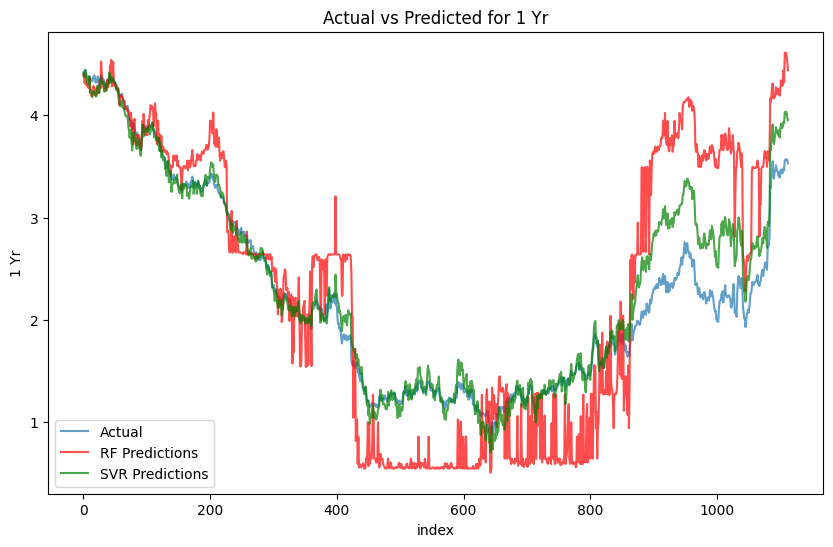

Modeling for 2 Yr
Random Forest MSE for 2 Yr: 0.15119457819406995, MAE: 0.35715983827493253, RMSE: 0.38883747015182313, R^2: 0.8134716873113972
SVR MSE for 2 Yr: 0.259230656844905, MAE: 0.4542028239626325, RMSE: 0.5091469894292855, R^2: 0.680187890359584


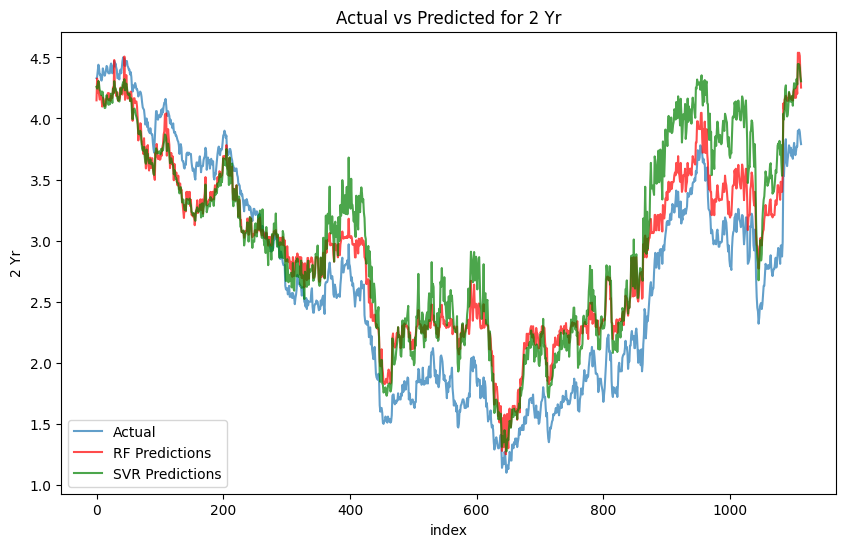

Modeling for 3 Yr
Random Forest MSE for 3 Yr: 0.09757504814016196, MAE: 0.283465049415993, RMSE: 0.31237005000505724, R^2: 0.8473201006229417
SVR MSE for 3 Yr: 0.23436426667582774, MAE: 0.4360416709764152, RMSE: 0.4841118328194713, R^2: 0.6332800922399417


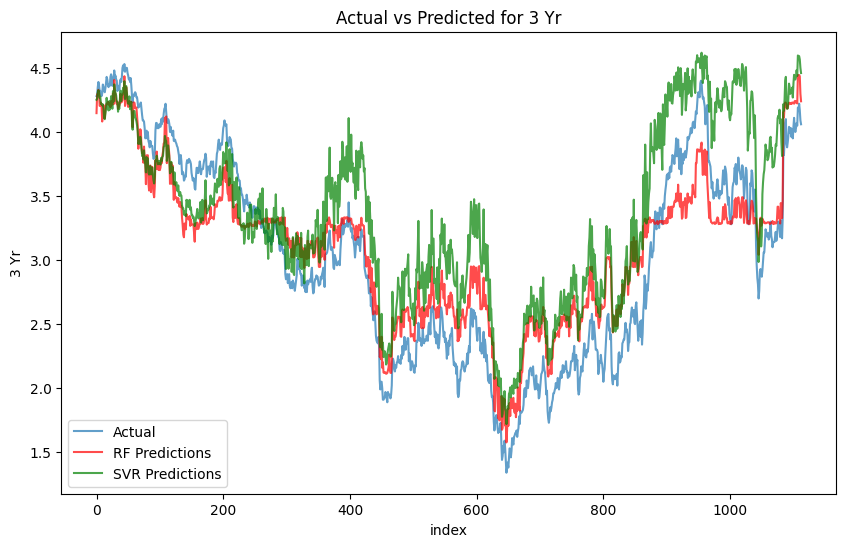

Modeling for 5 Yr
Random Forest MSE for 5 Yr: 0.11129039858939806, MAE: 0.2404840071877808, RMSE: 0.33360215615220185, R^2: 0.7044923019973621
SVR MSE for 5 Yr: 0.10673875290258457, MAE: 0.26558594019116355, RMSE: 0.3267089727916645, R^2: 0.7165782173690591


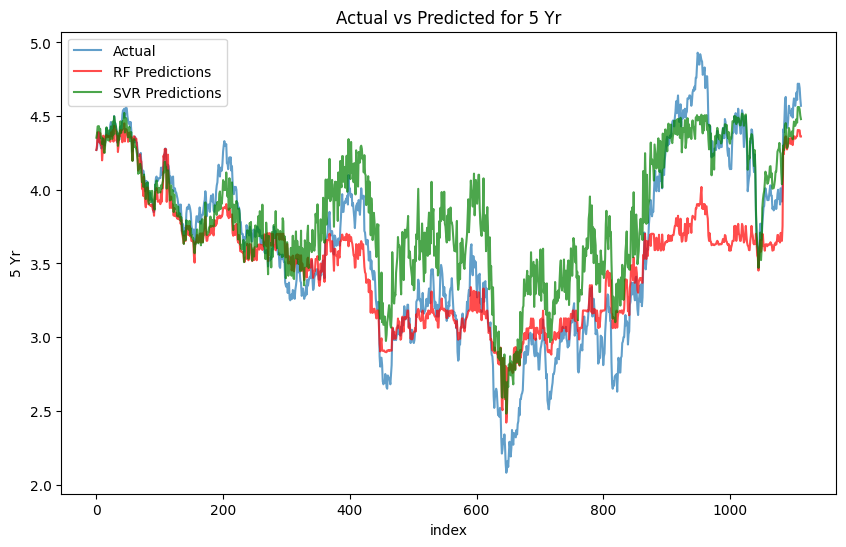

Modeling for 7 Yr
Random Forest MSE for 7 Yr: 0.18544678897574268, MAE: 0.30859110512129506, RMSE: 0.4306353317782259, R^2: 0.3028720070005083
SVR MSE for 7 Yr: 0.07603160510310238, MAE: 0.22234823815112387, RMSE: 0.27573829096283015, R^2: 0.7141834562744098


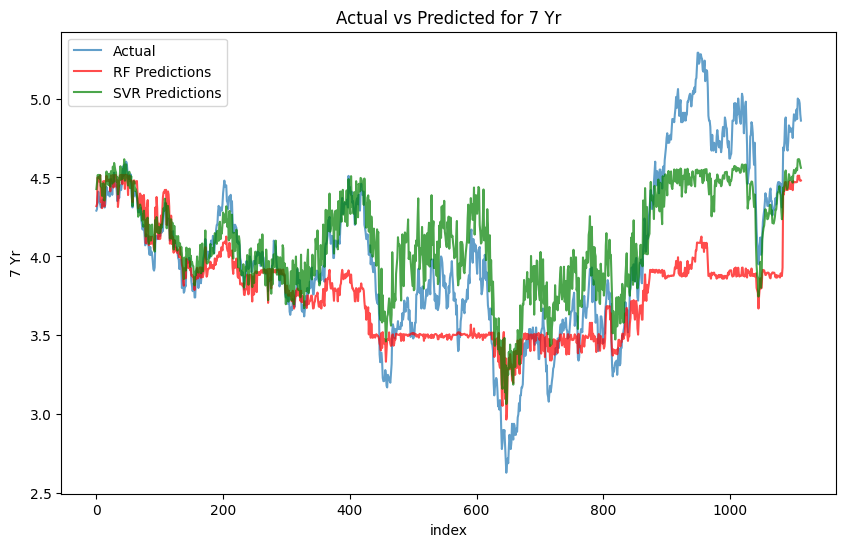

Modeling for 10 Yr
Random Forest MSE for 10 Yr: 0.16457442898472535, MAE: 0.3070848158131172, RMSE: 0.40567774031209225, R^2: 0.10757384163838613
SVR MSE for 10 Yr: 0.11531788328960221, MAE: 0.2533098769383051, RMSE: 0.33958486905279245, R^2: 0.3746738408304957


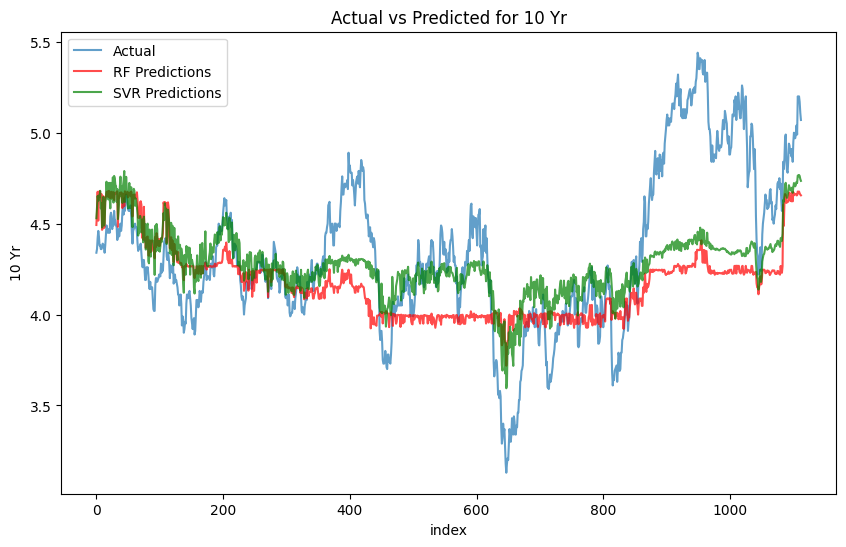

Modeling for 20 Yr
Random Forest MSE for 20 Yr: 0.2561262110332436, MAE: 0.42217376460018, RMSE: 0.5060891334866257, R^2: -0.4902724001048695
SVR MSE for 20 Yr: 0.18786642082288008, MAE: 0.34816540927255024, RMSE: 0.4334356017021215, R^2: -0.09310226676677846


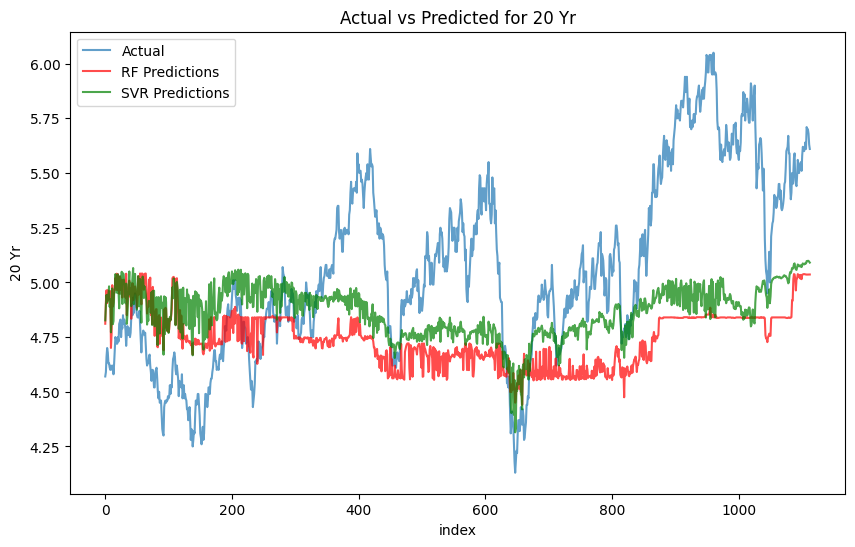

Modeling for 30 Yr
Random Forest MSE for 30 Yr: 0.48612086996406156, MAE: 0.6322716082659482, RMSE: 0.6972236871794171, R^2: -7.76195670059724
SVR MSE for 30 Yr: 0.3753246663325111, MAE: 0.5292154898376272, RMSE: 0.6126374672940851, R^2: -5.764939911579378


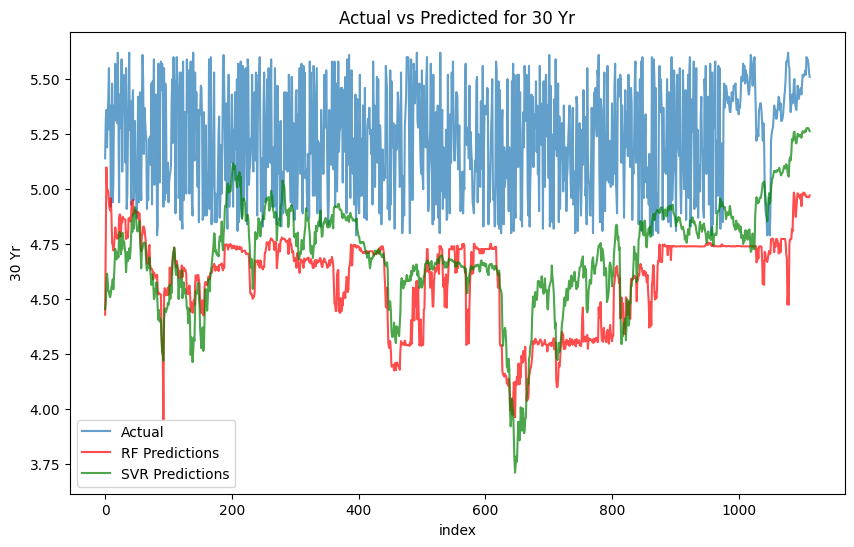

In [5]:

for column in data_cleaned.columns.drop('Date'):
    print(f"Modeling for {column}")

    # Assuming all other columns are features except 'Date'
    X = data_cleaned.drop(columns=['Date', column])
    y = data_cleaned[column]

    X_train = train_data.drop(columns=['Date', column])
    y_train = train_data[column]
    X_val = val_data.drop(columns=['Date', column])
    y_val = val_data[column]
    X_test = test_data.drop(columns=['Date', column])
    y_test = test_data[column]

    # Standardization of features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Dimensionality reduction using PCA
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)

    # Random Forest
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_regressor.fit(X_train_pca, y_train)
    rf_predictions = rf_regressor.predict(X_val_pca)
    rf_mse = mean_squared_error(y_val, rf_predictions)
    rf_mae = mean_absolute_error(y_val, rf_predictions)
    rf_rmse = np.sqrt(rf_mse)
    rf_r2 = r2_score(y_val, rf_predictions)
    print(f"Random Forest MSE for {column}: {rf_mse}, MAE: {rf_mae}, RMSE: {rf_rmse}, R^2: {rf_r2}")

    # SVR
    svr_regressor = SVR(kernel='rbf')
    svr_regressor.fit(X_train_pca, y_train)
    svr_predictions = svr_regressor.predict(X_val_pca)
    svr_mse = mean_squared_error(y_val, svr_predictions)
    svr_mae = mean_absolute_error(y_val, svr_predictions)
    svr_rmse = np.sqrt(svr_mse)
    svr_r2 = r2_score(y_val, svr_predictions)
    print(f"SVR MSE for {column}: {svr_mse}, MAE: {svr_mae}, RMSE: {svr_rmse}, R^2: {svr_r2}")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_val.reset_index(drop=True), label='Actual', alpha=0.7)
    plt.plot(rf_predictions, 'r', label='RF Predictions', alpha=0.7)
    plt.plot(svr_predictions, 'g', label='SVR Predictions', alpha=0.7)
    plt.title(f'Actual vs Predicted for {column}')
    plt.xlabel('index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

In [6]:
# Prepare result storage
results = []

# Prepare a list to store results dataframes
all_results = []

for column in data_cleaned.columns.drop('Date'):
    X = data_cleaned.drop(columns=['Date', column])
    y = data_cleaned[column]
    
    X_train = train_data.drop(columns=['Date', column])
    y_train = train_data[column]
    X_val = val_data.drop(columns=['Date', column])
    y_val = val_data[column]
    X_test = test_data.drop(columns=['Date', column])
    y_test = test_data[column]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf')
    }
    
    # Evaluate each model
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        y_val_pred = model.predict(X_val_pca)
        mse = mean_squared_error(y_val, y_val_pred)
        mae = mean_absolute_error(y_val, y_val_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_val_pred)
        
        # Store validation results
        validation_results = pd.DataFrame({
            'Term': [column],
            'Model': [name],
            'MSE': [mse],
            'MAE': [mae],
            'RMSE': [rmse],
            'R2': [r2],
            'Set': ['Validation']
        })
        all_results.append(validation_results)
        
        # Final evaluation on the test set
        y_test_pred = model.predict(X_test_pca)
        mse_test = mean_squared_error(y_test, y_test_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Store test results
        test_results = pd.DataFrame({
            'Term': [column],
            'Model': [name],
            'MSE': [mse_test],
            'MAE': [mae_test],
            'RMSE': [rmse_test],
            'R2': [r2_test],
            'Set': ['Test']
        })
        all_results.append(test_results)

# Concatenate all result DataFrames into a single DataFrame
final_results = pd.concat(all_results, ignore_index=True)
print(final_results)

     Term          Model       MSE       MAE      RMSE           R2  \
0    1 Mo  Random Forest  0.584476  0.656435  0.764510     0.245983   
1    1 Mo  Random Forest  0.420612  0.392260  0.648546 -1402.101966   
2    1 Mo            SVR  0.174400  0.351181  0.417613     0.775011   
3    1 Mo            SVR  0.245373  0.409322  0.495351  -817.528830   
4    3 Mo  Random Forest  0.726506  0.723841  0.852353     0.160403   
5    3 Mo  Random Forest  0.114361  0.235007  0.338173   -44.739295   
6    3 Mo            SVR  0.117882  0.283422  0.343339     0.863768   
7    3 Mo            SVR  0.070103  0.245096  0.264769   -27.037960   
8    6 Mo  Random Forest  0.877933  0.737680  0.936981     0.114881   
9    6 Mo  Random Forest  0.020641  0.131040  0.143671    -3.403916   
10   6 Mo            SVR  0.056224  0.196621  0.237115     0.943316   
11   6 Mo            SVR  0.010325  0.094082  0.101610    -1.202792   
12   1 Yr  Random Forest  0.512946  0.565681  0.716202     0.439731   
13   1

C:\Users\XINYU_DENG\AppData\Local\Temp\ipykernel_38584\472432928.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


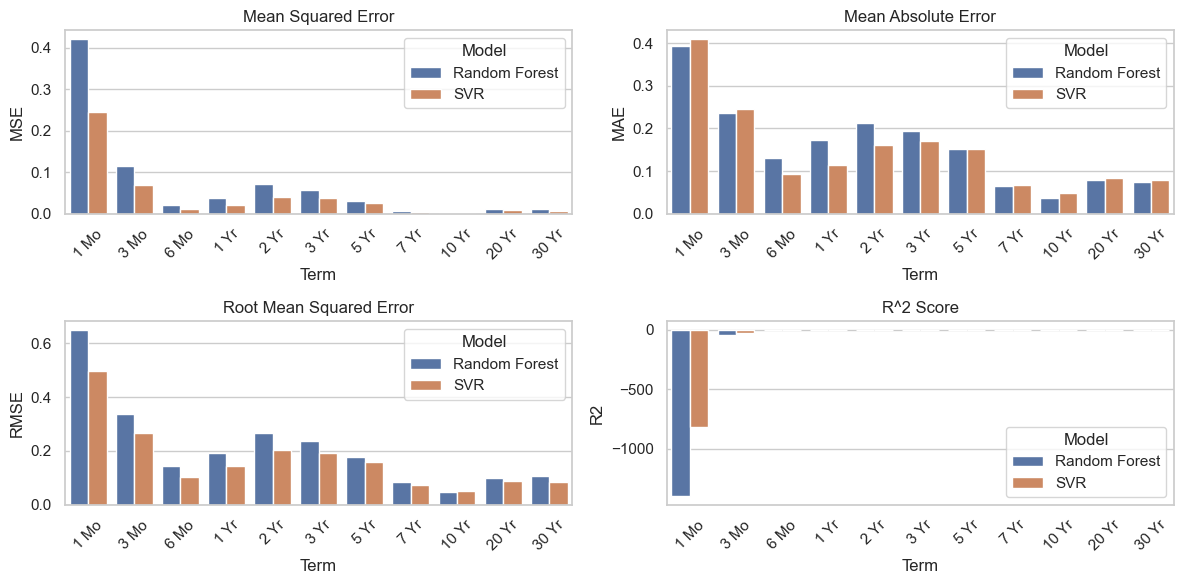

In [97]:
# plot the results
import seaborn as sns

# Set the style
sns.set(style='whitegrid')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the results
sns.barplot(x='Term', y='MSE', hue='Model', data=final_results[final_results['Set'] == 'Test'])

# MSE
plt.subplot(2, 2, 1)
sns.barplot(x='Term', y='MSE', hue='Model', data=final_results[final_results['Set'] == 'Test'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# MAE
plt.subplot(2, 2, 2)
sns.barplot(x='Term', y='MAE', hue='Model', data=final_results[final_results['Set'] == 'Test'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# RMSE
plt.subplot(2, 2, 3)
sns.barplot(x='Term', y='RMSE', hue='Model', data=final_results[final_results['Set'] == 'Test'])
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# R2
plt.subplot(2, 2, 4)
sns.barplot(x='Term', y='R2', hue='Model', data=final_results[final_results['Set'] == 'Test'])
plt.title('R^2 Score')
plt.ylabel('R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Tune Parameters

In [7]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm  

In [8]:
# Define function for tuning and evaluation
def tune_and_evaluate_rf(yield_period, data):
    X = data.drop(columns=['Date', yield_period])
    y = data[yield_period]
    
    train_val_cutoff = pd.Timestamp('2023-10-30')
    train_data = data[data['Date'] <= train_val_cutoff]
    test_data = data[data['Date'] > train_val_cutoff]
    train_end_index = int(len(train_data) * 0.8)
    
    X_train = train_data.iloc[:train_end_index].drop(columns=['Date', yield_period])
    y_train = train_data.iloc[:train_end_index][yield_period]
    X_val = train_data.iloc[train_end_index:].drop(columns=['Date', yield_period])
    y_val = train_data.iloc[train_end_index:][yield_period]
    X_test = test_data.drop(columns=['Date', yield_period])
    y_test = test_data[yield_period]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [10, 50, 100, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', error_score='raise')
    grid_search.fit(X_train_pca, y_train)

    best_params = grid_search.best_params_
    best_rf_model = grid_search.best_estimator_
    
    y_val_pred = best_rf_model.predict(X_val_pca)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    y_test_pred = best_rf_model.predict(X_test_pca)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    residuals = y_test - y_test_pred

    # Print statistical summary of residuals
    print("Residuals Summary:")
    print(residuals.describe())

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o')
    plt.plot(y_test_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Yield Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, marker='o', linestyle='None', label='Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals of Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Scatter plot of predictions vs residuals (to check for homoscedasticity)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    sm.qqplot(residuals, line ='s')
    plt.title('Q-Q Plot of Model Residuals')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

    return {
        'Term': yield_period,
        'MSE_val': mse_val,
        'MAE_val': mae_val,
        'R2_val': r2_val,
        'MSE_test': mse_test,
        'MAE_test': mae_test,
        'R2_test': r2_test,
        'Best Parameters': best_params
    }




In [9]:
def tune_and_evaluate_svr(yield_period, data):
    X = data.drop(columns=['Date', yield_period])
    y = data[yield_period]
    
    train_val_cutoff = pd.Timestamp('2023-10-30')
    train_data = data[data['Date'] <= train_val_cutoff]
    test_data = data[data['Date'] > train_val_cutoff]
    train_end_index = int(len(train_data) * 0.8)
    
    X_train = train_data.iloc[:train_end_index].drop(columns=['Date', yield_period])
    y_train = train_data.iloc[:train_end_index][yield_period]
    X_val = train_data.iloc[train_end_index:].drop(columns=['Date', yield_period])
    y_val = train_data.iloc[train_end_index:][yield_period]
    X_test = test_data.drop(columns=['Date', yield_period])
    y_test = test_data[yield_period]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf']
    }

    svr = SVR()
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', error_score='raise')
    grid_search.fit(X_train_pca, y_train)

    best_params = grid_search.best_params_
    best_svr_model = grid_search.best_estimator_
    
    y_val_pred = best_svr_model.predict(X_val_pca)
    mse_val = mean_squared_error(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    y_test_pred = best_svr_model.predict(X_test_pca)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    residuals = y_test - y_test_pred

    # Print statistical summary of residuals
    print("Residuals Summary:")
    print(residuals.describe())

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.reset_index(drop=True), label='Actual', marker='o')
    plt.plot(y_test_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Yield Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, marker='o', linestyle='None', label='Residuals')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals of Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Scatter plot of predictions vs residuals (to check for homoscedasticity)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    sm.qqplot(residuals, line ='s')
    plt.title('Q-Q Plot of Model Residuals')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

    return {
        'Term': yield_period,
        'MSE_val': mse_val,
        'MAE_val': mae_val,
        'R2_val': r2_val,
        'MSE_test': mse_test,
        'MAE_test': mae_test,
        'R2_test': r2_test,
        'Best Parameters': best_params
    }


#### Result

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Residuals Summary:
count    42.000000
mean      0.389009
std       0.587825
min      -0.085000
25%      -0.018042
50%       0.003333
75%       0.860000
max       1.526667
Name: 1 Mo, dtype: float64


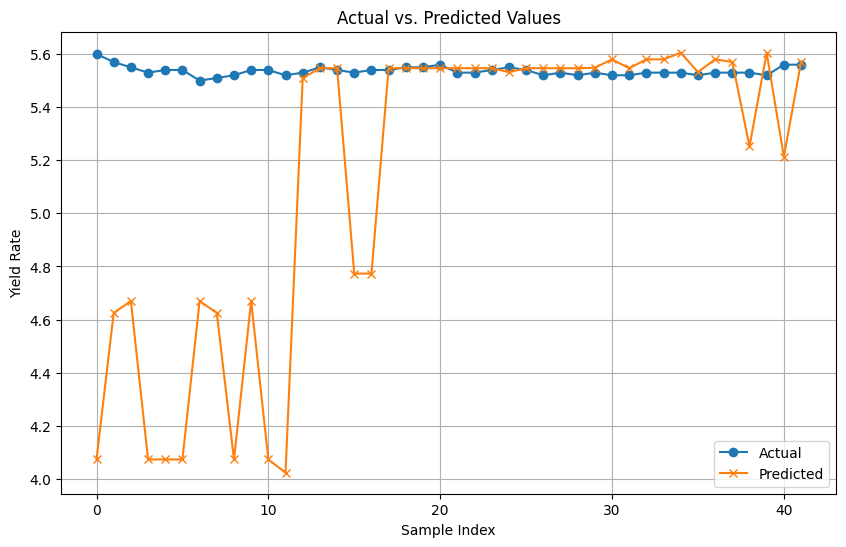

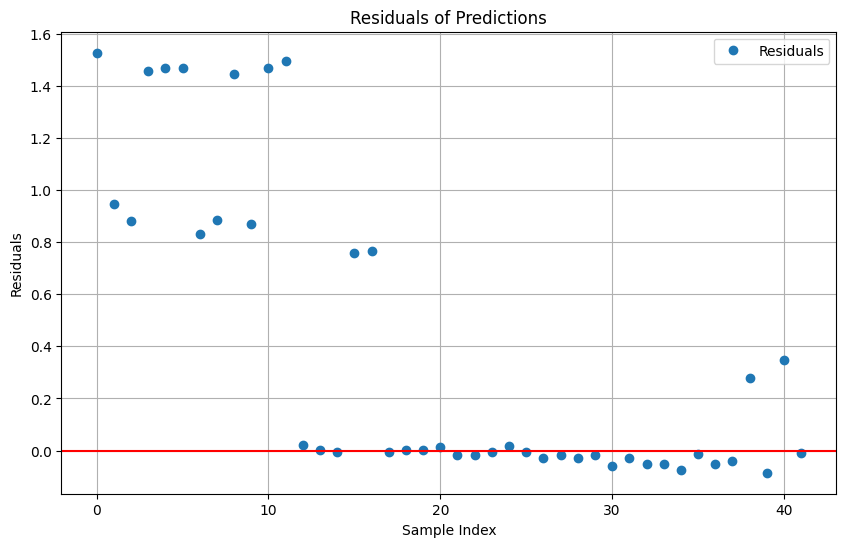

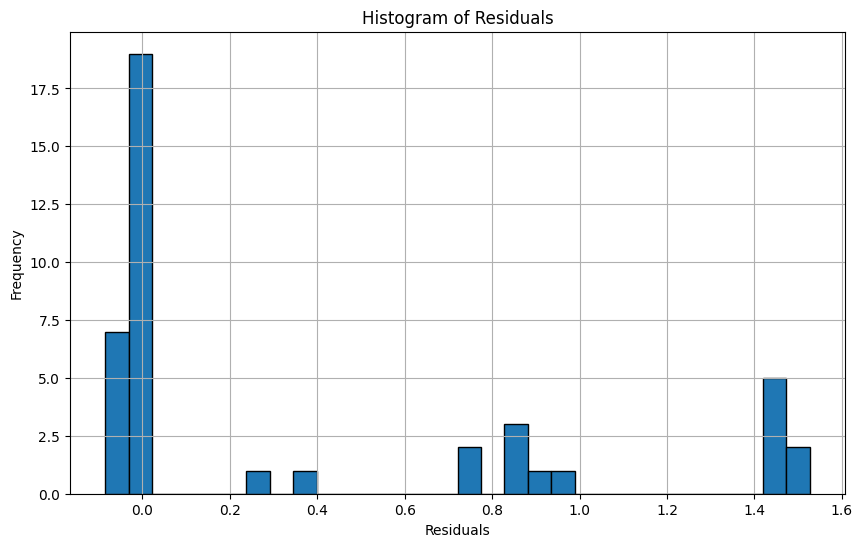

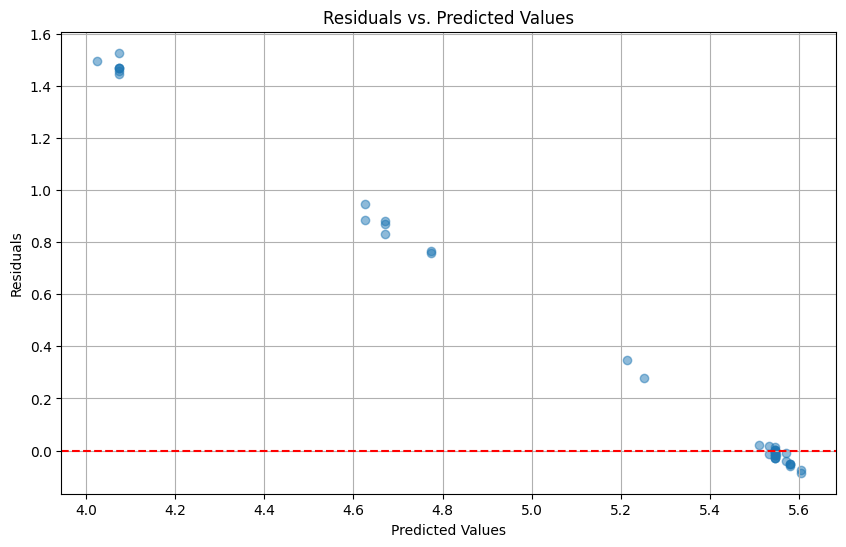

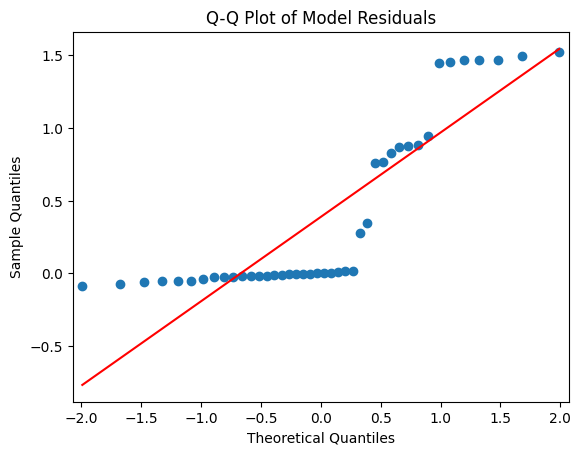

{'Term': '1 Mo', 'MSE_val': 0.6896845904809947, 'MAE_val': 0.711544017669961, 'R2_val': 0.11025611950977077, 'MSE_test': 0.4886390304778462, 'MAE_test': 0.4179216269841292, 'R2_test': -1629.0288384321523, 'Best Parameters': {'bootstrap': False, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}}


In [10]:
one_Mo_rf_results = tune_and_evaluate_rf('1 Mo', data_cleaned)
# one_Mo_svr_results = tune_and_evaluate_svr('1 Mo', data_cleaned)
print(one_Mo_rf_results)


In [26]:
results = tune_and_evaluate_rf('3 Mo', data_cleaned)
print(results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.010703551051663537, 'MAE': 0.056243941672197706, 'R2': 0.9963741802750125, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}}


In [27]:
results = tune_and_evaluate_rf('6 Mo', data_cleaned)
print(results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.0038675627961146006, 'MAE': 0.039483586083853994, 'R2': 0.9987233932648498, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}}


In [28]:
results = tune_and_evaluate_rf('1 Yr', data_cleaned)
print(results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.003923121516503095, 'MAE': 0.03719161462979467, 'R2': 0.9986216363598852, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}}


In [29]:
results = tune_and_evaluate_rf('3 Yr', data_cleaned)
print(results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.00821649028099911, 'MAE': 0.05230303300624455, 'R2': 0.9961056747810232, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}}


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Residuals Summary:
count    42.000000
mean     -0.139208
std       0.080356
min      -0.343750
25%      -0.196429
50%      -0.128115
75%      -0.085952
max       0.007778
Name: 5 Yr, dtype: float64


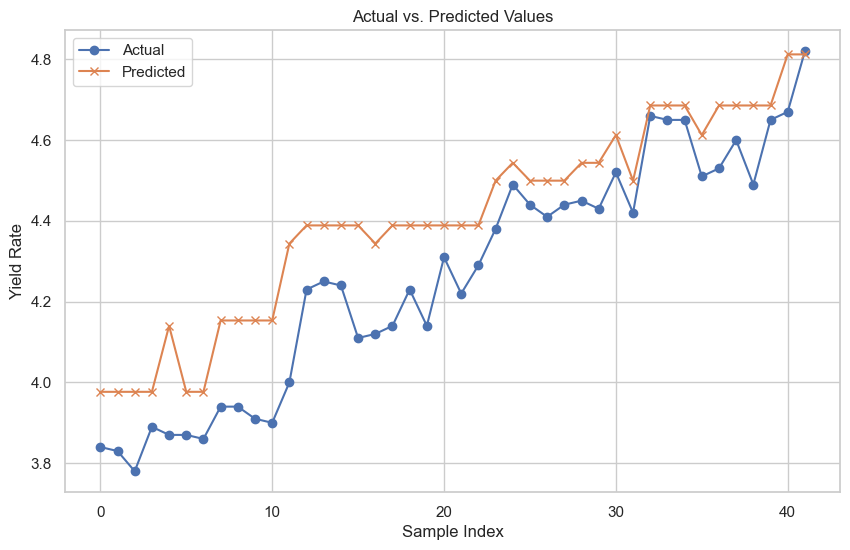

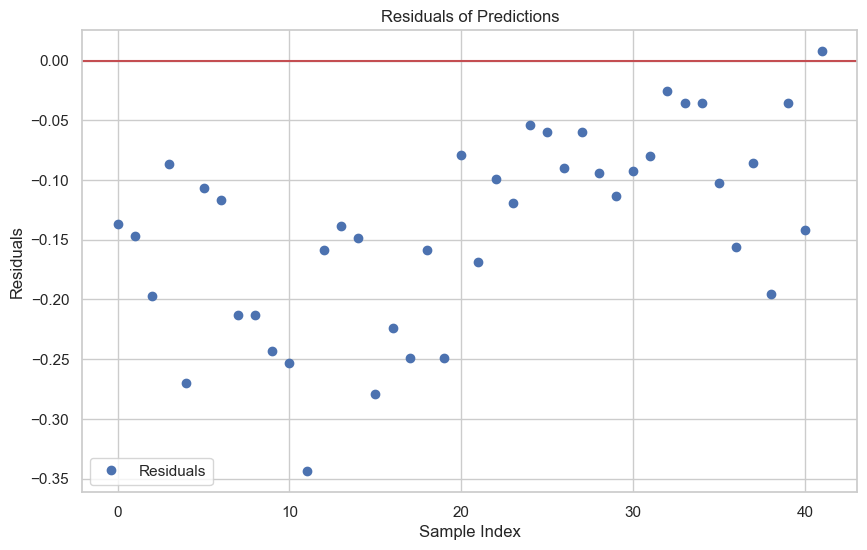

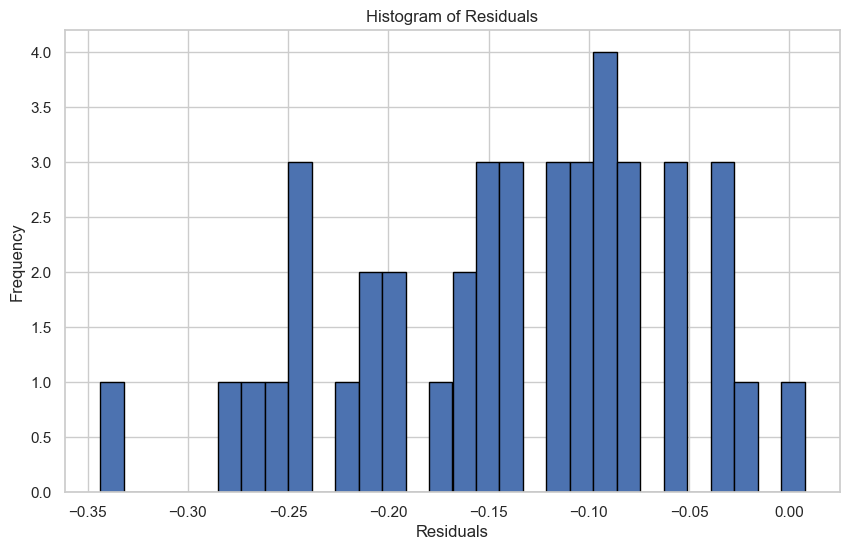

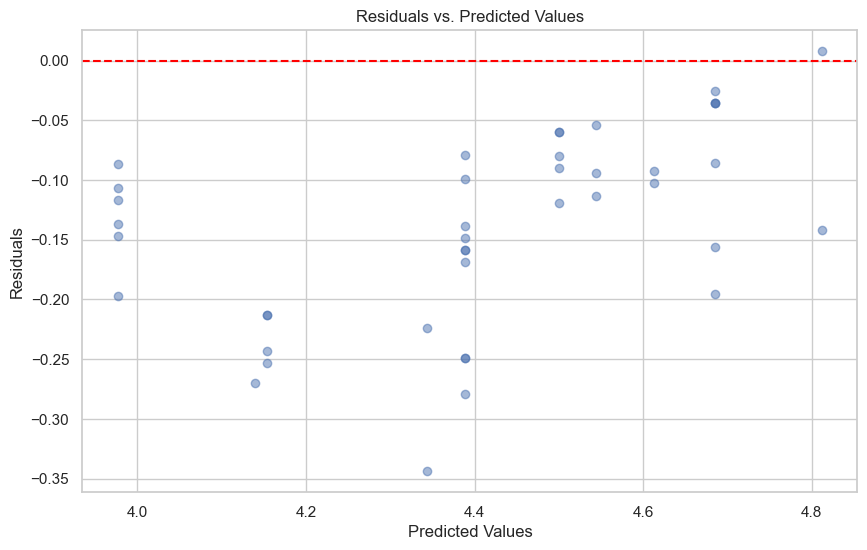

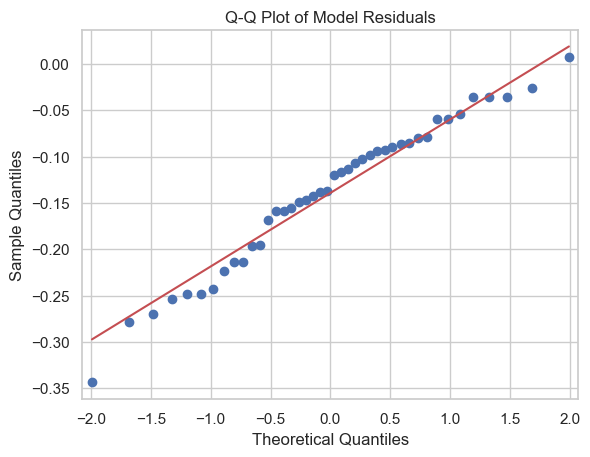

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Residuals Summary:
count    42.000000
mean     -0.239797
std       0.080387
min      -0.363830
25%      -0.319682
50%      -0.223523
75%      -0.177848
max      -0.093244
Name: 5 Yr, dtype: float64


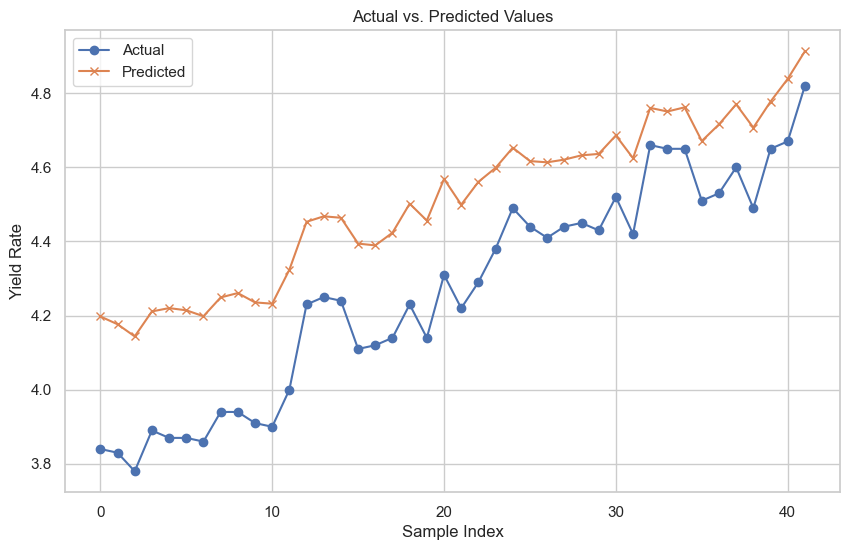

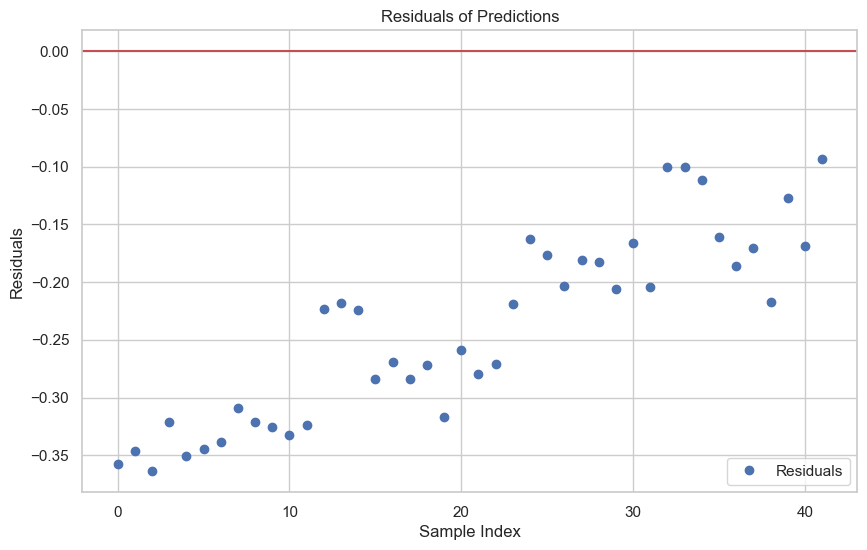

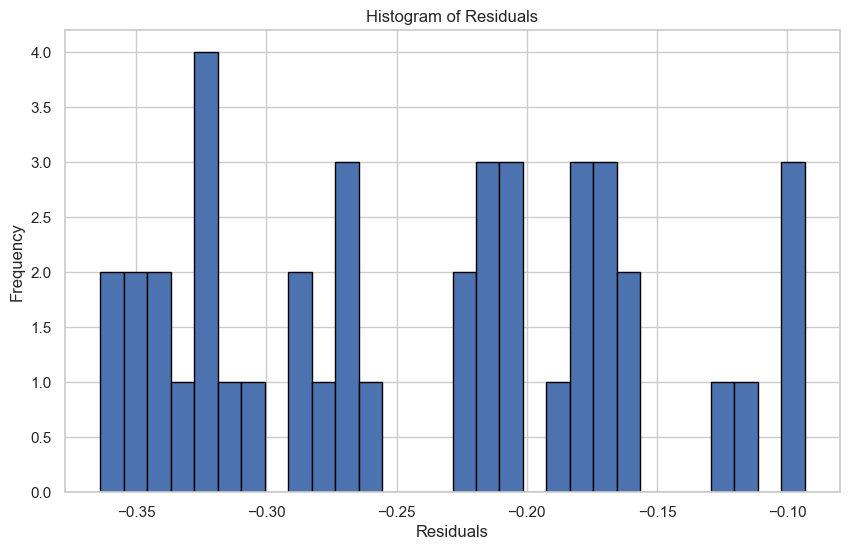

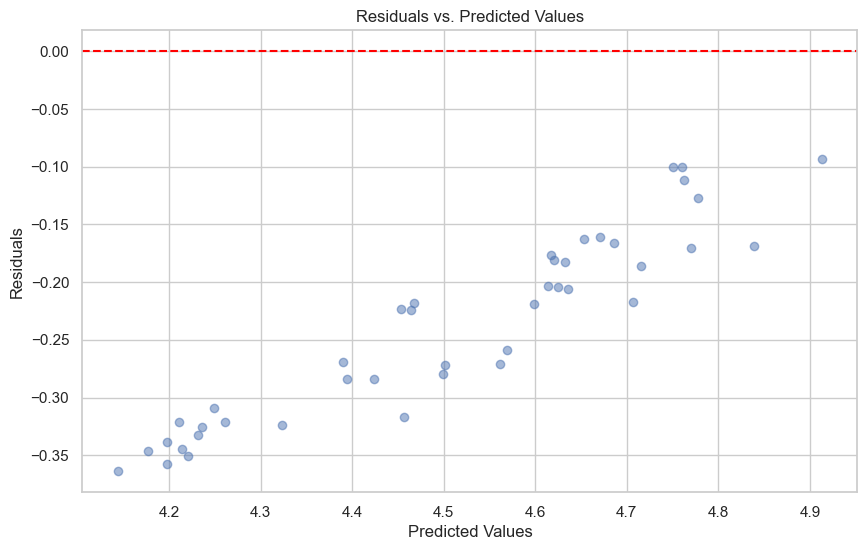

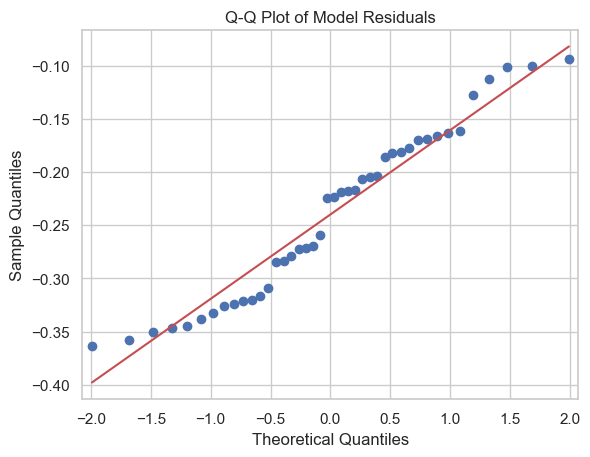

{'Term': '5 Yr', 'MSE_val': 0.10784184762669213, 'MAE_val': 0.23736723284701586, 'R2_val': 0.713649186772246, 'MSE_test': 0.025682024411684483, 'MAE_test': 0.13957787698413066, 'R2_test': 0.6926278386751508, 'Best Parameters': {'bootstrap': False, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}} {'Term': '5 Yr', 'MSE_val': 0.04564275457434057, 'MAE_val': 0.15978368626793818, 'R2_val': 0.8788054899100015, 'MSE_test': 0.06381078572288001, 'MAE_test': 0.23979680419351482, 'R2_test': 0.23628843236536734, 'Best Parameters': {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}}


In [107]:
five_yr_rf_results = tune_and_evaluate_rf('5 Yr', data_cleaned)
five_yr_svr_results = tune_and_evaluate_svr('5 Yr', data_cleaned)
print(five_yr_rf_results, five_yr_svr_results)

In [31]:
results = tune_and_evaluate_rf('7 Yr', data_cleaned)
print(results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.004428227442759456, 'MAE': 0.042040886113589214, 'R2': 0.9970406622143912, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}}


In [32]:
results = tune_and_evaluate_rf('10 Yr', data_cleaned)
print(results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.004120963850624457, 'MAE': 0.035327926514460734, 'R2': 0.9969918988716998, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}}


In [33]:
twenty_yr_results = tune_and_evaluate_rf('20 Yr', data_cleaned)
print(twenty_yr_results)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
{'MSE': 0.006366743482010164, 'MAE': 0.04914198632173672, 'R2': 0.9956038069971946, 'Best Parameters': {'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}}


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Residuals Summary:
count    42.000000
mean      0.067722
std       0.082311
min      -0.039392
25%       0.000296
50%       0.043239
75%       0.130449
max       0.278553
Name: 30 Yr, dtype: float64


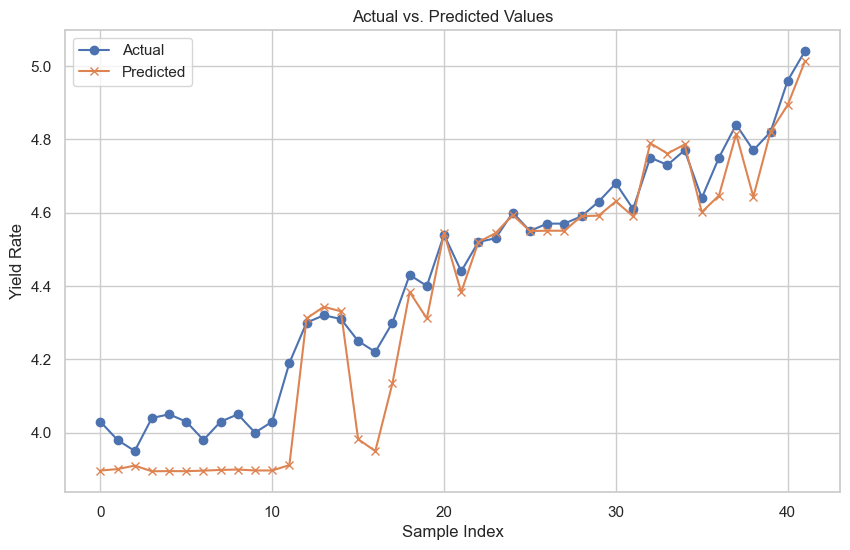

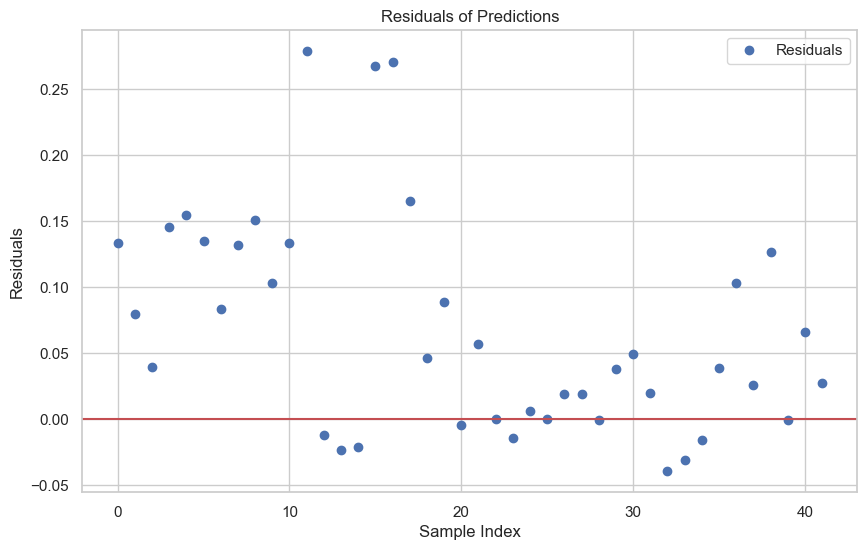

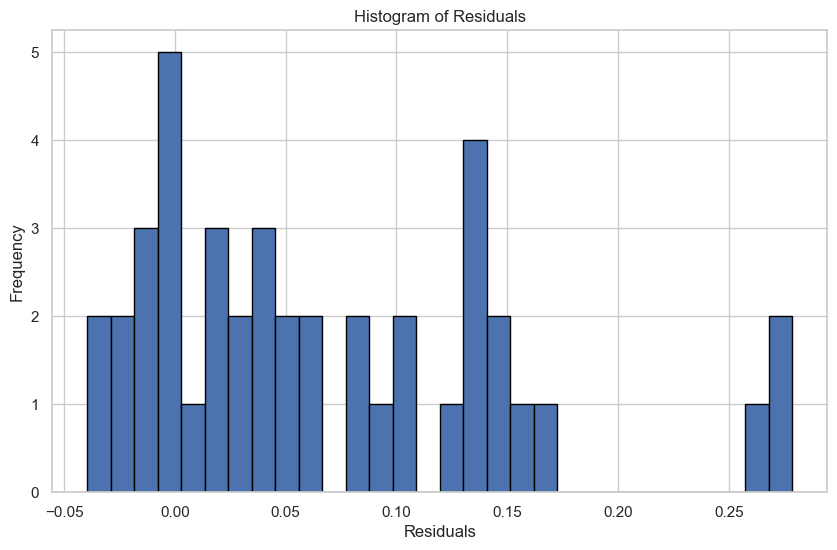

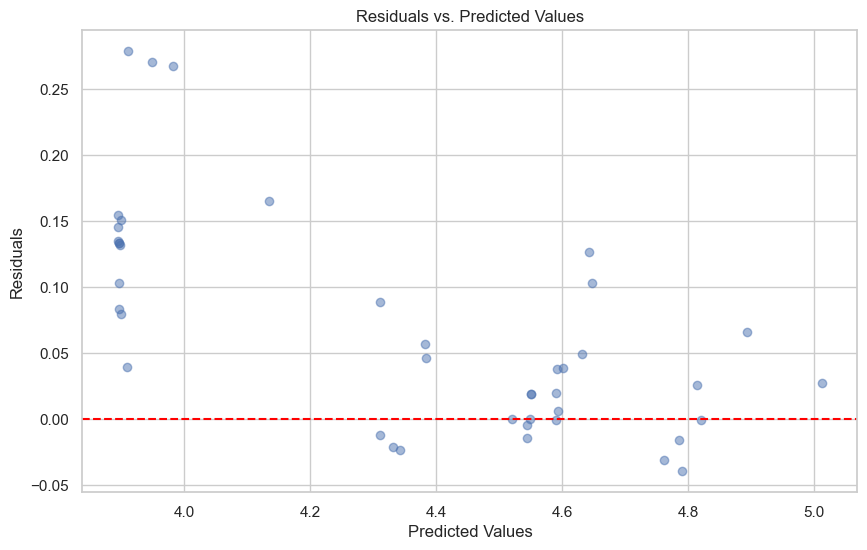

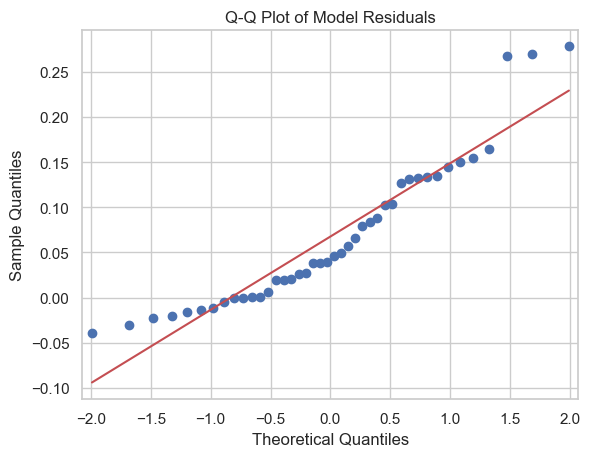

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Residuals Summary:
count    42.000000
mean      0.044717
std       0.034855
min      -0.026636
25%       0.020227
50%       0.043991
75%       0.068922
max       0.112289
Name: 30 Yr, dtype: float64


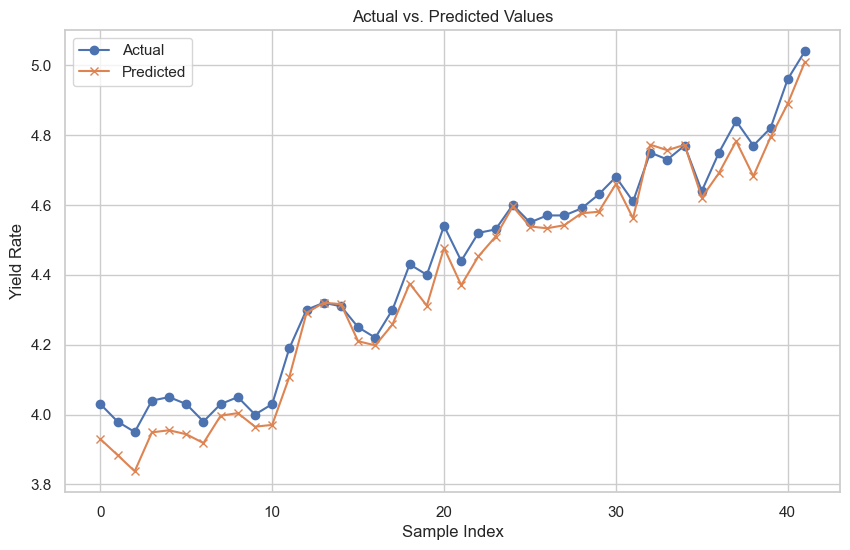

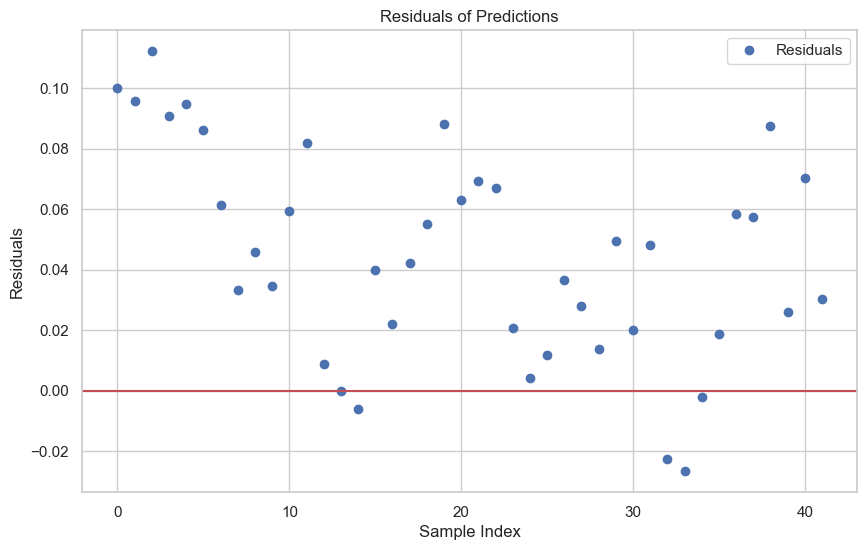

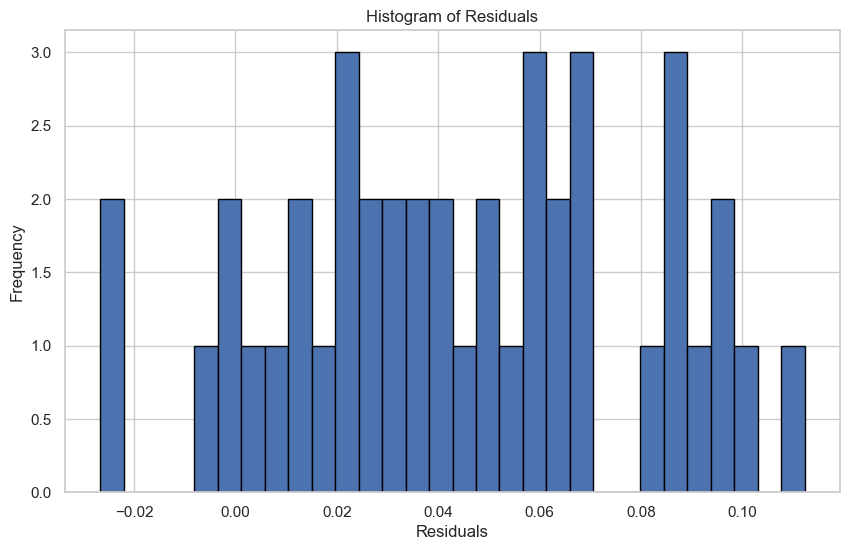

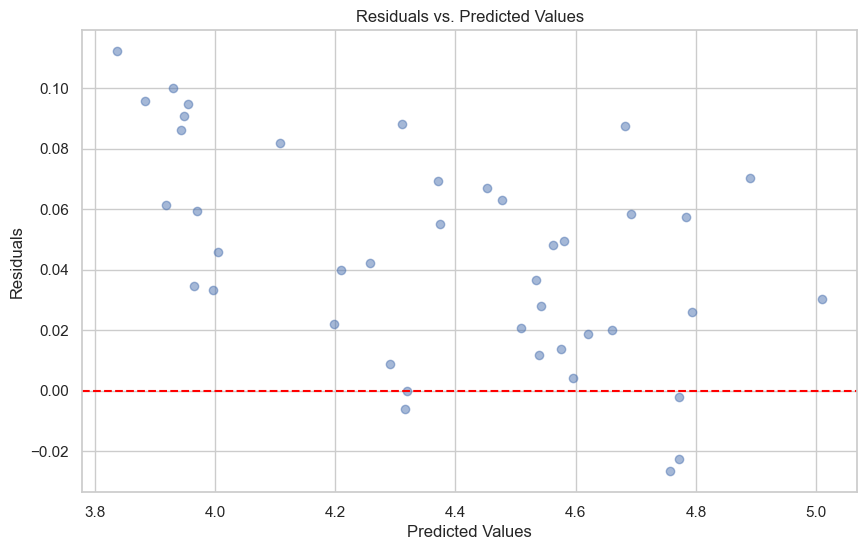

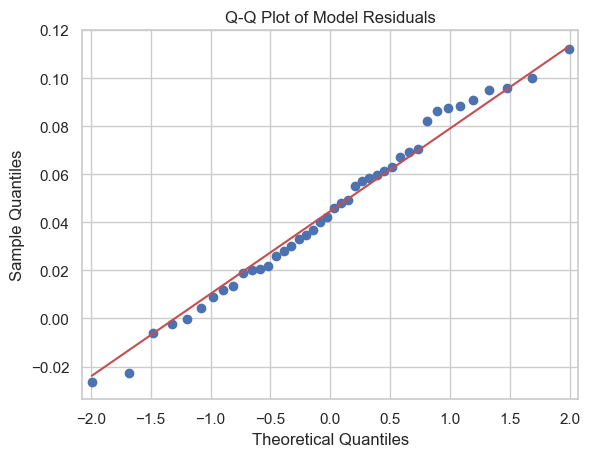

{'Term': '30 Yr', 'MSE_val': 0.49046779675747293, 'MAE_val': 0.6375434689004698, 'R2_val': -7.8403067297728075, 'MSE_test': 0.011200082991406245, 'MAE_test': 0.07540893890300156, 'R2_test': 0.8797341665778496, 'Best Parameters': {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}} {'Term': '30 Yr', 'MSE_val': 0.31561988966365523, 'MAE_val': 0.46376580326473205, 'R2_val': -4.688806998318489, 'MSE_test': 0.003185580655332506, 'MAE_test': 0.04746318553410219, 'R2_test': 0.9657934220004435, 'Best Parameters': {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}}


In [108]:
thirty_yr_rf_results = tune_and_evaluate_rf('30 Yr', data_cleaned)
thirty_yr_svr_results = tune_and_evaluate_svr('30 Yr', data_cleaned)
print(thirty_yr_rf_results, thirty_yr_svr_results)

# APPLY the same strategy

### 5 years 

#### Data Loading and format data

In [305]:
file_path = './yield_curve_daily_20010731_20231229.xlsx'
data = pd.read_excel(file_path)

print(data.head())

data_cleaned = data.dropna().copy()
print(data_cleaned.isnull().sum())

        Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
0 2023-12-29  5.60  5.40  5.26  4.79  4.23  4.01  3.84  3.88   3.88   4.20   
1 2023-12-28  5.57  5.45  5.28  4.82  4.26  4.02  3.83  3.84   3.84   4.14   
2 2023-12-27  5.55  5.44  5.26  4.79  4.20  3.97  3.78  3.81   3.79   4.10   
3 2023-12-26  5.53  5.45  5.28  4.83  4.26  4.05  3.89  3.91   3.89   4.20   
4 2023-12-22  5.54  5.44  5.31  4.82  4.31  4.04  3.87  3.92   3.90   4.21   

   30 Yr  
0   4.03  
1   3.98  
2   3.95  
3   4.04  
4   4.05  
Date     0
1 Mo     0
3 Mo     0
6 Mo     0
1 Yr     0
2 Yr     0
3 Yr     0
5 Yr     0
7 Yr     0
10 Yr    0
20 Yr    0
30 Yr    0
dtype: int64


Apply Best Params for RF Model 

In [327]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

train_cutoff = pd.Timestamp('2023/10/30')  
test_start_date = pd.Timestamp('2023/10/31')  

train_data = data_cleaned[data_cleaned['Date'] <= train_cutoff]
test_data = data_cleaned[data_cleaned['Date'] >= test_start_date]


yield_period = '5 Yr'
X_train = train_data.drop(columns=['Date', yield_period])
y_train = train_data[yield_period]
X_test = test_data.drop(columns=['Date', yield_period])
y_test = test_data[yield_period]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf_best_params = {'bootstrap': False, 'max_depth': 50, 'max_features': None,
                  'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
rf_model = RandomForestRegressor(**rf_best_params, random_state=42)

rf_model.fit(X_train_pca, y_train)

y_test_pred_rf = rf_model.predict(X_test_pca)

print(y_test_pred_rf)
len(y_test_pred_rf)

[4.166      3.79625    3.79625    4.166      4.28428571 4.166
 3.85571429 4.28428571 4.28428571 3.96       4.28428571 4.28428571
 4.3        4.45625    4.45625    4.3        4.3        4.39
 4.45625    4.45625    4.45625    4.45625    4.45625    4.45625
 4.60625    4.45625    4.45625    4.45625    4.45625    4.45625
 4.60625    4.45625    4.60625    4.60625    4.60625    4.60625
 4.60625    4.60625    4.60625    4.60625    4.79875    4.79875   ]


42

Apply Best Params for SVR Model 

In [338]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

train_cutoff = pd.Timestamp('2023/10/30')  
test_start_date = pd.Timestamp('2023/10/31')  

train_data = data_cleaned[data_cleaned['Date'] <= train_cutoff]
test_data = data_cleaned[data_cleaned['Date'] >= test_start_date]

yield_period = '5 Yr'
X_train = train_data.drop(columns=['Date', yield_period])
y_train = train_data[yield_period]
X_test = test_data.drop(columns=['Date', yield_period])
y_test = test_data[yield_period]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svr_best_params = {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
svr_model = SVR(**svr_best_params)

svr_model.fit(X_train_pca, y_train)

y_test_pred_svr = svr_model.predict(X_test_pca)

print(y_test_pred_svr)
len(y_test_pred_svr)


[4.14947085 4.12667207 4.0928979  4.16352684 4.17264555 4.16654862
 4.1494431  4.20250133 4.21421702 4.18796302 4.18487928 4.28102874
 4.41598576 4.43167091 4.42832577 4.35486806 4.3493165  4.38578117
 4.46815366 4.42094057 4.53932017 4.46572239 4.53016096 4.56994186
 4.62743466 4.58906479 4.58588172 4.59332594 4.60694436 4.61091152
 4.6640878  4.59810079 4.74269756 4.7324722  4.74420618 4.64647109
 4.69458915 4.75342803 4.68596015 4.76091202 4.82675247 4.90717773]


42

In [329]:
predicted_rates = np.array([
    4.166, 3.79625, 3.79625, 4.166, 4.28428571, 4.166,
    3.85571429, 4.28428571, 4.28428571, 3.96, 4.28428571, 4.28428571,
    4.3, 4.45625, 4.45625, 4.3, 4.3, 4.39,
    4.45625, 4.45625, 4.45625, 4.45625, 4.45625, 4.45625,
    4.60625, 4.45625, 4.45625, 4.45625, 4.45625, 4.45625,
    4.60625, 4.45625, 4.60625, 4.60625, 4.60625, 4.60625,
    4.60625, 4.60625, 4.60625, 4.60625, 4.79875, 4.79875
])

len(predicted_rates)

42

In [330]:
dates = pd.date_range('2023-10-31', periods=42, freq='B')
len(dates)


42

In [331]:
five_yr_data = pd.read_csv('./HistoricalData_1714422582854.csv')
five_yr_data['Date'] = pd.to_datetime(five_yr_data['Date'])
five_yr_data_reversed = five_yr_data.iloc[::-1].reset_index(drop=True)
futures_prices = five_yr_data_reversed['Close/Last'].values


if len(futures_prices) > len(dates):
    futures_prices = futures_prices[:len(dates)]  
else:
    futures_prices = np.pad(futures_prices, (0, len(dates) - len(futures_prices)), 'constant', constant_values=np.mean(futures_prices))

futures_prices_series = pd.Series(futures_prices, index=dates)
print(futures_prices_series)
len(futures_prices_series)

2023-10-31    104.5547
2023-11-01    104.4766
2023-11-02    104.9531
2023-11-03    105.1797
2023-11-06    105.7891
2023-11-07    105.2734
2023-11-08    105.5547
2023-11-09    105.5781
2023-11-10    105.1172
2023-11-13    104.9844
2023-11-14    105.0000
2023-11-15    106.0156
2023-11-16    105.5703
2023-11-17    105.9688
2023-11-20    105.8125
2023-11-21    105.8594
2023-11-22    105.9453
2023-11-23    105.8359
2023-11-24    105.5938
2023-11-27    105.9688
2023-11-28    106.4297
2023-11-29    107.2031
2023-11-30    106.8516
2023-12-01    107.4766
2023-12-04    107.1094
2023-12-05    107.5312
2023-12-06    107.5703
2023-12-07    107.6172
2023-12-08    106.9609
2023-12-11    106.9688
2023-12-12    107.0781
2023-12-13    108.0625
2023-12-14    108.4609
2023-12-15    108.3594
2023-12-18    108.2578
2023-12-19    108.3359
2023-12-20    108.5859
2023-12-21    108.5703
2023-12-22    108.5391
2023-12-25    108.6016
2023-12-26    108.9375
2023-12-27    108.6875
Freq: B, dtype: float64


42

strategy based on RF model(5 Yr)

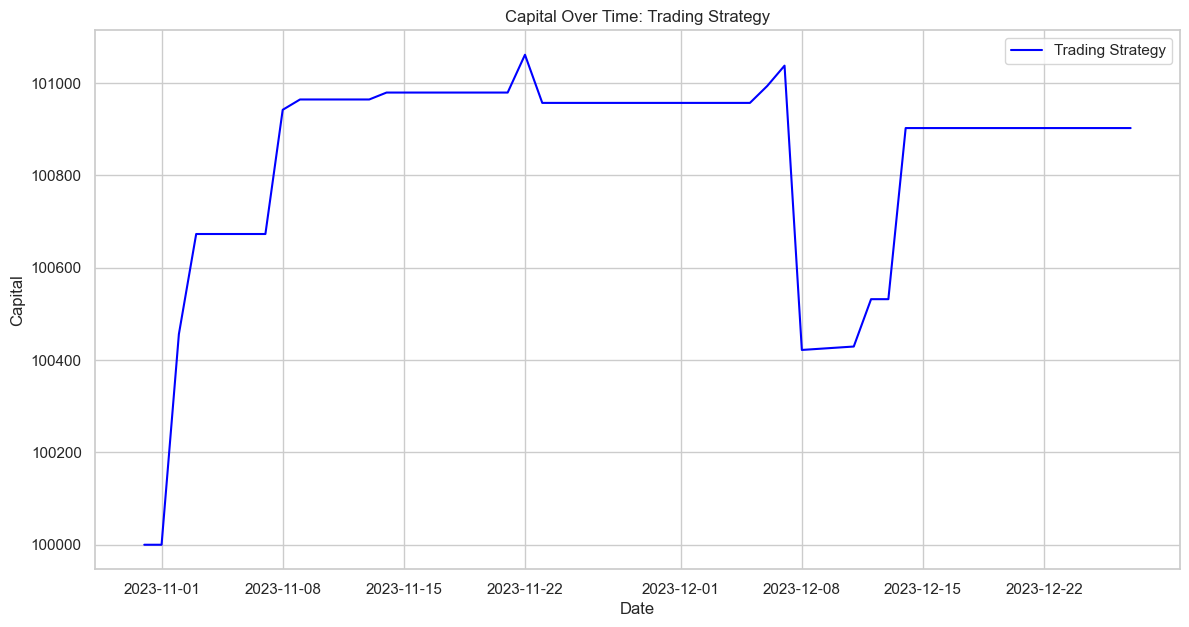

In [332]:
predicted_rates_series = pd.Series(predicted_rates, index=dates)
futures_prices_series = pd.Series(futures_prices, index=dates)


rate_changes = predicted_rates_series.diff()

initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series = pd.Series(index=predicted_rates_series.index, dtype=float)

# Lists to keep track of trades
buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

# Trading strategy loop
for date, change in rate_changes.items():
    price = futures_prices_series.loc[date]
    capital_series.loc[date] = capital + (shares_owned * price)

    # If rate decreases by more than 0.04 and we have capital to buy
    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)

    # If rate increases by more than 0.01 and we own shares
    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)

# Final update to capital after last date
capital_series.iloc[-1] = capital + (shares_owned * futures_prices_series.iloc[-1])

initial_shares = initial_capital // futures_prices_series[0]
bh_capital = (futures_prices_series + initial_shares)
bh_capital.iloc[0] = initial_capital

plt.figure(figsize=(14, 7))
plt.plot(capital_series.index, capital_series, label='Trading Strategy', color='blue')
#plt.plot(bh_capital.index, bh_capital, label='Buy and Hold Strategy', color='red')
plt.title('Capital Over Time: Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid(True)
plt.show()


In [333]:
filtered_data = test_data[(test_data['Date'] >= '2023-10-31') & (test_data['Date'] <= '2023-12-29')].copy()


In [334]:
daily_returns = capital_series.pct_change().dropna()

mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()
annualized_return = (1 + mean_daily_returns) ** 252 - 1
annualized_std = std_daily_returns * np.sqrt(252)
mean_5yr_rate = filtered_data['5 Yr'].mean() * 0.01
max_drawdown = (capital_series / capital_series.cummax() - 1).min()

# globe_max_capital = capital_series[capital_series == capital_series.cummax()].idxmax()
# min_after_globe_max = capital_series[capital_series[globe_max_capital:].idxmin()]
# maximal_drawdown = (capital_series[globe_max_capital] - min_after_globe_max) / capital_series[globe_max_capital]

# cumulative_returns = (1 + daily_returns).cumprod() 
# cumulative_max = cumulative_returns.cummax()
# drawdown = (cumulative_returns - cumulative_max) / cumulative_max
# max2_drawdown = drawdown.min()

risk_free_rate = 0
sharpe_ratio = (annualized_return - mean_5yr_rate) / annualized_std

print(f"Mean Daily Return: {mean_daily_returns * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annualized_std * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")



Mean Daily Return: 0.02%
Annualized Return: 5.70%
Annualized Volatility: 2.31%
Sharpe Ratio: 0.6236344929582244
Maximum Drawdown: -0.63%


Strategy Based on SVR (5 Yr)

In [339]:
predicted_rates2 = np.array([4.14947085, 4.12667207, 4.0928979, 4.16352684, 4.17264555, 4.16654862,
        4.1494431, 4.20250133, 4.21421702, 4.18796302, 4.18487928, 4.28102874,
        4.41598576, 4.43167091, 4.42832577, 4.35486806, 4.3493165, 4.38578117,
        4.46815366, 4.42094057, 4.53932017, 4.46572239, 4.53016096, 4.56994186,
        4.62743466, 4.58906479, 4.58588172, 4.59332594, 4.60694436, 4.61091152,
        4.6640878, 4.59810079, 4.74269756, 4.7324722, 4.74420618, 4.64647109,
        4.69458915, 4.75342803, 4.68596015, 4.76091202, 4.82675247, 4.90717773])

len(predicted_rates2)

42

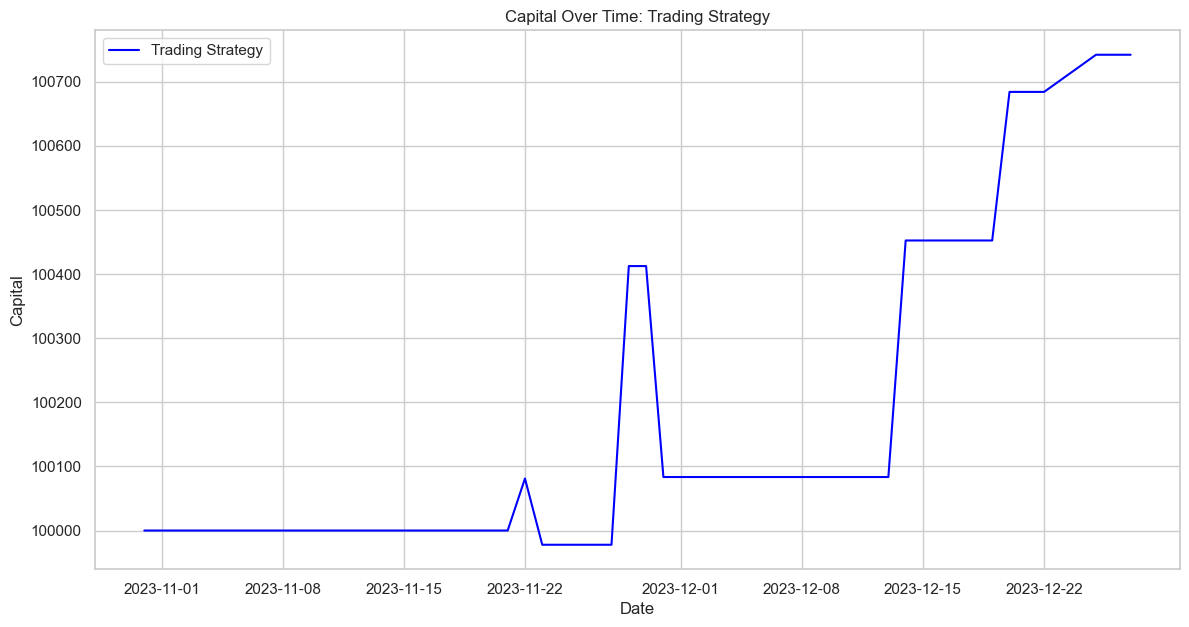

In [340]:
predicted_rates_series2 = pd.Series(predicted_rates2, index=dates)
futures_prices_series = pd.Series(futures_prices, index=dates)


rate_changes = predicted_rates_series2.diff()

initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series = pd.Series(index=predicted_rates_series2.index, dtype=float)

buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

for date, change in rate_changes.items():
    price = futures_prices_series.loc[date]
    capital_series.loc[date] = capital + (shares_owned * price)

    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)

    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)

capital_series.iloc[-1] = capital + (shares_owned * futures_prices_series.iloc[-1])

initial_shares = initial_capital // futures_prices_series[0]
bh_capital = (futures_prices_series + initial_shares)
bh_capital.iloc[0] = initial_capital

plt.figure(figsize=(14, 7))
plt.plot(capital_series.index, capital_series, label='Trading Strategy', color='blue')
#plt.plot(bh_capital.index, bh_capital, label='Buy and Hold Strategy', color='red')
plt.title('Capital Over Time: Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid(True)
plt.show()


In [344]:
daily_returns = capital_series.pct_change().dropna()

mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()
annualized_return = (1 + mean_daily_returns) ** 252 - 1
annualized_std = std_daily_returns * np.sqrt(252)
mean_5yr_rate = filtered_data['5 Yr'].mean() * 0.01
max_drawdown = (capital_series / capital_series.cummax() - 1).min()

risk_free_rate = 0
sharpe_ratio = (annualized_return - mean_5yr_rate) / annualized_std


print(f"Mean Daily Return: {mean_daily_returns * 100:2f}%")
print(f"Annualized Return: {annualized_return  * 100:2f}%")
print(f"Annualized Volatility: {annualized_std * 100:2f}%")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown * 100:2f}%")



Mean Daily Return: 0.018093%
Annualized Return: 4.664675%
Annualized Volatility: 1.761559%
Sharpe Ratio: 0.22702206510053183
Maximum Drawdown: -0.327653%


### 30 years

#### Data Loading and format data

In [352]:
file_path = './yield_curve_daily_20010731_20231229.xlsx'
data = pd.read_excel(file_path)

print(data.head())

data_cleaned = data.dropna().copy()
print(data_cleaned.isnull().sum())



        Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
0 2023-12-29  5.60  5.40  5.26  4.79  4.23  4.01  3.84  3.88   3.88   4.20   
1 2023-12-28  5.57  5.45  5.28  4.82  4.26  4.02  3.83  3.84   3.84   4.14   
2 2023-12-27  5.55  5.44  5.26  4.79  4.20  3.97  3.78  3.81   3.79   4.10   
3 2023-12-26  5.53  5.45  5.28  4.83  4.26  4.05  3.89  3.91   3.89   4.20   
4 2023-12-22  5.54  5.44  5.31  4.82  4.31  4.04  3.87  3.92   3.90   4.21   

   30 Yr  
0   4.03  
1   3.98  
2   3.95  
3   4.04  
4   4.05  
Date     0
1 Mo     0
3 Mo     0
6 Mo     0
1 Yr     0
2 Yr     0
3 Yr     0
5 Yr     0
7 Yr     0
10 Yr    0
20 Yr    0
30 Yr    0
dtype: int64


Apply Best Params to RF (30 Yr)

In [354]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

train_cutoff = pd.Timestamp('2023/10/30')  
test_start_date = pd.Timestamp('2023/10/31')  

train_data = data_cleaned[data_cleaned['Date'] <= train_cutoff]
test_data = data_cleaned[data_cleaned['Date'] >= test_start_date]


yield_period = '30 Yr'
X_train = train_data.drop(columns=['Date', yield_period])
y_train = train_data[yield_period]
X_test = test_data.drop(columns=['Date', yield_period])
y_test = test_data[yield_period]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf_best_params = {'bootstrap': True, 'max_depth': 10, 'max_features': None,
                  'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
rf_model = RandomForestRegressor(**rf_best_params, random_state=42)

rf_model.fit(X_train_pca, y_train)

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test_pca)

print(y_test_pred_rf)
len(y_test_pred_rf)

[3.90503148 3.90861517 3.90554383 3.90020472 3.8984795  3.89928664
 3.90216551 3.88119997 3.89088224 3.88204045 3.89859216 3.91080687
 4.27906621 4.30789208 4.31345692 3.90590312 3.9058655  3.93695208
 4.32945146 4.0605468  4.48358063 4.3314459  4.46832029 4.48412708
 4.5262116  4.48714001 4.48552769 4.48790047 4.52450565 4.52700543
 4.71372759 4.51937031 4.77652444 4.76431774 4.7783651  4.53091839
 4.71759725 4.78549266 4.72842035 4.79026833 4.8301399  5.00963765]


42

Apply Best Params to SVR (30 Yr)

In [355]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

train_val_cutoff = pd.Timestamp('2023/10/30')  
test_start_date = pd.Timestamp('2023/10/31')  

train_data = data_cleaned[data_cleaned['Date'] <= train_cutoff]
test_data = data_cleaned[data_cleaned['Date'] >= test_start_date]



yield_period = '30 Yr'
X_train = train_data.drop(columns=['Date', yield_period])
y_train = train_data[yield_period]
X_test = test_data.drop(columns=['Date', yield_period])
y_test = test_data[yield_period]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svr_best_params = {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
svr_model = SVR(**svr_best_params)

svr_model.fit(X_train_pca, y_train)

y_test_pred_svr = svr_model.predict(X_test_pca)

print(y_test_pred_svr)
len(y_test_pred_svr)


[3.92248729 3.87601019 3.82902483 3.94365466 3.94863156 3.93818674
 3.91207174 3.99303345 3.9991781  3.9605172  3.96512924 4.10429706
 4.2915953  4.31996953 4.31833798 4.20903217 4.19712827 4.25590996
 4.37149323 4.30800769 4.47422214 4.3676305  4.44881655 4.50735759
 4.59348655 4.53697815 4.53124475 4.54065239 4.57584606 4.57788807
 4.65787454 4.55802341 4.76903258 4.75453222 4.76785508 4.61770123
 4.68448272 4.77500205 4.67485061 4.78781797 4.87665472 4.99615664]


42

In [347]:
predicted_rates3 = np.array([3.90503148, 3.90861517, 3.90554383, 3.90020472, 3.8984795, 3.89928664,
        3.90216551, 3.88119997, 3.89088224, 3.88204045, 3.89859216, 3.91080687,
        4.27906621, 4.30789208, 4.31345692, 3.90590312, 3.9058655, 3.93695208,
        4.32945146, 4.0605468, 4.48358063, 4.3314459, 4.46832029, 4.48412708,
        4.5262116, 4.48714001, 4.48552769, 4.48790047, 4.52450565, 4.52700543,
        4.71372759, 4.51937031, 4.77652444, 4.76431774, 4.7783651, 4.53091839,
        4.71759725, 4.78549266, 4.72842035, 4.79026833, 4.8301399, 5.00963765])

len(predicted_rates3)

42

In [356]:
thirty_yr_data = pd.read_csv('./HistoricalData_1714420117007.csv')
thirty_yr_data['Date'] = pd.to_datetime(thirty_yr_data['Date'])
thirty_yr_data_reversed = thirty_yr_data.iloc[::-1].reset_index(drop=True)
futures_prices2 = thirty_yr_data_reversed['Close/Last'].values

if len(futures_prices2) > len(dates):
    futures_prices2 = futures_prices2[:len(dates)]  
else:
    futures_prices2 = np.pad(futures_prices2, (0, len(dates) - len(futures_prices2)), 'constant', constant_values=np.mean(futures_prices2))

futures_prices_series2 = pd.Series(futures_prices2, index=dates)
print(futures_prices_series2)
len(futures_prices_series2)

2023-10-31    109.2812
2023-11-01    109.4375
2023-11-02    110.4375
2023-11-03    112.5000
2023-11-06    113.6562
2023-11-07    112.4688
2023-11-08    113.9688
2023-11-09    114.8125
2023-11-10    112.9688
2023-11-13    113.3750
2023-11-14    113.2812
2023-11-15    115.4375
2023-11-16    114.2500
2023-11-17    115.3125
2023-11-20    115.4062
2023-11-21    115.8125
2023-11-22    115.6250
2023-11-23    115.8750
2023-11-24    114.8438
2023-11-27    116.0312
2023-11-28    116.3750
2023-11-29    117.4375
2023-11-30    116.4375
2023-12-01    118.1562
2023-12-04    117.5625
2023-12-05    119.4062
2023-12-06    120.5625
2023-12-07    120.2500
2023-12-08    119.0000
2023-12-11    119.0000
2023-12-12    119.5000
2023-12-13    121.6562
2023-12-14    123.4375
2023-12-15    123.7812
2023-12-18    123.2500
2023-12-19    123.6562
2023-12-20    124.3750
2023-12-21    123.9688
2023-12-22    123.7812
2023-12-25    124.2500
2023-12-26    125.8750
2023-12-27    125.1250
Freq: B, dtype: float64


42

Strategy Based on RF (30 Yr)

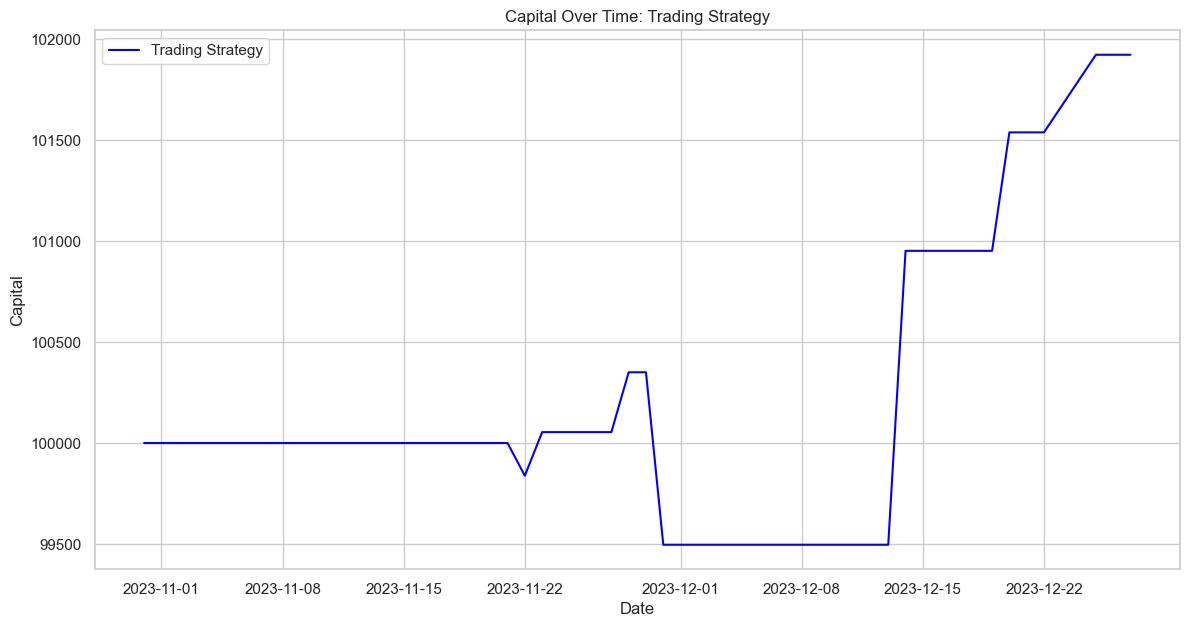

In [357]:
predicted_rates_series2 = pd.Series(predicted_rates2, index=dates)
futures_prices_series2 = pd.Series(futures_prices2, index=dates)


rate_changes2 = predicted_rates_series2.diff()

initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series2 = pd.Series(index=predicted_rates_series2.index, dtype=float)

buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

for date, change in rate_changes2.items():
    price = futures_prices_series2.loc[date]
    capital_series.loc[date] = capital + (shares_owned * price)

    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)

    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)

capital_series.iloc[-1] = capital + (shares_owned * futures_prices_series2.iloc[-1])

initial_shares = initial_capital // futures_prices_series2[0]
bh_capital = (futures_prices_series2 + initial_shares)
bh_capital.iloc[0] = initial_capital

plt.figure(figsize=(14, 7))
plt.plot(capital_series.index, capital_series, label='Trading Strategy', color='blue')
#plt.plot(bh_capital.index, bh_capital, label='Buy and Hold Strategy', color='red')
plt.title('Capital Over Time: Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid(True)
plt.show()


In [358]:
daily_returns = capital_series.pct_change().dropna()

mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()
annualized_return = (1 + mean_daily_returns) ** 252 - 1
annualized_std = std_daily_returns * np.sqrt(252)
mean_30yr_rate = filtered_data['30 Yr'].mean() * 0.01
max_drawdown = (capital_series / capital_series.cummax() - 1).min()

sharpe_ratio = (annualized_return - mean_30yr_rate) / annualized_std


print(f"Mean Daily Return: {mean_daily_returns * 100:2f}%")
print(f"Annualized Return: {annualized_return * 100:2f}%")
print(f"Annualized Volatility: {annualized_std * 100:2f}%")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown * 100:2f}%")

Mean Daily Return: 0.046872%
Annualized Return: 12.534556%
Annualized Volatility: 4.638467%
Sharpe Ratio: 1.7486347642335969
Maximum Drawdown: -0.851019%


Strategy Based on SVR (30 Yr)

In [359]:
predicted_rates4 = np.array([3.92248729, 3.87601019, 3.82902483, 3.94365466, 3.94863156, 3.93818674,
        3.91207174, 3.99303345, 3.9991781, 3.9605172, 3.96512924, 4.10429706,
        4.2915953, 4.31996953, 4.31833798, 4.20903217, 4.19712827, 4.25590996,
        4.37149323, 4.30800769, 4.47422214, 4.3676305, 4.44881655, 4.50735759,
        4.59348655, 4.53697815, 4.53124475, 4.54065239, 4.57584606, 4.57788807,
        4.65787454, 4.55802341, 4.76903258, 4.75453222, 4.76785508, 4.61770123,
        4.68448272, 4.77500205, 4.67485061, 4.78781797, 4.87665472, 4.99615664])

len(predicted_rates4)

42

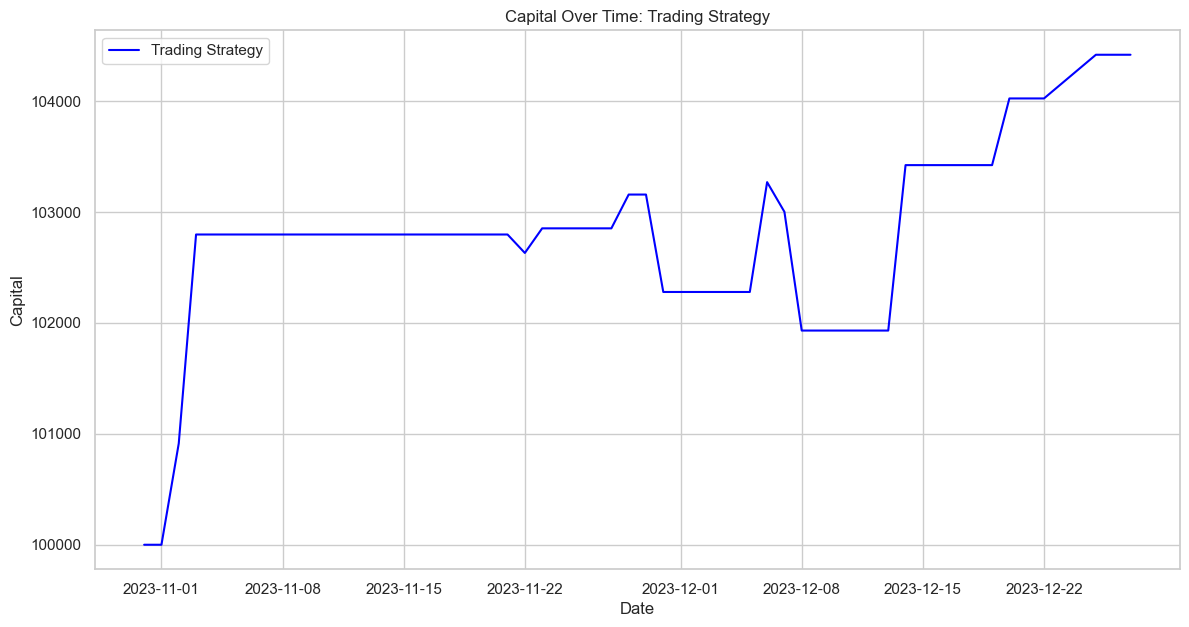

In [360]:
predicted_rates_series4 = pd.Series(predicted_rates4, index=dates)
futures_prices_series2 = pd.Series(futures_prices2, index=dates)


rate_changes4 = predicted_rates_series4.diff()

initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series = pd.Series(index=predicted_rates_series4.index, dtype=float)

buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

for date, change in rate_changes4.items():
    price = futures_prices_series2.loc[date]
    capital_series.loc[date] = capital + (shares_owned * price)

    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)

    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)

capital_series.iloc[-1] = capital + (shares_owned * futures_prices_series2.iloc[-1])

initial_shares = initial_capital // futures_prices_series2[0]
bh_capital = (futures_prices_series2 + initial_shares)
bh_capital.iloc[0] = initial_capital

plt.figure(figsize=(14, 7))
plt.plot(capital_series.index, capital_series, label='Trading Strategy', color='blue')
#plt.plot(bh_capital.index, bh_capital, label='Buy and Hold Strategy', color='red')
plt.title('Capital Over Time: Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.grid(True)
plt.show()


In [361]:
daily_returns = capital_series.pct_change().dropna()

mean_daily_returns = daily_returns.mean()
std_daily_returns = daily_returns.std()
annualized_return = (1 + mean_daily_returns) ** 252 - 1
annualized_std = std_daily_returns * np.sqrt(252)
mean_30yr_rate = filtered_data['30 Yr'].mean() * 0.01
max_drawdown = (capital_series / capital_series.cummax() - 1).min()

sharpe_ratio = (annualized_return - mean_30yr_rate) / annualized_std


print(f"Mean Daily Return: {mean_daily_returns * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annualized_std * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")

Mean Daily Return: 0.11%
Annualized Return: 30.80%
Annualized Volatility: 7.71%
Sharpe Ratio: 3.420376329163328
Maximum Drawdown: -1.30%


# **Part III**

# **Gaussian Process**

In [9]:
pip install "gpytorch"

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install "matplotlib"

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install "pandas"

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import torch
import gpytorch
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from matplotlib import pyplot as plt

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# %cd /content/drive/MyDrive/Colab Notebooks/Fix Income Project

In [14]:
df_clean = pd.read_csv("yield_curve_daily_20010731_20231229.csv",index_col=0).dropna()
df_clean.index = pd.DatetimeIndex(df_clean.index)
df_clean = df_clean.sort_index()
print (df_clean.shape)
df_clean.head()

(5604, 11)


1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99   5.19   5.70   

            30 Yr  
Date               
2001-07-31   5.51  
2001-08-01   5.53  
2001-08-02   5.57  
2001-08-03   5.59  
2001-08-06   5.59

In [ ]:
yield_durations = [
    "1 Mo", "3 Mo", "6 Mo", "1 Yr", "2 Yr", "3 Yr", "5 Yr",
    "7 Yr", "10 Yr", "20 Yr", "30 Yr"
]


colors = plt.cm.viridis(np.linspace(0, 1, len(yield_durations)))
plt.figure(figsize=(15, 8))
for duration, color in zip(yield_durations, colors):
    if duration in df_clean.columns:
        plt.plot(df_clean.index, df_clean[duration], label=duration, color=color)

plt.title('Time Series of Daily Yields Curve for US Treasury by Duration')
plt.xlabel('Date')
plt.ylabel('Yield Curve Rate')

plt.legend()
plt.grid(True)
plt.show()


##### Note: 30Y 2002/02/19 - 2006/02/08 data is empty

# Autocorrelation Detection

In [21]:
def hurst_exponent(time_series, max_lag=20):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [22]:
pd.DataFrame(df_clean.apply(lambda x: hurst_exponent(x.values, 40))).T

1 Mo      3 Mo      6 Mo      1 Yr      2 Yr      3 Yr      5 Yr  \
0  0.444144  0.552735  0.629144  0.593432  0.531603  0.524285  0.510362   

       7 Yr     10 Yr     20 Yr   30 Yr  
0  0.506283  0.511323  0.507619  0.2822

### designed to calculate the Hurst exponent of a time series. The Hurst exponent is a measure of the long-term memory of a time series. It can reveal whether a time series is a random walk (H=0.5), exhibits persistence (H>0.5), or has mean-reverting properties (H<0.5).

Persistence: high values are likely to be followed by high values, and low values are likely to be followed by low values - (postive autocorrelation)

Mean-Reverting: the time series exhibits a tendency to return to an average value over time. High values are likely to be followed by lower values, and low values are likely to be followed by higher values, suggesting a "correction" to departures from the long-term mean.

## Divided into Train, Validation, Test



*   Train: 2001-2018, 2001-2019, 2001-2020, 2001-2021
*   Validation: 2019, 2020, 2021, 2022
*   Test:2023


In [25]:
corr = df_clean.corr()

In [26]:
train_and_validation = df_clean.loc["2010":"2022"]
test = df_clean.loc["2023":]

In [27]:
Y_COLS = ["1 Yr", "5 Yr"]

In [28]:
train_and_validation.shape,test.shape

((3252, 11), (250, 11))

### Test the Persistence

In [29]:
result_persist = pd.DataFrame()
tscv = TimeSeriesSplit(n_splits=4,test_size=250)
# ensures that the validation sets are forward-looking and do not overlap in time
# splits the data into a training set (df_train_i) and a testing set (df_test_i) for each fold
# uses the last known value from the training set as the prediction for the entire test set

for i, (train_index, test_index) in enumerate(tscv.split(train_and_validation)):
    results_i = {}
    print(f"Fold {i}:")
    df_train_i = train_and_validation.iloc[train_index]
    df_test_i = train_and_validation.iloc[test_index]
    print(f"Training from {df_train_i.index.min()} to {df_train_i.index.max()}")
    print(f"Testing from {df_test_i.index.min()} to {df_test_i.index.max()}\n")

    y_pred_i = df_test_i[Y_COLS].shift(1).copy()
    y_pred_i.iloc[0] = df_train_i[Y_COLS].iloc[-1]
    results_i = {
      "fold":i,
      "test_year":df_test_i.index.year.max()}

    for test_col in Y_COLS:
        results_i[test_col] = {
          "RMSE": mean_squared_error(df_test_i[test_col],y_pred_i[test_col])**0.5,\
          "MAPE": mean_absolute_percentage_error(df_test_i[test_col],y_pred_i[test_col])
        }

    result_persist = pd.concat([result_persist,pd.DataFrame.from_dict(results_i,orient="columns")])

Fold 0:
Training from 2010-01-04 00:00:00 to 2019-01-02 00:00:00
Testing from 2019-01-03 00:00:00 to 2020-01-02 00:00:00

Fold 1:
Training from 2010-01-04 00:00:00 to 2020-01-02 00:00:00
Testing from 2020-01-03 00:00:00 to 2020-12-31 00:00:00

Fold 2:
Training from 2010-01-04 00:00:00 to 2020-12-31 00:00:00
Testing from 2021-01-04 00:00:00 to 2021-12-30 00:00:00

Fold 3:
Training from 2010-01-04 00:00:00 to 2021-12-30 00:00:00
Testing from 2021-12-31 00:00:00 to 2022-12-30 00:00:00



use the persistence model as the benchmark model.
(the current value is taken as a forecast for tomorrow.)
a simple benchmark model for time series forecasting, assuming that the value at the next time step will be the same as the value at the current time step.  This model is often used as a baseline to compare against more complex forecasting models.

In [30]:
result_persist.reset_index().drop(columns=["test_year"]).groupby("index").mean()
# RMSE measures the average magnitude of the errors between predicted and actual values, penalizing larger errors more since they are squared
# MAPE measures the average percentage error between the predicted and actual values, providing an understanding of the error relative to the magnitude of the value being predicted.

fold      1 Yr      5 Yr
index                          
MAPE    1.5  0.042999  0.033796
RMSE    1.5  0.035197  0.053408

## Gaussian Process Modelling

The kernel (or covariance) function of the GP model encodes assumptions about the function that generates the data. It determines how yields for different durations are correlated with each other. For example, if yields tend to move together in a particular way as a reaction to economic events, the GP model can capture this relationship.

The GP assumes that the yields for different durations share common inputs (such as underlying economic indicators). The multitask GP leverages this by using a single set of inputs to predict multiple correlated outputs.

In [31]:
def lag_variables(df,y_cols,n_lags=2):
    df1= df.copy()
    col_list = df1.columns
    for lag_i in range(1,n_lags+1):
        df_lag_i = df1[col_list].shift(lag_i)
        df_lag_i.columns = [f"{col_i}_lag{lag_i}" for col_i in col_list]
        df1 = pd.merge(df1,df_lag_i,left_index=True,right_index=True)
    df1 = df1.dropna()
    X = df1.drop(columns=y_cols)
    y = df1[y_cols]
    return X,y

X,y = lag_variables(train_and_validation,Y_COLS,14)
X.shape,y.shape

((3238, 163), (3238, 2))

In [32]:
class GP_Model(gpytorch.models.ExactGP):
    # initializes the model with training data, a kernel function, and a likelihood function.
    def __init__(self, train_x, train_y, kernel_func, likelihood):
        super(GP_Model, self).__init__(train_x, train_y, likelihood)
        # mean and covariance functions are set up for multitask learning, they can capture relationships between different durations
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ConstantMean(), num_tasks=train_y.shape[-1]
        )
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            kernel_func, num_tasks=train_y.shape[-1], rank=1
        )


    def forward(self, x):
        # defines how the model generates predictions. Given new input data, it calculates the mean and covariance of the predicted outputs.
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)



def train_gp(train_x, train_y, kernel_func, N_ITER = 50,verbose=True):
    # takes in the training data, the kernel function, and the number of iterations
    # uses gradient descent (via the Adam optimizer) to find the model parameters that maximize the likelihood of the observed data
    likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=train_y.shape[-1])
    if type(train_x) != torch.Tensor:
        train_x_tensor = torch.tensor(train_x.values).float()
        train_y_tensor = torch.tensor(train_y.values).float()
    else:
        train_x_tensor = train_x
        train_y_tensor = train_y
    model = GP_Model(train_x_tensor, train_y_tensor,kernel_func, likelihood)

    # find the optimal model hyperparameters
    model.train()
    likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
    print ("Training GP")

    # The loss is calculated using the marginal log likelihood, which is a measure of how well the model fits the data. The lower the loss, the better the fit.
    # trained iteratively, adjusting its parameters to improve the fit each time
    for i in range(N_ITER):
        optimizer.zero_grad()
        output = model(train_x_tensor)
        loss = -mll(output, train_y_tensor)
        loss.backward()
        if verbose and ((i%10==0) or (i==N_ITER-1)):
            print('Iter %d/%d - Loss: %.3f' % (i + 1, N_ITER, loss.item()))
        optimizer.step()
    return model,likelihood


def predict_gp(test_x,likelihood,model):
    # predicts the output for the new data and also computes a confidence interval for the predictions, which gives an estimate of the uncertainty in the predictions
    model.eval()
    likelihood.eval()
    test_x_tensor = torch.tensor(test_x.values).float()
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        predictions = likelihood(model(test_x_tensor))
        mean = predictions.mean
    return mean,predictions

The kernel is a function that computes a measure of similarity or correlation between points in the input space. It essentially says how much one point in the input space should influence another. This is often based on the distance between points—the closer two points are in the input space, the more similar they are considered to be.

### RBF Kernel:
- a function of the Euclidean distance between any two points in the input space and has a parameter that controls the "length-scale". This length-scale determines how rapidly the similarity measure decreases with distance.
- assumes that points closer together in the input space will have more similar target values.





### RBF Kernel with Linear Kernel:

- allows the model to consider both linear and non-linear patterns in the data.

In [33]:
kernel_type = {

    "kernel_RBF":gpytorch.kernels.RBFKernel(),\

    "kernel_RBF_&_linear":gpytorch.kernels.RBFKernel()*gpytorch.kernels.LinearKernel(),\
}

In [34]:
def kernel_crossval_raw(kernel_j, N_TRIALS=10, N_TRAINING_ITER=50, verbose=False):
    result_j = pd.DataFrame()
    model_dict_j = {}
    for trial in range(N_TRIALS):
        for i, (train_index, test_index) in enumerate(tscv.split(X)):
            print(f"Sample {trial}, Fold {i}:")
            train_xi,train_yi = X.iloc[train_index],y.iloc[train_index]
            test_xi,test_yi = X.iloc[test_index],y.iloc[test_index]
            model_i,lik_i = train_gp(train_xi,train_yi,kernel_j,N_TRAINING_ITER,verbose)
            model_dict_j[trial,i,"model"]=model_i
            if verbose:
                print(f"Testing from {test_xi.index.min()} to {test_xi.index.max()}\n")
            mean_i,pred_i = predict_gp(test_xi,lik_i,model_i)
            model_dict_j[trial,i,"prediction"]=pred_i
            results_i = {
              "trial":trial,
              "fold":i,
              "test_year":test_xi.index.year.max()}
            y_pred_i = pd.DataFrame(mean_i,index=test_yi.index,columns = test_yi.columns)
            for test_col in test_yi.columns:
                results_i[test_col] = {
                  "RMSE": mean_squared_error(test_yi[test_col],y_pred_i[test_col])**0.5,\
                  "MAPE": mean_absolute_percentage_error(test_yi[test_col],y_pred_i[test_col])
                }
            result_j = pd.concat([result_j,pd.DataFrame.from_dict(results_i,orient="columns")])
    return (result_j,model_dict_j)

In [35]:
result_test,model_test = kernel_crossval_raw(gpytorch.kernels.RBFKernel(),3,10,True)
results_trials = result_test.loc["RMSE"].reset_index().drop(columns=["test_year","fold"]).groupby(["trial","index"]).mean()
results_trials["err_avg"] = results_trials.mean(axis=1)
results_trials["rnk_"] = results_trials["err_avg"].rank()
results_trials.loc[results_trials.rnk_==1]

Sample 0, Fold 0:
Training GP
Iter 1/10 - Loss: 1.301
Iter 10/10 - Loss: 0.837
Testing from 2019-01-03 00:00:00 to 2020-01-02 00:00:00



/root/miniconda3/lib/python3.8/site-packages/linear_operator/utils/interpolation.py:71: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:621.)
  summing_matrix = cls(summing_matrix_indices, summing_matrix_values, size)


Sample 0, Fold 1:
Training GP
Iter 1/10 - Loss: 1.239
Iter 10/10 - Loss: 0.808
Testing from 2020-01-03 00:00:00 to 2020-12-31 00:00:00

Sample 0, Fold 2:
Training GP
Iter 1/10 - Loss: 1.148
Iter 10/10 - Loss: 0.768
Testing from 2021-01-04 00:00:00 to 2021-12-30 00:00:00

Sample 0, Fold 3:
Training GP
Iter 1/10 - Loss: 1.148
Iter 10/10 - Loss: 0.770
Testing from 2021-12-31 00:00:00 to 2022-12-30 00:00:00

Sample 1, Fold 0:
Training GP
Iter 1/10 - Loss: 1.117
Iter 10/10 - Loss: 0.751
Testing from 2019-01-03 00:00:00 to 2020-01-02 00:00:00

Sample 1, Fold 1:
Training GP
Iter 1/10 - Loss: 1.117
Iter 10/10 - Loss: 0.751
Testing from 2020-01-03 00:00:00 to 2020-12-31 00:00:00

Sample 1, Fold 2:
Training GP
Iter 1/10 - Loss: 1.117
Iter 10/10 - Loss: 0.755
Testing from 2021-01-04 00:00:00 to 2021-12-30 00:00:00

Sample 1, Fold 3:
Training GP
Iter 1/10 - Loss: 1.101
Iter 10/10 - Loss: 0.743
Testing from 2021-12-31 00:00:00 to 2022-12-30 00:00:00

Sample 2, Fold 0:
Training GP
Iter 1/10 - Loss: 

1 Yr      5 Yr   err_avg  rnk_
trial index                                    
2     RMSE   0.504934  0.393332  0.449133   1.0

In [36]:
torch.save(model_test[(0,0,'model')].state_dict(), "./sample_model_save.sav")

In [37]:
all_results = {}
all_results_df = pd.DataFrame()
for kernel_name,kernel_func_j in kernel_type.items():
    print (f"Using {kernel_name}")
    kernel_result,kernel_models = kernel_crossval_raw(kernel_func_j,10,150,True)
    kernel_results_trials = kernel_result.loc["RMSE"].reset_index().drop(columns=["fold","test_year"]).groupby(["trial","index"]).mean()
    kernel_results_trials["err_avg"] = kernel_results_trials.mean(axis=1)
    kernel_results_trials["rnk_"] = kernel_results_trials["err_avg"].rank()
    all_results[kernel_name] = (kernel_results_trials,kernel_models)
    result_i = kernel_results_trials.copy()
    result_i = result_i.loc[result_i.rnk_==1]
    result_i["kernel"] = kernel_name
    all_results_df = pd.concat([all_results_df,result_i])

Using kernel_RBF
Sample 0, Fold 0:
Training GP
Iter 1/150 - Loss: 1.480
Iter 11/150 - Loss: 0.865
Iter 21/150 - Loss: 0.309
Iter 31/150 - Loss: -0.234
Iter 41/150 - Loss: -0.766
Iter 51/150 - Loss: -1.262
Iter 61/150 - Loss: -1.712
Iter 71/150 - Loss: -2.088
Iter 81/150 - Loss: -2.365
Iter 91/150 - Loss: -2.540
Iter 101/150 - Loss: -2.641
Iter 111/150 - Loss: -2.701
Iter 121/150 - Loss: -2.738
Iter 131/150 - Loss: -2.763
Iter 141/150 - Loss: -2.782
Iter 150/150 - Loss: -2.796
Testing from 2019-01-03 00:00:00 to 2020-01-02 00:00:00

Sample 0, Fold 1:
Training GP
Iter 1/150 - Loss: 1.102
Iter 11/150 - Loss: 0.700
Iter 21/150 - Loss: 0.240
Iter 31/150 - Loss: -0.255
Iter 41/150 - Loss: -0.759
Iter 51/150 - Loss: -1.253
Iter 61/150 - Loss: -1.717
Iter 71/150 - Loss: -2.124
Iter 81/150 - Loss: -2.440
Iter 91/150 - Loss: -2.644
Iter 101/150 - Loss: -2.758
Iter 111/150 - Loss: -2.818
Iter 121/150 - Loss: -2.852
Iter 131/150 - Loss: -2.873
Iter 141/150 - Loss: -2.886
Iter 150/150 - Loss: -2.89

In [38]:
all_results_df

1 Yr      5 Yr   err_avg  rnk_               kernel
trial index                                                         
3     RMSE   0.036357  0.027451  0.031904   1.0           kernel_RBF
9     RMSE   0.020760  0.010872  0.015816   1.0  kernel_RBF_&_linear

# Plot for 2022

In [39]:
data_2022 = train_and_validation.loc["2022"]
X_test_2022,y_test_2022 = lag_variables(data_2022,Y_COLS,14) #lagged data for predicting

#Persistence model
perists_pred_2022 = y_test_2022[Y_COLS].shift(1).copy()
perists_pred_2022.iloc[0] = train_and_validation.loc[:"2021"][Y_COLS].iloc[-1]

# RBF model
model1 = all_results["kernel_RBF"][1][(3, 2, 'model')]
lik1 = model1.likelihood
pred_kernel1,pred1 = predict_gp(X_test_2022,lik1,model1)
pred_kernel1 = pd.DataFrame(pred_kernel1,index=y_test_2022.index,columns = y_test_2022.columns)

# RBF + Linear model
model2 = all_results["kernel_RBF_&_linear"][1][(9, 2, 'model')]
lik2 = model2.likelihood
pred_kernel2,pred2 = predict_gp(X_test_2022,lik2,model2)
pred_kernel2 = pd.DataFrame(pred_kernel2,index=y_test_2022.index,columns = y_test_2022.columns)

In [40]:
join1 = pd.merge(y_test_2022,perists_pred_2022,suffixes=["","_persist"],left_index=True,right_index=True)
join2 = pd.merge(join1,pred_kernel1,suffixes=["","_kernel_RBF"],left_index=True,right_index=True)
joinf_2022 = pd.merge(join2,pred_kernel2,suffixes=["_true","_kernel_RBF_&_linear"],left_index=True,right_index=True)

joinf_2022[["1 Yr_kernel_RBF_stddev","5 Yr_kernel_RBF_stddev"]] = pred1.variance.detach().numpy()**0.5
joinf_2022[["1 Yr_kernel_RBF_&_linear_stddev","5 Yr_kernel_RBF_&_linear_stddev"]] = pred2.variance.detach().numpy()**0.5

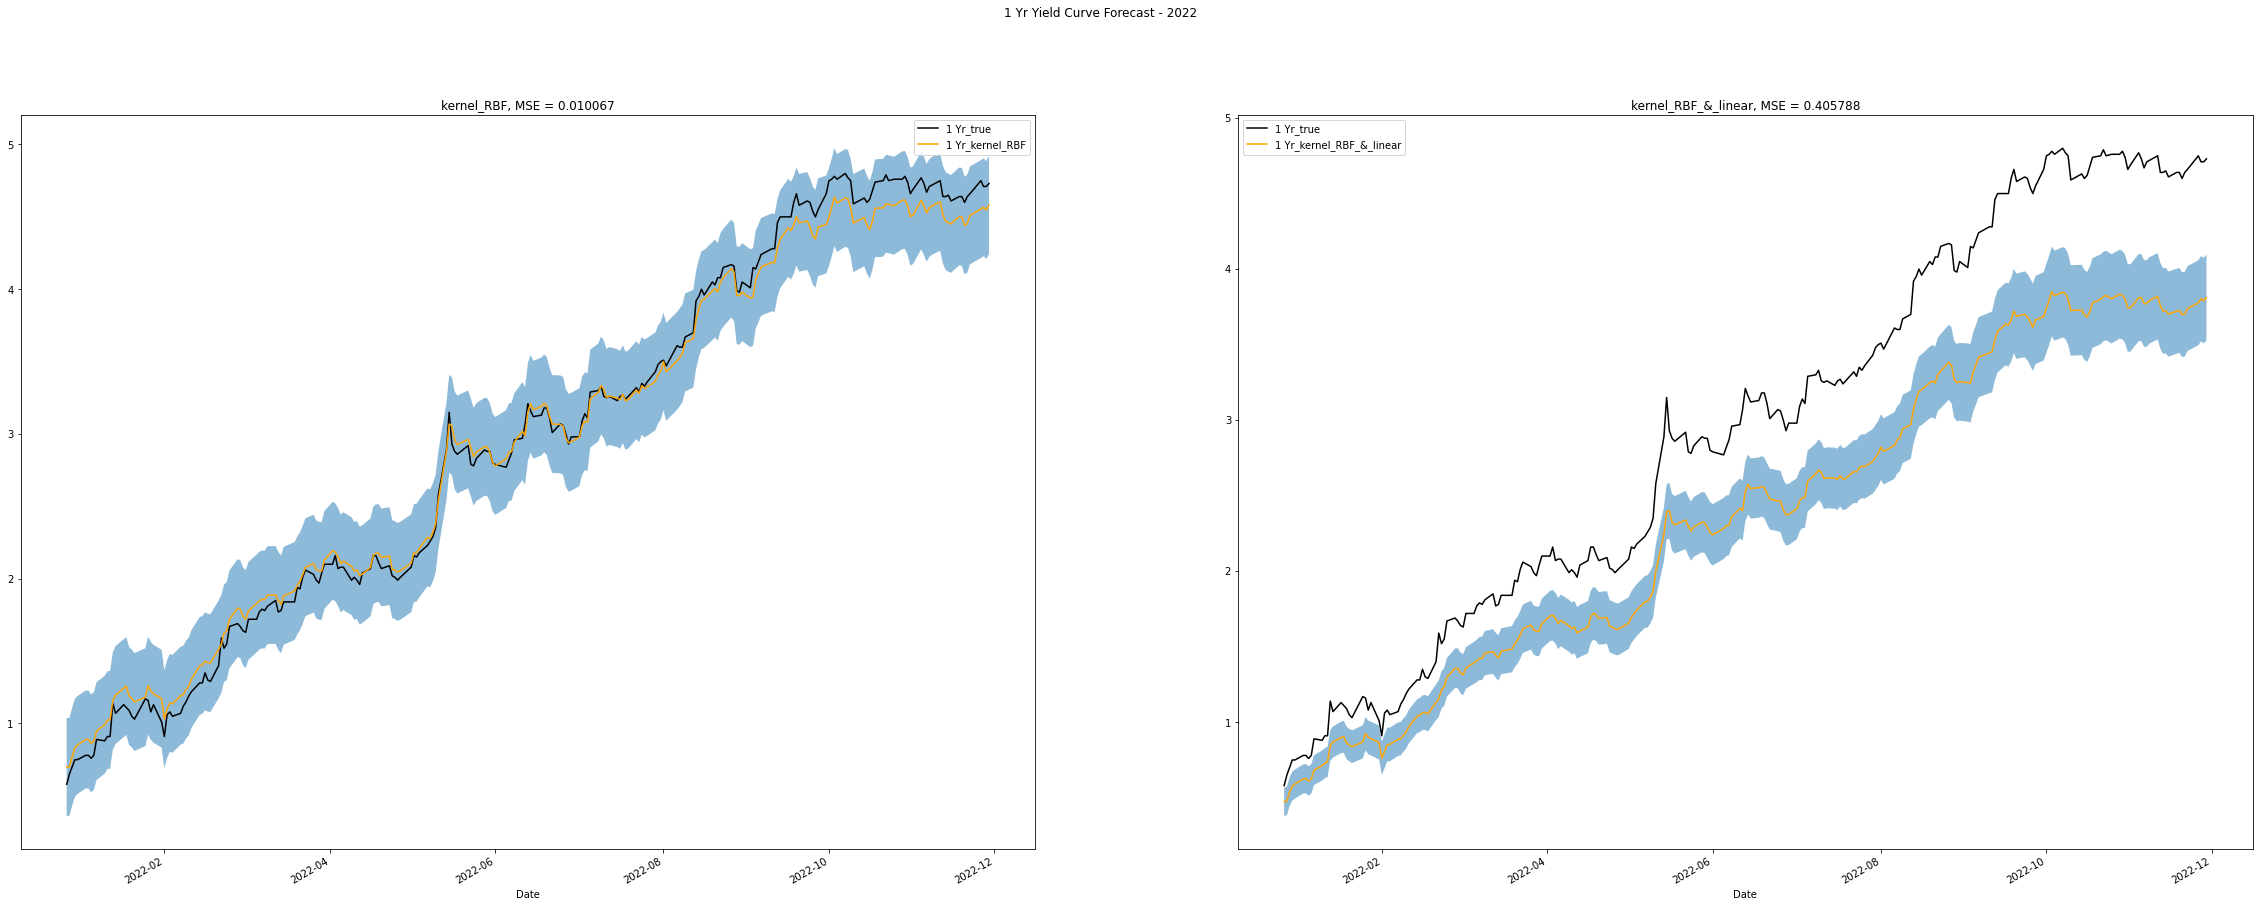

In [53]:
fig,ax = plt.subplots(1,2,figsize=(40,15))
fig.suptitle("1 Yr Yield Curve Forecast - 2022")
for i,model_type_i in enumerate(["kernel_RBF","kernel_RBF_&_linear"]):
    ax_i = ax[i]
    y_i = joinf_2022[f"1 Yr_{model_type_i}"]
    mse_i = mean_squared_error(joinf_2022["1 Yr_true"],y_i)
    joinf_2022[["1 Yr_true",f"1 Yr_{model_type_i}"]].plot(ax=ax_i,color=("k","orange"))
    ax_i.set_title(f"{model_type_i}, MSE = {mse_i:.6f}")
    if model_type_i != "persist":
        ax_i.fill_between(joinf_2022.index, y_i - 0.1*joinf_2022[f"1 Yr_{model_type_i}_stddev"],\
                          y_i + 0.1*joinf_2022[f"1 Yr_{model_type_i}_stddev"], alpha=0.5)

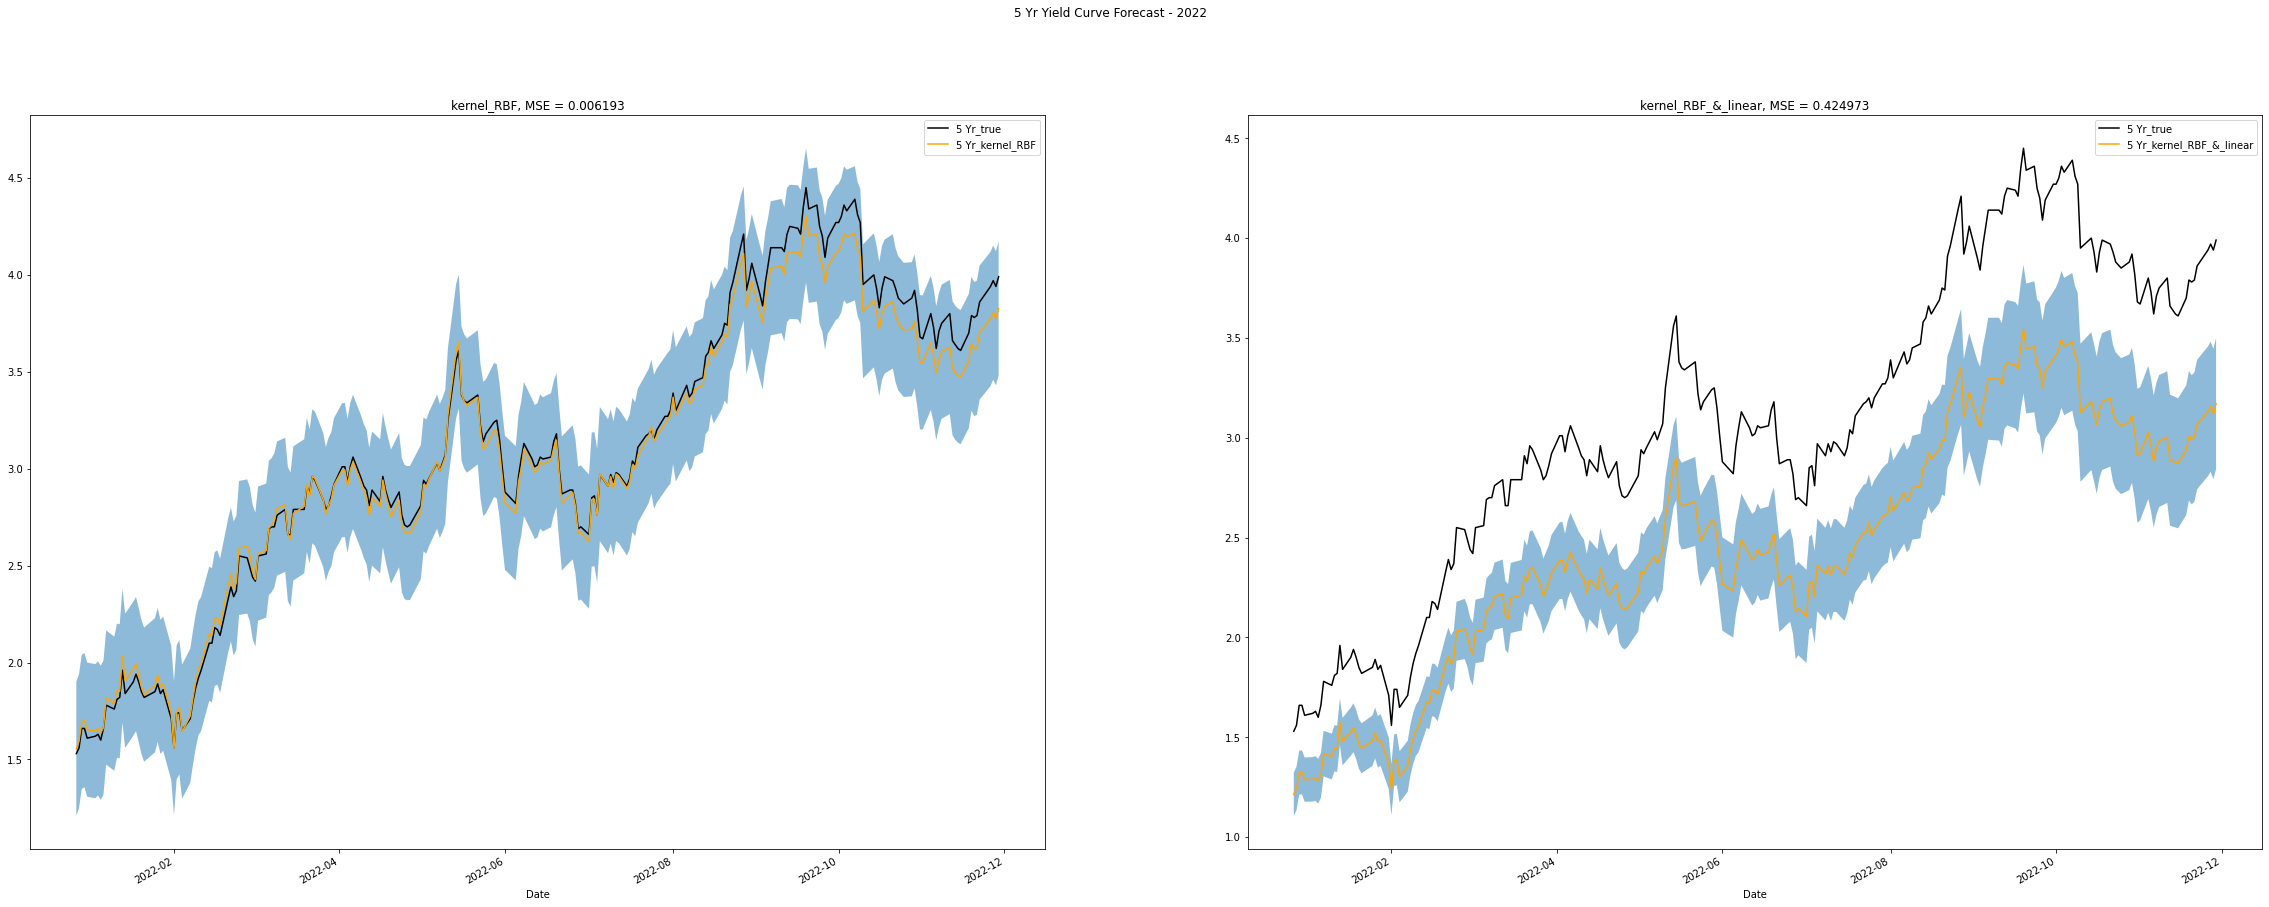

In [54]:
fig,ax = plt.subplots(1,2,figsize=(40,15))
fig.suptitle("5 Yr Yield Curve Forecast - 2022")
for i,model_type_i in enumerate(["kernel_RBF","kernel_RBF_&_linear"]):
    ax_i = ax[i]
    y_i = joinf_2022[f"5 Yr_{model_type_i}"]
    mse_i = mean_squared_error(joinf_2022["5 Yr_true"],y_i)
    joinf_2022[["5 Yr_true",f"5 Yr_{model_type_i}"]].plot(ax=ax_i,color=("k","orange"))
    ax_i.set_title(f"{model_type_i}, MSE = {mse_i:.6f}")
    if model_type_i != "persist":
        ax_i.fill_between(joinf_2022.index, y_i - 0.1*joinf_2022[f"5 Yr_{model_type_i}_stddev"],\
                          y_i + 0.1*joinf_2022[f"5 Yr_{model_type_i}_stddev"], alpha=0.5)

# Train

In [45]:
kernel_func = kernel_type["kernel_RBF_&_linear"]
loss_final = {}
model_dict_final = {}
for trial in range(25):
    print(f"Sample {trial}")
    train_xi,train_yi = X,y
    model_i,lik_i = train_gp(train_xi,train_yi,kernel_func,200,1)
    mll_i = gpytorch.mlls.ExactMarginalLogLikelihood(lik_i, model_i)
    loss_final[trial] = mll_i
    model_dict_final[trial,"model"]=model_i

Sample 0
Training GP
Iter 1/200 - Loss: 1.137
Iter 11/200 - Loss: 0.721
Iter 21/200 - Loss: 0.249
Iter 31/200 - Loss: -0.261
Iter 41/200 - Loss: -0.780
Iter 51/200 - Loss: -1.287
Iter 61/200 - Loss: -1.763
Iter 71/200 - Loss: -2.180
Iter 81/200 - Loss: -2.493
Iter 91/200 - Loss: -2.684
Iter 101/200 - Loss: -2.782
Iter 111/200 - Loss: -2.829
Iter 121/200 - Loss: -2.848
Iter 131/200 - Loss: -2.869
Iter 141/200 - Loss: -2.878
Iter 151/200 - Loss: -2.885
Iter 161/200 - Loss: -2.891
Iter 171/200 - Loss: -2.894
Iter 181/200 - Loss: -2.897
Iter 191/200 - Loss: -2.900
Iter 200/200 - Loss: -2.902
Sample 1
Training GP
Iter 1/200 - Loss: 1.174
Iter 11/200 - Loss: 0.751
Iter 21/200 - Loss: 0.261
Iter 31/200 - Loss: -0.247
Iter 41/200 - Loss: -0.770
Iter 51/200 - Loss: -1.288
Iter 61/200 - Loss: -1.773
Iter 71/200 - Loss: -2.192
Iter 81/200 - Loss: -2.504
Iter 91/200 - Loss: -2.691
Iter 101/200 - Loss: -2.785
Iter 111/200 - Loss: -2.831
Iter 121/200 - Loss: -2.854
Iter 131/200 - Loss: -2.861
Iter 1

In [46]:
train_x_tensor = torch.tensor(X.values).float()
train_y_tensor = torch.tensor(y.values).float()

loss_final = {}

for trial,model_i in model_dict_final.items():
    trial = trial[0]
    print (trial)
    lik_i = model_i.likelihood
    mll_i = gpytorch.mlls.ExactMarginalLogLikelihood(lik_i, model_i)
    output = model_i(train_x_tensor)
    loss = -mll_i(output, train_y_tensor)
    loss_final[trial] = loss.item()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [47]:
best_trial = min(loss_final, key=loss_final.get)
best_model = model_dict_final[trial,"model"]

torch.save(best_model, "./best_model.sav")

# Test

In [48]:
X_test_2023,y_test_2023 = lag_variables(test,Y_COLS,14)

perists_pred_2023 = y_test_2023[Y_COLS].shift(1).copy()
perists_pred_2023.iloc[0] = train_and_validation[Y_COLS].iloc[-1]

best_lik = best_model.likelihood
pred_kernel_best,pred_best = predict_gp(X_test_2023,lik1,model1)
pred_kernel_best = pd.DataFrame(pred_kernel_best,index=y_test_2023.index,columns = y_test_2023.columns)


join1 = pd.merge(y_test_2023,perists_pred_2023,suffixes=["","_persist"],left_index=True,right_index=True)
joinf_2023 = pd.merge(join1,pred_kernel_best,suffixes=["_true","_kernel_RBF_&_linear"],left_index=True,right_index=True)

joinf_2023[["1 Yr_kernel_RBF_&_linear_stddev","5 Yr_kernel_RBF_&_linear_stddev"]] = pred_best.variance.detach().numpy()**0.5

In [49]:
for yr in [5]:
    for i,model_type_i in enumerate(["kernel_RBF_&_linear"]):
        y_i = joinf_2023[f"{yr} Yr_{model_type_i}"]
        mse_i = mean_squared_error(joinf_2023[f"{yr} Yr_true"],y_i)
        print (f"model ={model_type_i}, {yr} maturity bond, MSE = {mse_i:.6f}")

model =kernel_RBF_&_linear, 5 maturity bond, MSE = 0.082674


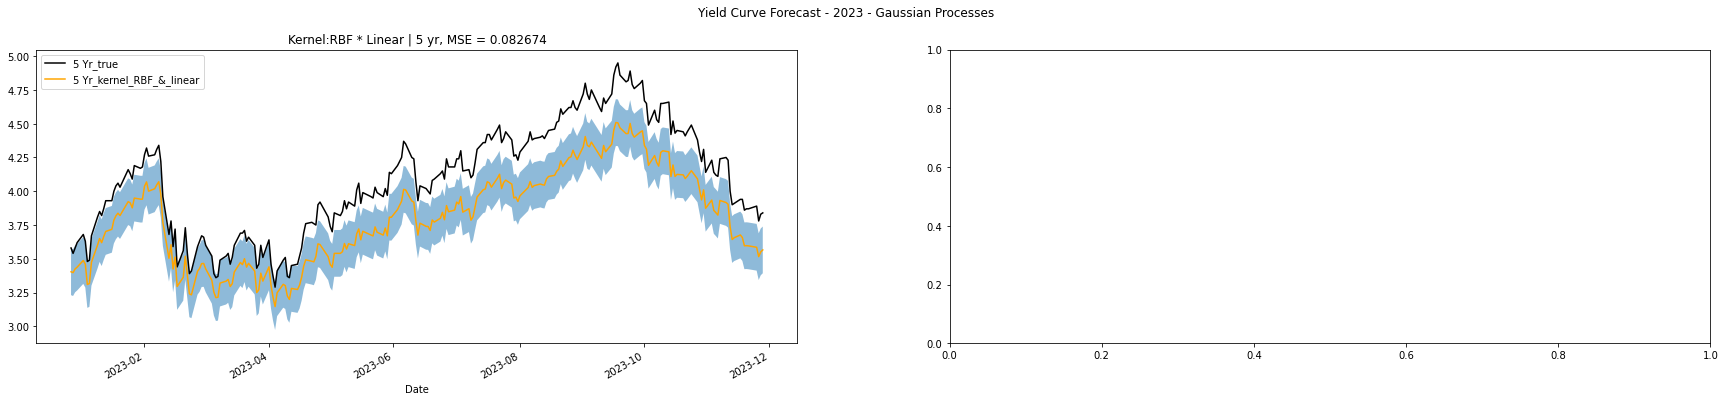

In [51]:
fig,ax = plt.subplots(1,2,figsize=(30,6))
fig.suptitle("Yield Curve Forecast - 2023 - Gaussian Processes")
model_type_i="kernel_RBF_&_linear"
for i,bond_i in enumerate([5]):
    ax_i = ax[i]
    y_i = joinf_2023[f"{bond_i} Yr_{model_type_i}"]
    mse_i = mean_squared_error(joinf_2023[f"{bond_i} Yr_true"],y_i)
    joinf_2023[[f"{bond_i} Yr_true",f"{bond_i} Yr_{model_type_i}"]].plot(ax=ax_i,color=("k","orange"))
    ax_i.set_title(f"Kernel:RBF * Linear | {bond_i} yr, MSE = {mse_i:.6f}")
    if model_type_i != "persist":
        ax_i.fill_between(joinf_2023.index, y_i - 0.05*joinf_2023[f"{bond_i} Yr_{model_type_i}_stddev"],\
                          y_i + 0.05*joinf_2023[f"{bond_i} Yr_{model_type_i}_stddev"], alpha=0.5)

In [55]:
# Trading Strategy

In [56]:
y_true = joinf_2023["5 Yr_true"]
# transfer the y_true data column to a numpy array
y_true_data = y_true.to_numpy()

In [57]:
y_i = joinf_2023[f"5 Yr_kernel_RBF_&_linear"]

In [58]:
y_i_df = y_i.reset_index()
y_i_df.columns = ['Date', 'Rate']
y_i_sorted = y_i_df.sort_values(by='Date')  # Sort by the date column
start_date = y_i_sorted['Date'].min()
end_date = start_date + pd.Timedelta(days=59)

# Filter the dataframe to include only the entries within the first 60 days
y_i_first_60_days = y_i_sorted[(y_i_sorted['Date'] >= start_date) & (y_i_sorted['Date'] <= end_date)]
predicted_rates2 = y_i_first_60_days
print(predicted_rates2)

         Date      Rate
0  2023-01-24  3.403882
1  2023-01-25  3.397675
2  2023-01-26  3.425071
3  2023-01-27  3.438238
4  2023-01-30  3.487569
5  2023-01-31  3.459603
6  2023-02-01  3.309765
7  2023-02-02  3.317096
8  2023-02-03  3.474069
9  2023-02-06  3.602355
10 2023-02-07  3.650037
11 2023-02-08  3.619349
12 2023-02-09  3.663939
13 2023-02-10  3.702480
14 2023-02-13  3.718205
15 2023-02-14  3.786361
16 2023-02-15  3.817976
17 2023-02-16  3.837517
18 2023-02-17  3.820166
19 2023-02-21  3.922861
20 2023-02-22  3.914269
21 2023-02-23  3.877003
22 2023-02-24  3.949368
23 2023-02-27  3.941521
24 2023-02-28  3.941499
25 2023-03-01  4.036510
26 2023-03-02  4.069202
27 2023-03-03  4.000678
28 2023-03-06  4.018415
29 2023-03-07  4.047127
30 2023-03-08  4.070371
31 2023-03-09  3.977545
32 2023-03-10  3.768490
33 2023-03-13  3.503958
34 2023-03-14  3.604378
35 2023-03-15  3.424335
36 2023-03-16  3.512606
37 2023-03-17  3.295171
38 2023-03-20  3.363175
39 2023-03-21  3.519081
40 2023-03-22  3

In [59]:
# transfer the Rate column to a list and then to a numpy array
predicted_rates_data = predicted_rates2['Rate'].tolist()
predicted_rates_data = np.array(predicted_rates_data)
print(predicted_rates_data)

[3.40388227 3.39767456 3.42507076 3.43823814 3.48756933 3.45960331
 3.30976534 3.31709599 3.47406912 3.60235476 3.65003681 3.61934876
 3.66393948 3.70247984 3.71820545 3.78636074 3.81797552 3.8375175
 3.82016563 3.9228611  3.91426897 3.87700272 3.949368   3.94152069
 3.94149852 4.03650999 4.06920242 4.00067759 4.01841545 4.04712677
 4.07037115 3.97754478 3.76849031 3.50395823 3.60437775 3.42433476
 3.51260567 3.29517126 3.36317539 3.51908064 3.37769771 3.24061918
 3.23331118]


In [60]:
predict_rates22 = predicted_rates_data

In [62]:
# transfer the Date column to a list and then to a numpy array
predicted_dates = predicted_rates2['Date'].tolist()
predicted_dates = np.array(predicted_dates)

In [64]:
futures_prices = pd.read_csv("HistoricalData_1714516219290.csv")
futures_prices = futures_prices[['Date', 'Close/Last']]
futures_prices["Date"] = pd.to_datetime(futures_prices["Date"])
print(futures_prices)

           Date  Close/Last
0    2024-04-30    104.7422
1    2024-04-29    105.0938
2    2024-04-26    104.8750
3    2024-04-25    104.7891
4    2024-04-24    105.0391
...         ...         ...
1255 2019-05-06    115.5234
1256 2019-05-03    115.3672
1257 2019-05-02    115.2656
1258 2019-05-01    115.5312
1259 2019-04-30    115.6406

[1260 rows x 2 columns]


In [65]:
start_date = '2023-01-24'
end_date = '2023-03-24'

futures_prices['Date'] = pd.to_datetime(futures_prices['Date'])  # Ensure 'Date' is in datetime format
filtered_futures_prices = futures_prices[(futures_prices['Date'] >= start_date) & (futures_prices['Date'] <= end_date)]
sorted_filtered_futures_prices = filtered_futures_prices.sort_values('Date')
futures_prices2 = sorted_filtered_futures_prices
print(futures_prices2)

          Date  Close/Last
318 2023-01-24    109.5547
317 2023-01-25    109.6641
316 2023-01-26    109.4609
315 2023-01-27    109.3125
314 2023-01-30    109.0312
313 2023-01-31    109.2422
312 2023-02-01    109.8750
311 2023-02-02    109.9531
310 2023-02-03    109.0859
309 2023-02-06    108.3906
308 2023-02-07    108.2656
307 2023-02-08    108.3828
306 2023-02-09    108.0703
305 2023-02-10    107.9062
304 2023-02-13    107.8516
303 2023-02-14    107.4688
302 2023-02-15    107.3203
301 2023-02-16    107.2891
300 2023-02-17    107.3516
299 2023-02-21    106.7578
298 2023-02-22    106.8359
297 2023-02-23    106.9453
296 2023-02-24    106.8828
295 2023-02-27    107.0625
294 2023-02-28    107.0547
293 2023-03-01    106.6406
292 2023-03-02    106.3906
291 2023-03-03    106.6719
290 2023-03-06    106.5859
289 2023-03-07    106.3750
288 2023-03-08    106.2500
287 2023-03-09    106.8281
286 2023-03-10    108.0156
285 2023-03-13    109.3438
284 2023-03-14    108.7266
283 2023-03-15    109.7500
2

In [66]:
# transfer the Close/Last column to a list and then to a numpy array
futures_prices_data = futures_prices2['Close/Last'].tolist()
futures_prices_data = np.array(futures_prices_data)
print(futures_prices_data)

[109.5547 109.6641 109.4609 109.3125 109.0312 109.2422 109.875  109.9531
 109.0859 108.3906 108.2656 108.3828 108.0703 107.9062 107.8516 107.4688
 107.3203 107.2891 107.3516 106.7578 106.8359 106.9453 106.8828 107.0625
 107.0547 106.6406 106.3906 106.6719 106.5859 106.375  106.25   106.8281
 108.0156 109.3438 108.7266 109.75   108.9766 110.2266 109.7031 108.9062
 109.7188 110.4609 110.4844]


In [67]:
dates = predicted_dates

In [68]:
predicted_rates_series2 = pd.Series(predict_rates22, index=dates)
futures_prices_series2 = pd.Series(futures_prices_data, index=dates)

rate_changes2 = predicted_rates_series2.diff()

In [76]:
initial_capital = 100000
capital = initial_capital
shares_owned = 0

capital_series = pd.Series(index=dates, dtype=float)

buy_prices, sell_prices = [], []
buy_dates, sell_dates = [], []

for date, change in rate_changes2.items():
    price = futures_prices_series2.loc[date]
    capital_series.loc[date] = capital + shares_owned * price

    if change < -0.04 and capital > 0:
        shares_to_buy = capital // price
        shares_owned += shares_to_buy
        capital -= shares_to_buy * price
        buy_prices.append(price)
        buy_dates.append(date)
        
    elif change > 0.01 and shares_owned > 0:
        capital += shares_owned * price
        shares_owned = 0
        sell_prices.append(price)
        sell_dates.append(date)
        

capital_series.iloc[-1] = capital + shares_owned * futures_prices_series2.iloc[-1]


initial_shares = initial_capital // futures_prices_series2[20]
bh_capital = futures_prices_series2 * initial_shares
bh_capital.iloc[0] = initial_capital

In [77]:
daily_returns2 = capital_series.pct_change().dropna()

mean_daily_returns2 = daily_returns2.mean()
std_daily_returns2 = daily_returns2.std()
mean_true_rate2 = y_true_data.mean()*0.01

annualized_return2 = (1 + mean_daily_returns2) ** 252 - 1
annualized_std2 = std_daily_returns2 * np.sqrt(252)

risk_free_rate = 0
sharpe_ratio2 = (annualized_return2- mean_true_rate2) / annualized_std2

print(f"Mean Daily Return: {mean_daily_returns2:.4f}")
print(f"Annualized Return: {annualized_return2:.4f}")
print(f"Annualized Volatility: {annualized_std2:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio2:.4f}")

Mean Daily Return: 0.0001
Annualized Return: 0.0302
Annualized Volatility: 0.0547
Sharpe Ratio: -0.1937


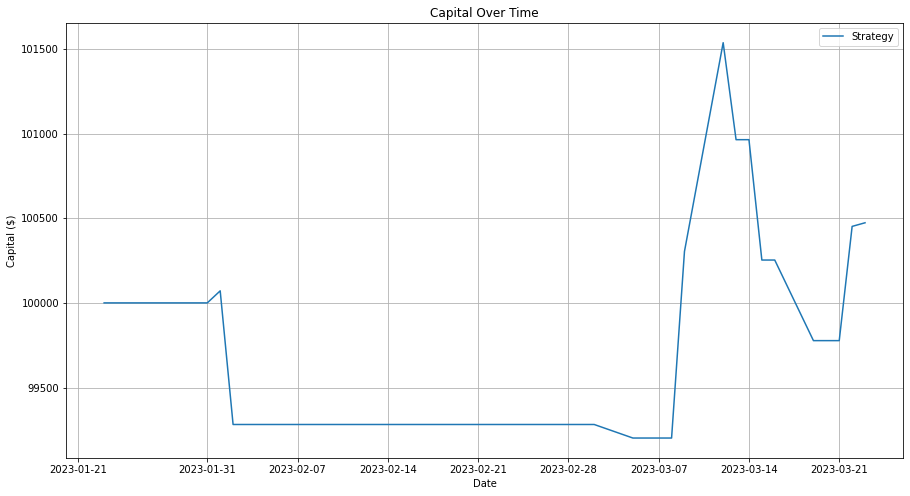

In [78]:
# plot capital_series
plt.figure(figsize=(15, 8))
plt.plot(capital_series, label='Strategy')
plt.title('Capital Over Time')
plt.xlabel('Date')
plt.ylabel('Capital ($)')
plt.legend()
plt.grid(True)
plt.show()